# <center>LP2 Time Series</center>

## <center><i>SanFancisco Team</i></center>

## Time Series Analysis & Forecasting

- This is a time series analysis & forecasting problem. In this project, we shalll predict store sales on data from Corporation Favorita, a large Ecuadorian-based grocery retailer.

- Specifically, we are to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores.

- The training data includes dates, store, and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models

## 1. Installation & Importation of important Libraries

In [1]:
#data loading and analysis
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima

#data cleaning

from sklearn.impute import SimpleImputer

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


#model

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score


#### The lines of code above are Python import statements. Here's a brief explanation of what each line does:

1. <b>import numpy as np</b>: Imports the NumPy library, which provides support for numerical operations in Python. 

2. <b>import pandas as pd</b>: Imports the pandas library, which provides data structures and tools for data manipulation and analysis. 

3. <b>from datetime import datetime as dt</b>: Imports the datetime class from the datetime module. This will be used for working with dates and times in Python.

4. <b>from statsmodels.tsa.stattools import adfuller, acf, pacf</b>: Imports several statistical functions from the statsmodels library, which is a Python module for statistical modeling and analysis. The adfuller function is used for testing the stationarity of a time series, while acf and pacf are used for analyzing autocorrelation and partial autocorrelation in time series data.

5. <b>from statsmodels.tsa.arima_model import ARIMA</b>: Imports the ARIMA class from the statsmodels library. This class is used for building and fitting ARIMA models, which are a type of time series model used for forecasting future values based on past observations.

6. <b>import math</b>: Imports the math module, which provides mathematical functions and constants in Python.

7. <b>import matplotlib.pyplot as plt</b>: Imports the pyplot module from the matplotlib library, which is a Python plotting library used for data visualization. 

8. <b>%matplotlib inline</b>: This is a special command for Jupyter notebooks, which tells Jupyter to display matplotlib plots directly in the notebook output.

9. <b>import warnings</b>: Imports the warnings module, which provides a way to control the display of warning messages in Python.

10. <b>warnings.filterwarnings('ignore')</b>: Sets the warning filter to ignore warnings, which suppresses warning messages that may appear during the execution of the program. This is sometimes used to avoid cluttering the output with warnings that may not be important for the current analysis.

11. <b>from statsmodels.graphics.tsaplots import plot_pacf, plot_acf</b>: Imports the plot_pacf and plot_acf functions from the tsaplots submodule of the statsmodels.graphics library. These functions are used for visualizing autocorrelation and partial autocorrelation plots of time series data.

12. <b>from statsmodels.tsa.ar_model import AutoReg</b>: Imports the AutoReg class from the ar_model submodule of the statsmodels.tsa library. This class is another way to fit an AR model to time series data.

13. <b>from pmdarima import auto_arima</b>: Imports the auto_arima function from the pmdarima library, which is a Python module for automatically selecting the best ARIMA model for a given time series. This function uses a heuristic approach to find the best parameters for an ARIMA model based on the data.

## 2. Data Loading and Understanding
Here is the section to load all the datasets need for this project

We shall also:
- get a basic understanding of its structure and format. 
- identify the variables and their types.
- identify missing values and checking for data quality issues. 

In [2]:
df_holidays = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\holidays_events.csv')
df_oil = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\oil.csv')
df_stores = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\stores.csv')
df_transactions = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\transactions.csv')
df_train = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\train.csv')
df_test = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\test.csv')
df_smp_submission = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\sample_submission.csv')

### [A] df_train DataFrame
This dataframe contains features and the label to predict sales,that is, the number of sales each day


In [3]:
df_train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Below are the columns of the df_train DataFrame:
- id – the index of the row
- date – the current date
- store_nbr – the store
- family – the product family
- sales – number of sales in this family
- onpromotion – the number of products on promotion in this family


In [4]:
# The shape of the df_train dataframe, i.e. the number of rows and columns
df_train.shape

(3000888, 6)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
# Check for missing values in df_train
missing_values = df_train.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [7]:
df_train.describe().transpose()

count          mean            std  min        25%  \
id           3000888.0  1.500444e+06  866281.891642  0.0  750221.75   
store_nbr    3000888.0  2.750000e+01      15.585787  1.0      14.00   
sales        3000888.0  3.577757e+02    1101.997721  0.0       0.00   
onpromotion  3000888.0  2.602770e+00      12.218882  0.0       0.00   

                   50%           75%        max  
id           1500443.5  2.250665e+06  3000887.0  
store_nbr         27.5  4.100000e+01       54.0  
sales             11.0  1.958473e+02   124717.0  
onpromotion        0.0  0.000000e+00      741.0

### [B] df_holidays DataFrame
- The national holidays are grouped in df_holidays dataframe. This data is not provided by the store but may have an impact on sales.

- On a holiday, for example, there may be more people in the city and thus more customers in the stores. Alternatively, more people may go on vacation, resulting in fewer customers in stores.

In [8]:
df_holidays.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

Below are the columns of the df_holidays DataFrame:
- date – the date of the holiday
- type – the type of holiday (i.e. <i><b>Holiday, Event, Transfer, Additional, Bridge, Work Day</b></i>)
- locale – the magnitude of the event, whether <i><b>Local, Regional or National</b></i>
- locale_name – the city where the event took place
- description – name of the event
- transferred – whether the event was transferred/moved to another day or not

In [9]:
# The shape of the df_holidays dataframe, i.e. the number of rows and columns
df_holidays.shape

(350, 6)

In [10]:
# Check for missing values in df_holidays
missing_values = df_holidays.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


### [C] df_stores DataFrame
The df_stores dataframe holds information of various Corporation Favorita stores.

In [11]:
df_stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

The df_stores DataFrame columns:
- store_nbr – the store number
- city – the city where the store is located
- state – the state where the store is located
- type – the type of the store
- cluster – the number of similar stores in that area

In [12]:
# The shape of the df_stores dataframe, i.e. the number of rows and columns
df_stores.shape

(54, 5)

In [13]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [14]:
# Check for missing values in df_stores
missing_values = df_stores.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


### [D] df_oil DataFrame
The df_oil dataframe holds the daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

In [15]:
df_oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

The df_oil DataFrame columns:
- date - the date of the oil price
- dcoilwtico - the price of oil on that particular day

In [16]:
# The shape of the df_oil dataframe, i.e. the number of rows and columns
df_oil.shape

(1218, 2)

In [17]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [18]:
# Check for missing values in df_oil
missing_values_oil = df_oil.isnull().sum()

# Print the number of missing values in each column
print(missing_values_oil)

date           0
dcoilwtico    43
dtype: int64


### [E] df_transactions DataFrame
The df_transactions dataframe groups the daily transactions by stores.

(this is a transaction <b>receipt</b> created after a customer’s purchase)

In [19]:
df_transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

The df_transactions DataFrame columns:
- date - date when sales were made
- store_nbr - the store where sales were made that day
- transactions - the number of transactions that day

In [20]:
# The shape of the df_transactions dataframe, i.e. the number of rows and columns
df_transactions.shape

(83488, 3)

In [21]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [22]:
# Check for missing values in df_transactions
missing_values_trans = df_transactions.isnull().sum()

# Print the number of missing values in each column
print(missing_values_trans)

date            0
store_nbr       0
transactions    0
dtype: int64


### [F] df_test DataFrame
- The df_test dataframe will allow us to forecast the sale column. 
- The dataframe contains information from August 16, 2017 to August 31, 2017

In [23]:
df_test

id        date  store_nbr                      family  onpromotion
0      3000888  2017-08-16          1                  AUTOMOTIVE            0
1      3000889  2017-08-16          1                   BABY CARE            0
2      3000890  2017-08-16          1                      BEAUTY            2
3      3000891  2017-08-16          1                   BEVERAGES           20
4      3000892  2017-08-16          1                       BOOKS            0
...        ...         ...        ...                         ...          ...
28507  3029395  2017-08-31          9                     POULTRY            1
28508  3029396  2017-08-31          9              PREPARED FOODS            0
28509  3029397  2017-08-31          9                     PRODUCE            1
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399  2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]

Below are the columns of the df_test DataFrame:
- id – the index of the row
- date – the current date
- store_nbr – the store
- family – the product family
- onpromotion – the number of products on promotion in this family

In [24]:
# The shape of the df_test dataframe, i.e. the number of rows and columns
df_test.shape

(28512, 5)

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [26]:
# Check for missing values in df_test
missing_values_test = df_test.isnull().sum()

# Print the number of missing values in each column
print(missing_values_test)

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


### [G] df_smp_submission DataFrame
The sample submission dataframe (df_smp_submission) can be used to fill in the number of sales per day and per family

In [27]:
df_smp_submission.head()

id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0

Below are the columns of the df_smp_submission DataFrame:
- id – the index of the row
- sales – the number of sales in that family

In [28]:
# The shape of the df_smp_submission dataframe, i.e. the number of rows and columns
df_smp_submission.shape

(28512, 2)

In [29]:
df_smp_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [30]:
# Check for missing values in df_smp_submission
missing_values = df_smp_submission.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

id       0
sales    0
dtype: int64


## 3. Univariate Analysis
Here we shall explore stationarity, trend, and seasonality in time series of various datasets so as to understand the patterns and properties of a single variable over time.

### Explore stationarity, trend, and seasonality in df_train dataset:

In [31]:
df_train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [32]:
# Change the 'date' column from str type to datetime

df_train['date'] = pd.to_datetime(df_train['date'])

# Set the 'date' column as the index of the DataFrame
df_train.set_index('date', inplace=True)

In [33]:
df_train.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [34]:
# Create a new data frame from 'df_train'  with 'date' column set as index
df_train_series = df_train.copy()
df_train_series['Year'] = df_train.index.year
df_train_series['Month'] = df_train.index.month
df_train_series['Weekday Name'] = df_train.index.day_name()

In [35]:
df_train_series.head()

id  store_nbr      family  sales  onpromotion  Year  Month  \
date                                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013      1   
2013-01-01   1          1   BABY CARE    0.0            0  2013      1   
2013-01-01   2          1      BEAUTY    0.0            0  2013      1   
2013-01-01   3          1   BEVERAGES    0.0            0  2013      1   
2013-01-01   4          1       BOOKS    0.0            0  2013      1   

           Weekday Name  
date                     
2013-01-01      Tuesday  
2013-01-01      Tuesday  
2013-01-01      Tuesday  
2013-01-01      Tuesday  
2013-01-01      Tuesday

In [36]:
# Display random samples of 5 rows
df_train_series.sample(5, random_state=0)

id  store_nbr        family   sales  onpromotion  Year  \
date                                                                      
2014-02-28   752075         11  BREAD/BAKERY   450.0            0  2014   
2016-11-16  2517272         39       SEAFOOD     8.0            1  2016   
2016-11-29  2540112         30     BEVERAGES  1422.0           40  2016   
2016-08-31  2379367         20     BABY CARE     1.0            0  2016   
2014-01-30   700715          2  PET SUPPLIES     8.0            0  2014   

            Month Weekday Name  
date                            
2014-02-28      2       Friday  
2016-11-16     11    Wednesday  
2016-11-29     11      Tuesday  
2016-08-31      8    Wednesday  
2014-01-30      1     Thursday

In [37]:
df_train_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   Year          int64  
 6   Month         int64  
 7   Weekday Name  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 206.1+ MB


### Trend stationarity:
To test for trend stationarity in our time series data, we shall use the Augmented Dickey-Fuller (ADF) test. 
- The ADF test is the commonly used statistical test for testing the presence of a unit root in a time series, which is an indication of non-stationarity due to a trend.

The steps to follow:
1. Calculate the rolling mean and standard deviation of the sales data
2. Plot the rolling mean and standard deviation to visualize the trend
3. Perform the ADF test on the sales data

In [38]:
#Calculate the rolling mean and standard deviation of the sales data
rolling_mean = df_train_series['sales'].rolling(window=12).mean()
rolling_std = df_train_series['sales'].rolling(window=12).std()

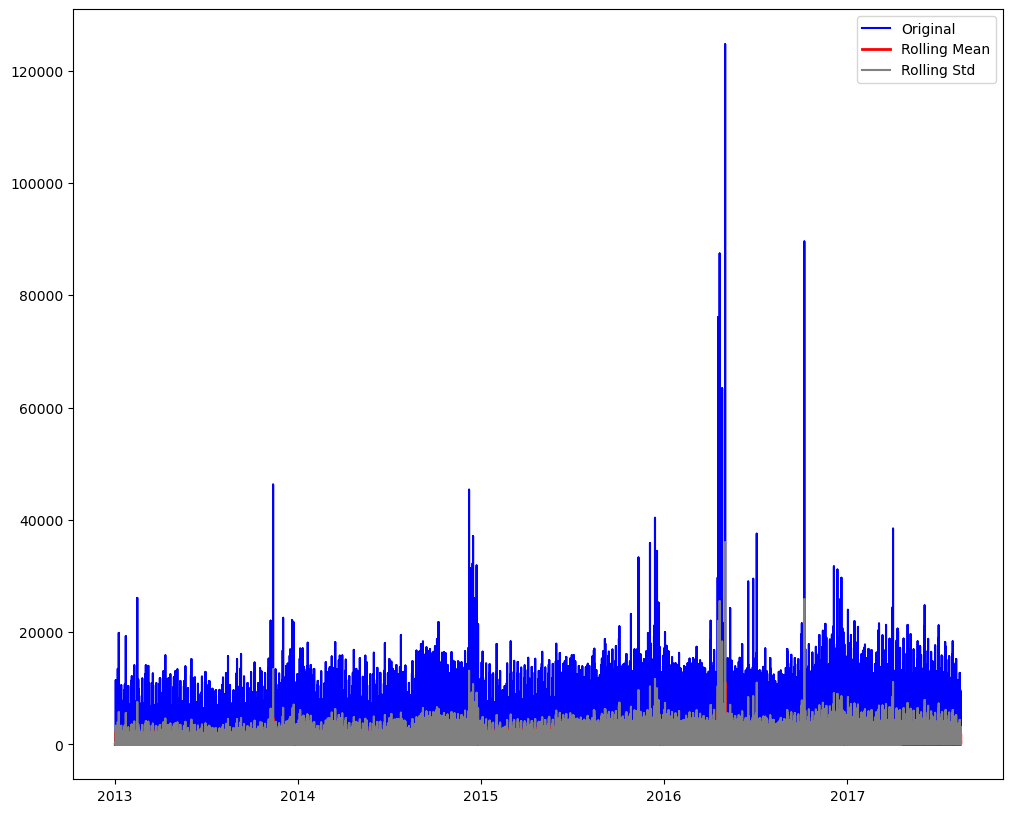

In [39]:
# Plot the rolling mean and standard deviation to visualize the trend
plt.figure(figsize=(12,10))
plt.plot(df_train_series['sales'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', linewidth=2, label='Rolling Mean')
plt.plot(rolling_std, color='gray', label='Rolling Std')
plt.legend()
plt.show()

From the above plot, it can be visualized that there is seasonality every year with upward spikes at the end of each year.

### Testing Stationarity for the year 2013.

We shall subset the dataframe to only include 2013 period.This is to avoid the system taking too long to produce the output.


In [40]:
# Perform the ADF test on the sales data for 2013 only [TAKES TOO LONG TO RUN]

# result = adfuller(df_train_series.loc[df_train_series['Year'] == 2013, 'sales'])

# result = adfuller(df_train_series['sales'])
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# print('Critical Values:', result[4])

### Visualize Seasonality of Sales from 2013 to 2017

Text(0, 0.5, 'Sales')

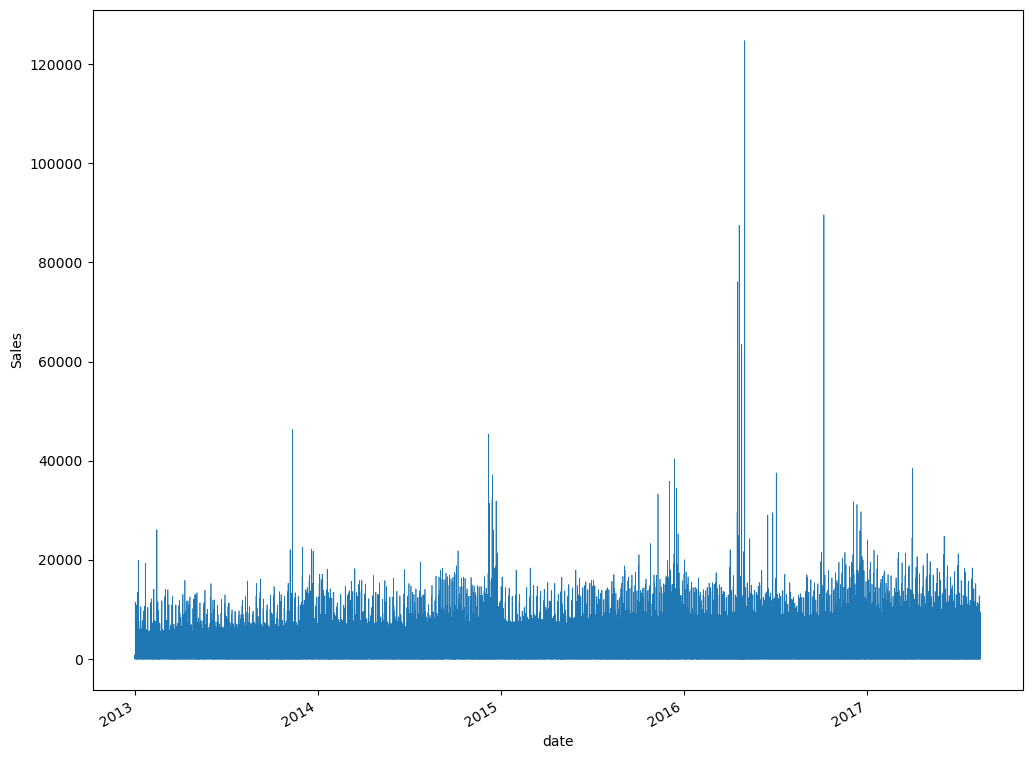

In [41]:
import seaborn as sns
plt.figure(figsize=(12,10))
ax=df_train_series['sales'].plot(linewidth=0.5)
ax.set_ylabel('Sales')

The code creates a simple line plot of the sales values in the df_train_series DataFrame, with a y-axis label indicating the units of the sales values.
- It's not clear to visualize stationarity, trend, or seasonality from the plot.
- We need therefore to explore the data further

### Seasonality:
To test for seasonality between Year and Sales in df_train dataset, we follow the steps below:
- Convert the 'date' column to a datetime datatype
- Create a new column 'Month' which extracts the month from the 'date' column
- Create a pivot table to calculate the average sales for each year and month
- Create a line plot to visualize the trend of average sales over time

In [42]:
df_sales_monthly = df_train_series.pivot_table(index=['Year', 'Month'], values='sales', aggfunc='mean')

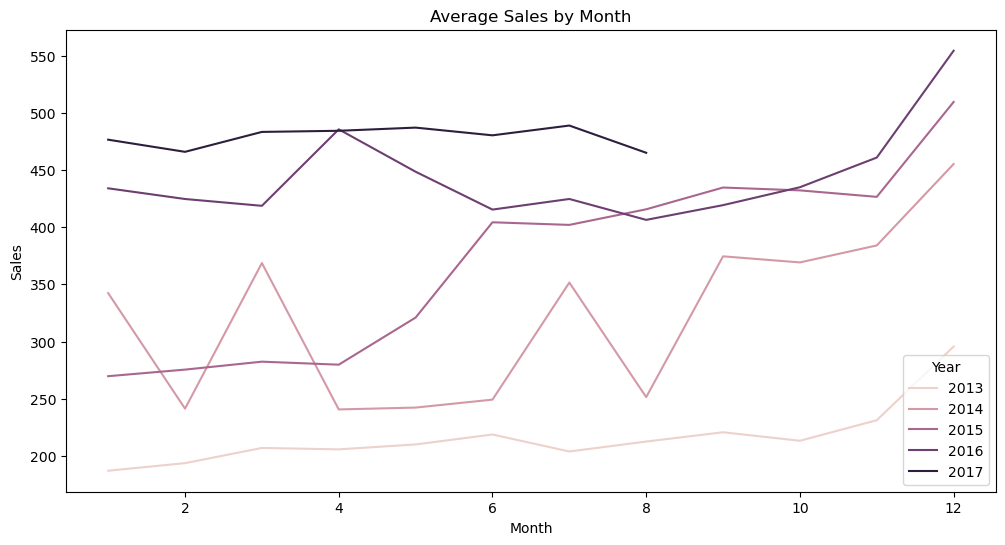

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sales_monthly, x='Month', y='sales', hue='Year')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

1. From the graph, we can see that there is a clear seasonality in the data, with higher sales occurring in the June, July, and August months and lower sales in the December, January, and February months. 
2. Additionally, there appear to be an upward trend in sales over time, as the sales values generally increase from year to year. However, this trend is not as clear as the seasonality pattern.

#### Perform Autocorrelation Analysis to test for Seasonality:
- Create a pivot table to calculate the average sales for each month
- Plot the autocorrelation function (ACF) to visualize the correlation between sales in each month and the sales in the previous months
- The lags parameter will specify the number of time periods to include in the ACF plot. In this case, we set lags=12 to show the correlation between each month's sales and the sales in the previous 12 months.

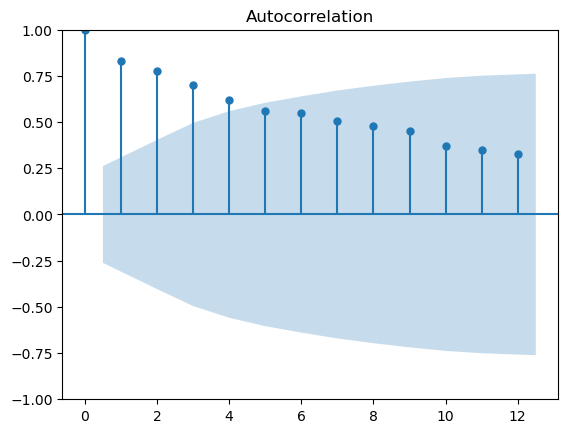

In [44]:
df_sales_monthly = df_train_series.pivot_table(index=pd.Grouper(freq='M'), values='sales', aggfunc='mean')

# Plot the acf
plot_acf(df_sales_monthly, lags=12)
plt.show()

1. The ACF plot shows that there is a strong positive correlation between the sales in the current month and the sales in the previous month (lag 1).
    - This is indicated by the high correlation coefficient of 1 at lag 1. The correlation coefficient then gradually decreases as the lag increases, indicating a weakening correlation between the sales in the current month and the sales in the previous months.

2. The decreasing pattern in the ACF plot suggests that there is a seasonal trend in the data, with higher sales in certain months and lower sales in other months. 
    - Specifically, the ACF plot shows a peak at lag 12, which indicates a strong positive correlation between sales in the same month of different years, suggesting a yearly seasonal pattern.

#### Other Univariate Analysis with df_train Dataset

1. <b><u>Descriptive statistics</u></b>: 
    - We can calculate basic descriptive statistics for the sales column using the describe() method, which gives us information such as the mean, standard deviation, minimum and maximum values, and quartiles as shown below:

In [45]:
df_train['sales'].describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

2. <b><u>Distribution plot</u></b>: 
    - We then plot the distribution of the sales column using a histogram or kernel density plot to visualize the shape of the distribution as shown below:

<AxesSubplot:xlabel='sales', ylabel='Count'>

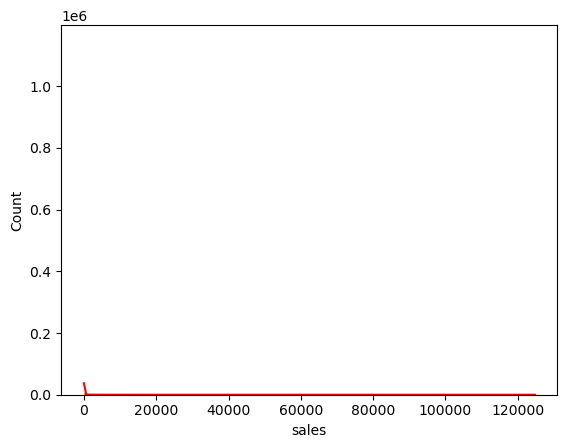

In [46]:
sns.histplot(df_train['sales'], kde=True, color='red')

3. <b><u>Box plot</u></b>: 
    - We use a box plot to visualize the distribution of the sales column and identify any outliers.

<AxesSubplot:xlabel='sales'>

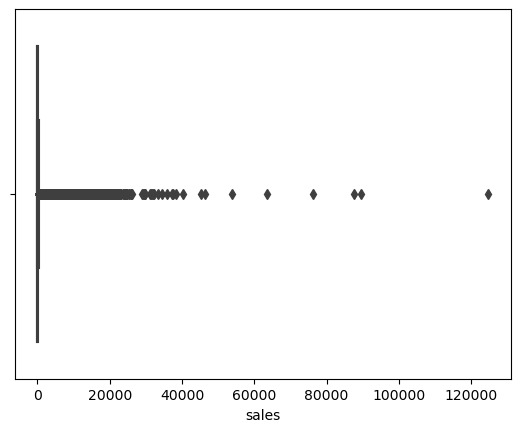

In [47]:
sns.boxplot(x=df_train['sales'])

4. <b><u>Pivot table</u></b>: 
    - We create a pivot table to summarize the sales column by family and onpromotion categories. 

In [48]:
df_train.pivot_table(values='sales', index='family', columns='onpromotion', aggfunc=np.mean)

onpromotion                         0            1            2    \
family                                                              
AUTOMOTIVE                     5.853087    12.271947    13.480392   
BABY CARE                      0.109624     1.660377          NaN   
BEAUTY                         3.078452     8.079021     9.556841   
BEVERAGES                   1292.272591  2254.404076  2567.288278   
BOOKS                          0.070797          NaN          NaN   
BREAD/BAKERY                 379.513249   571.228704   619.034227   
CELEBRATION                    7.945922    20.349012    16.182403   
CLEANING                     868.378326  1115.941398  1205.951113   
DAIRY                        479.811128   799.902024   901.172355   
DELI                         221.763382   308.654288   330.758164   
EGGS                         154.703932   193.778014   206.002623   
FROZEN FOODS                 106.524349   168.744618   221.025576   
GROCERY I                   2717.720813  3087.540481  3387.999182   
GROCERY II                    21.302750    35.744029     9.792814   
HARDWARE                       1.136040     2.212963     2.722222   
HOME AND KITCHEN I            16.837739    30.567583    33.579385   
HOME AND KITCHEN II           10.275239    36.150215    46.378895   
HOME APPLIANCES                0.456876     1.396552          NaN   
HOME CARE                    101.956009   309.011856   302.997940   
LADIESWEAR                     7.099938    17.882075    14.159091   
LAWN AND GARDEN                5.510703    10.277476    15.208861   
LINGERIE                       7.053475    11.237989    12.111702   
LIQUOR,WINE,BEER              76.474931    92.298396    90.499265   
MAGAZINES                      2.927206     2.888889     3.500000   
MEATS                        303.081088   405.027900   434.526637   
PERSONAL CARE                220.878968   312.192765   350.245207   
PET SUPPLIES                   3.507379    15.852740    20.433333   
PLAYERS AND ELECTRONICS        6.081521    16.062069    17.188679   
POULTRY                      313.334513   475.606728   456.690794   
PREPARED FOODS                92.481895   120.184543   134.583856   
PRODUCE                      792.101911  2103.026708  1633.097879   
SCHOOL AND OFFICE SUPPLIES     1.022018    17.597816    19.641388   
SEAFOOD                       19.207320    26.649346    31.201114   

onpromotion                         3            4            5    \
family                                                              
AUTOMOTIVE                    15.923954    18.936170    20.728814   
BABY CARE                           NaN          NaN          NaN   
BEAUTY                         6.837037     9.154762    13.333333   
BEVERAGES                   2950.067889  3080.714092  3054.160355   
BOOKS                               NaN          NaN          NaN   
BREAD/BAKERY                 607.246040   503.749273   455.249505   
CELEBRATION                   13.073394    13.472527    16.494845   
CLEANING                    1281.500116  1309.117992  1309.311449   
DAIRY                        981.329822  1015.638563   977.295521   
DELI                         330.104828   303.580262   283.751320   
EGGS                         242.402397   216.467257   151.928934   
FROZEN FOODS                 269.618383   321.013956   366.047452   
GROCERY I                   3509.789457  3644.635979  3818.121834   
GROCERY II                    14.356436    19.578755    27.281609   
HARDWARE                       4.000000     5.000000          NaN   
HOME AND KITCHEN I            36.594924    41.170293    50.537968   
HOME AND KITCHEN II           48.828916    51.059920    57.053299   
HOME APPLIANCES                     NaN          NaN          NaN   
HOME CARE                    269.573680   265.446055   284.398529   
LADIESWEAR                    12.827586    11.825000    17.323529   
LAWN AND GARDEN               13.437870    18.063063    23.288462 

### Explore stationarity, trend, and seasonality in df_oil dataset:

In [49]:
df_oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

To perform seasonality analysis on the df_oil dataframe, we shall follow these steps:
1. Make copy of df_oil dataframe
2. Convert the date column to a datetime object using the pd.to_datetime() function
3. Set the date column as the index of the dataframe using the df.set_index() function
4. Resample the dataframe to a monthly frequency using the df.resample() function
5. Plot the monthly oil prices using a line plot

In [50]:
df_oil_copy = df_oil.copy()
df_oil_copy['date'] = pd.to_datetime(df_oil_copy['date'])
df_oil_copy.set_index('date', inplace=True)
df_monthly_oil = df_oil_copy.resample('M').mean()

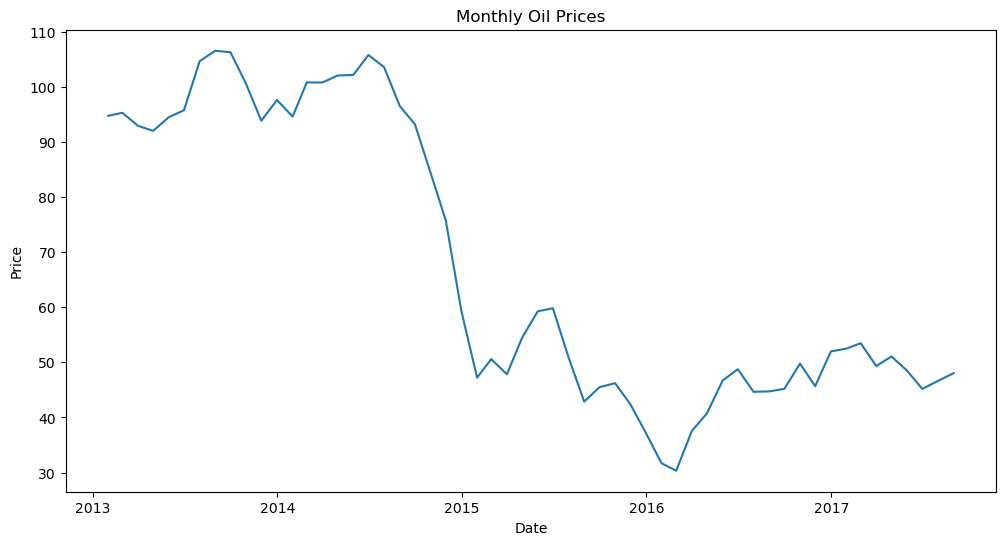

In [51]:
# Visualize the seasonality

plt.figure(figsize=(12,6))
plt.plot(df_monthly_oil['dcoilwtico'])
plt.title('Monthly Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


The above plot shows the monthly oil prices as a line plot with the x-axis representing the dates and the y-axis representing the oil prices.

From the plot, we can see that there was a down trend oil oil prices from 2013 to 2016 and an uptrend from 2016 to 2017.

### Decomposing the time series into its seasonal, trend, and residual components using the seasonal_decompose() function from the statsmodels library:
- This will plot the seasonal, trend, and residual components of the time series. And we shall use the plot to identify the presence and strength of seasonality in the data.

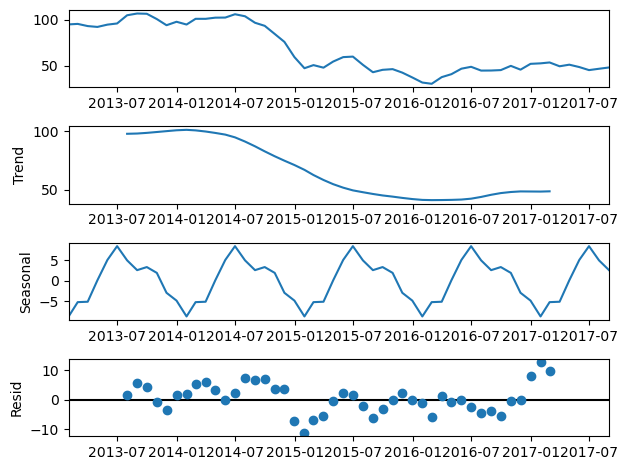

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_monthly_oil, model='additive')
fig = decomposition.plot()
plt.show()

From the above plots:
1. <b>Trend</b>: there is a clear downward trend of oil prices from 2013 to 2016 with a slight upward trend from 2016 to 2017
2. <b>Seasonal</b>: It is clear from the plot that there is a seasonality of oil prices yearly.
3. <b>Resid</b>: The resid component in a seasonal decomposition plot represents the residual variation in the time series that cannot be explained by the seasonal or trend components. It represents the noise or randomness in the data that cannot be attributed to any predictable pattern. In other words, the resid component is the difference between the observed values of the time series and the predicted values based on the seasonal and trend components. 

### Explore stationarity, trend, and seasonality in df_transactions dataset:
To perform seasonality analysis on the df_transactions dataframe, we shall follow these steps:

1. Make copy of df_transactions dataframe
2. Convert the date column to a datetime object using the pd.to_datetime() function
3. Set the date column as the index of the dataframe using the df.set_index() function
4. Resample the dataframe to a monthly frequency using the df.resample() function
5. Plot the monthly oil prices using a line plot

In [53]:
df_transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [54]:
df_transactions_copy = df_transactions.copy()
df_transactions_copy['date'] = pd.to_datetime(df_transactions_copy['date'])
df_transactions_copy.set_index('date', inplace=True)
df_monthly_transactions = df_transactions_copy.resample('M').mean()

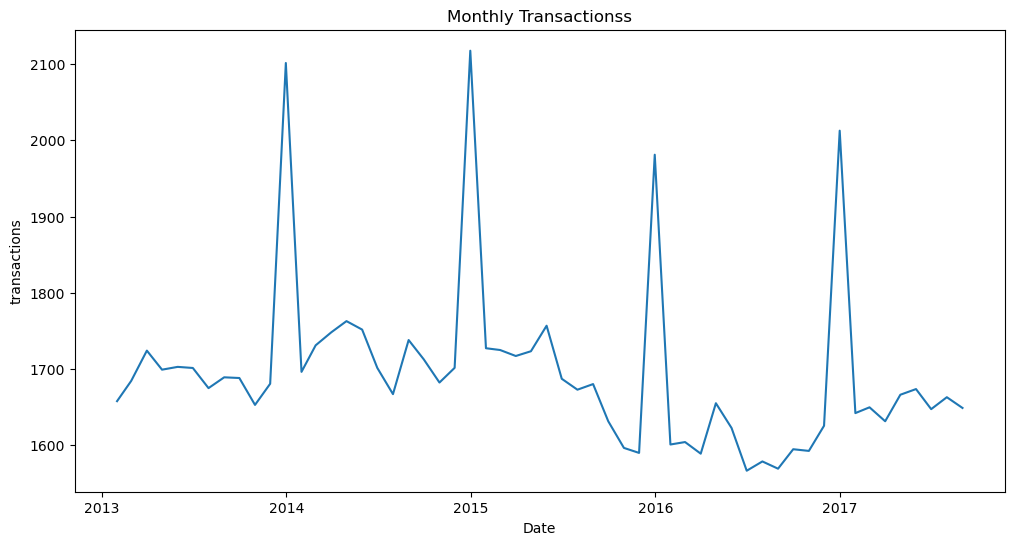

In [55]:
# Visualize the seasonality

plt.figure(figsize=(12,6))
plt.plot(df_monthly_transactions['transactions'])
plt.title('Monthly Transactionss')
plt.xlabel('Date')
plt.ylabel('transactions')
plt.show()

The plot above shows a clear yearly seasonality of transactions with very high spike of transactions occuring at the end of the year (month of December).

### Decomposing the time series into its seasonal, trend, and residual components using the seasonal_decompose() function from the statsmodels library:
- This will plot the seasonal, trend, and residual components of the time series. And we shall use the plot to identify the presence and strength of seasonality in the data.

In [56]:
df_transactions_copy.head()

store_nbr  transactions
date                               
2013-01-01         25           770
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922

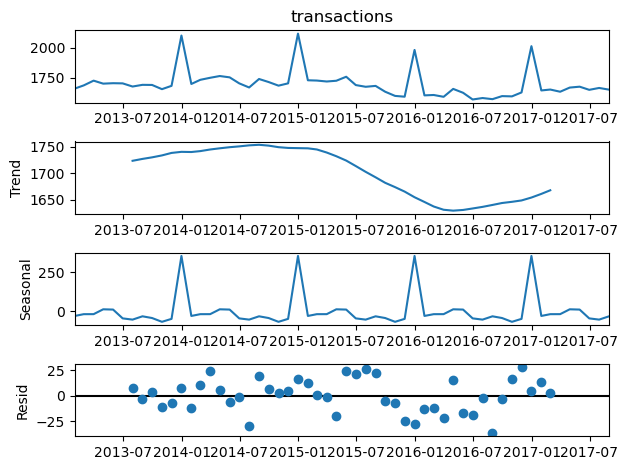

In [57]:
decomposition_tran = seasonal_decompose(df_monthly_transactions['transactions'], model='additive')
fig = decomposition_tran.plot()
plt.show()

From the above plots:
1. <b>Trend</b>: there is a clear upward trend of transactions from 2013 to 2015 and then a downward trend from end of 2015 to 2016 then again an upward trend from 2016 to 2017.
2. <b>Seasonal</b>: It is clear from the plot that there is a seasonality of transactions happening yearly.
3. <b>Resid</b>: The resid component in a seasonal decomposition plot represents the residual variation in the time series that cannot be explained by the seasonal or trend components. It represents the noise or randomness in the data that cannot be attributed to any predictable pattern. In other words, the resid component is the difference between the observed values of the time series and the predicted values based on the seasonal and trend components. 

### 4.	Bivariate and Multivariate Analysis: 
- This stage involves analysing the relationships between pairs or groups of variables to identify patterns and correlations. 
    1. Bivariate analysis will involve comparing two variables, and
    2. Multivariate analysis will involve analysing the relationships between multiple variables simultaneously.


### Bivariate Analysis:
<b> (A) df_train dataframe:</b>
- We can perform a correlation analysis between the sales and onpromotion columns using the corr() function in Pandas as shown below:

In [58]:
df_train.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [59]:
#Check the relationship between Sales and promotion
#calculate pearson corr coefficient
corr_coef=df_train["sales"].corr(df_train["onpromotion"],method="pearson")
print(f"Correlation coefficient between sales and promotion is {corr_coef}")

Correlation coefficient between sales and promotion is 0.42792320481212925


1. The correlation coefficient between sales and onpromotion is 0.43, which indicates a moderately positive correlation between the two variables. 
2. This means that there is a tendency for sales to increase as the number of products on promotion in a family increases, but this relationship is not perfect. 
3. A correlation coefficient of 0.43 suggests that the relationship between the two variables is moderately strong, but other factors, such as store location, time of year, and competition, may also influence sales. 

<b>It's important to note that correlation does not imply causation, and further analysis would be needed to determine if there is a causal relationship between sales and the number of products on promotion.</b>

#### 1st. Visualize of correlation

Text(0.5, 0, 'On Promotion')

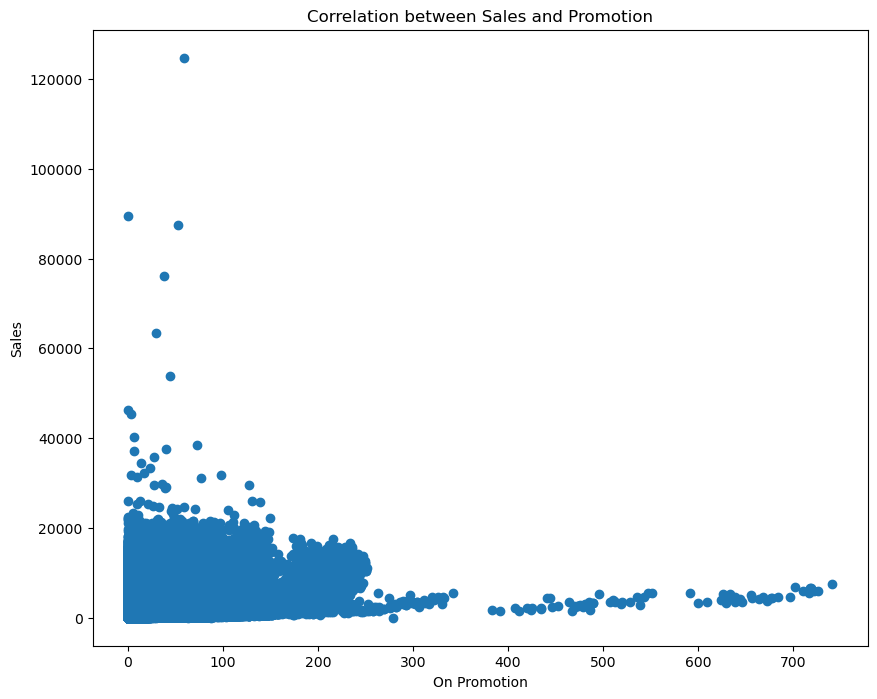

In [60]:
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(x=df_train["onpromotion"],y=df_train["sales"])
plt.title("Correlation between Sales and Promotion")
plt.ylabel("Sales")
plt.xlabel("On Promotion")

<b>The Graph obviously shows the slightly high correlation between sales and items on promotion
although high sales were experienced when less items were on promotion.</b> 

#### 2nd. Visualize of correlation

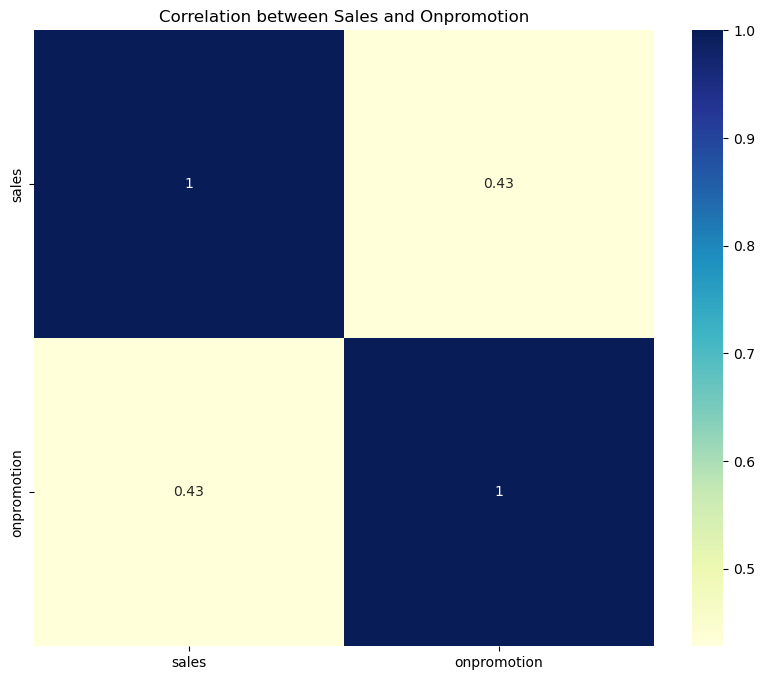

In [61]:
#matplot
df=pd.DataFrame({"sales":df_train["sales"],"onpromotion":df_train["onpromotion"]})
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()

# Create a heatmap of the correlation in the df_year_amt
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# add a title to the plot
plt.title('Correlation between Sales and Onpromotion')

# Show the plot
plt.show()

<b>The Heatmap clearly shows the correlation between Sales and Onpromotion as 0.43.</b>

### Bivariate analysis between sales and oil prices

In [62]:
df_train.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [63]:
df_train_copy = df_train.copy()

In [64]:
#drop id and reset the index
df_train_copy.drop(columns=["id"]).reset_index(inplace=True)

#convert  date in oil df to a datetime
df_oil["date"]=pd.to_datetime(df_oil["date"])

In [65]:
df_oil_train=pd.merge(df_train_copy,df_oil,on="date",how="left")

In [66]:
df_oil_train.head()

date  id  store_nbr      family  sales  onpromotion  dcoilwtico
0 2013-01-01   0          1  AUTOMOTIVE    0.0            0         NaN
1 2013-01-01   1          1   BABY CARE    0.0            0         NaN
2 2013-01-01   2          1      BEAUTY    0.0            0         NaN
3 2013-01-01   3          1   BEVERAGES    0.0            0         NaN
4 2013-01-01   4          1       BOOKS    0.0            0         NaN

In [67]:
#Create a DataFrame with oil prices and sales
df_oil_sales=pd.DataFrame({"oil_price":df_oil_train["dcoilwtico"],"sales":df_oil_train["sales"]})

#Calculate correlation coefficient
corr_coef=df_oil_sales["sales"].corr(df_oil_sales["oil_price"],method="pearson")

print(f"Correlation coefficient between sales and oil price is {corr_coef}")

Correlation coefficient between sales and oil price is -0.07905016021992874


<b>There is a very weak correlation between oil prices and sales the price of oil on the market has no effect on sales.</b>

### Visualize correlation between Oil sales and promotion

Text(0.5, 0, 'Oil Price')

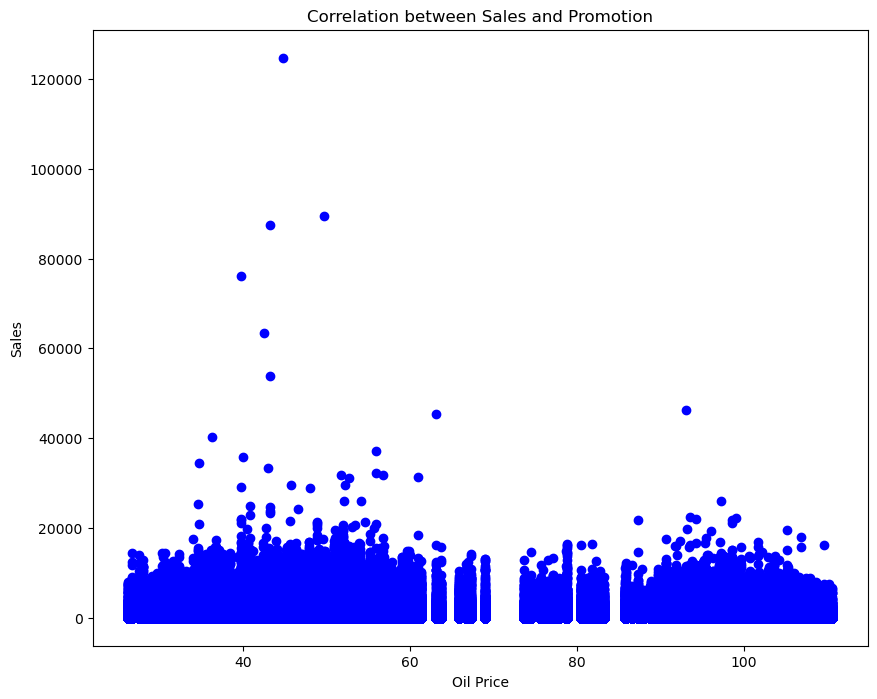

In [68]:
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(x=df_oil_sales["oil_price"],y=df_oil_sales["sales"],c="b")
plt.title("Correlation between Sales and Promotion")
plt.ylabel("Sales")
plt.xlabel("Oil Price")

<b>The figure clearly demonstrates the weak correlation between oil and sales.</b>

### Visualize the Relationship between Monthly Average Sales and Monthly Average Oil prices Over Time

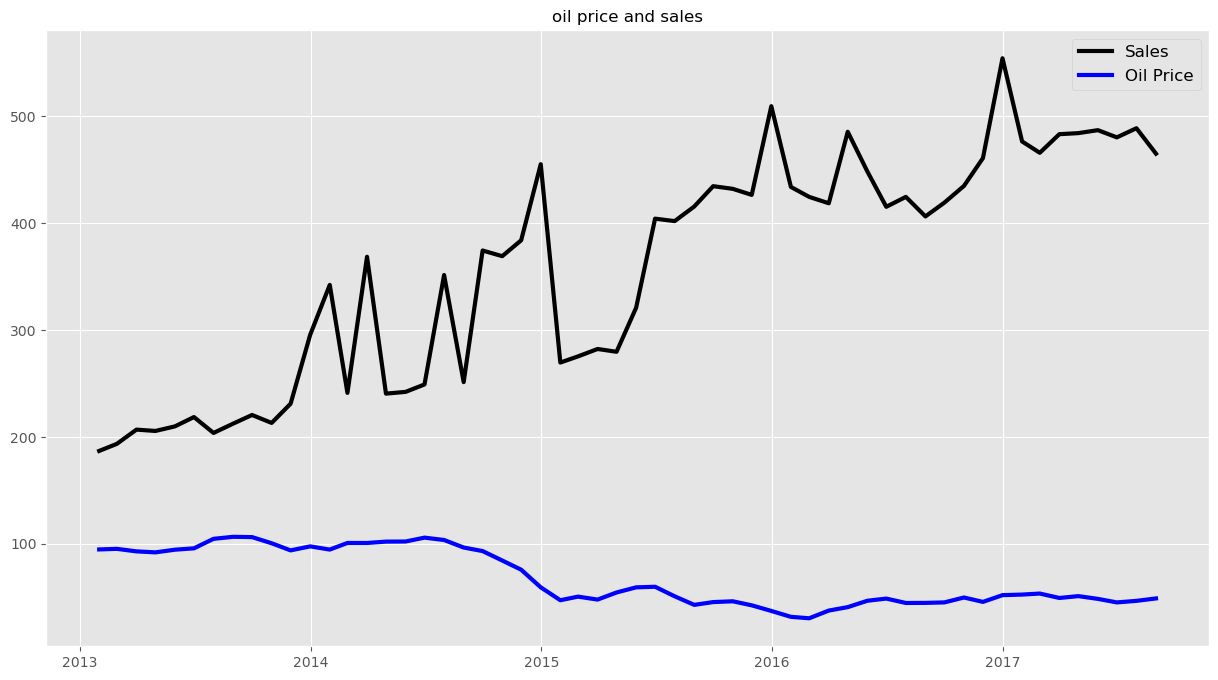

In [69]:
#Rename the dcoilwtico column to oil price
df_oil_train.rename(columns={"dcoilwtico":"oil price"},inplace=True)

#make a copy
df_oil_train_copy=df_oil_train.copy()
#change date to datetime
df_oil_train_copy["date"]=pd.to_datetime(df_oil_train_copy["date"])

#set date as index
df_oil_train_copy.set_index("date",inplace=True)

#Resample
df_oil_train_copy=df_oil_train_copy.resample("M").mean()
#plot sales and oil price on one graph
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(df_oil_train_copy["sales"],c="k",linewidth=3,label="Sales")
plt.plot(df_oil_train_copy["oil price"],c="b",linewidth=3,label="Oil Price")
plt.title("oil price and sales",fontsize=12)
plt.legend(loc="best",fontsize=12)

1. The plot shows the relationship between monthly average sales and monthly average oil prices over time. 
2. The x-axis represents the time period in months and the y-axis represents the values for sales and oil prices. 
3. The plot shows two lines, one for sales and the other for oil prices. 
4. The black line represents monthly average sales, and the blue line represents monthly average oil prices. 

<b>The plot helps to visualize any correlation between oil prices and sales. If the two lines move in the same direction over time, it indicates a positive correlation, while if they move in opposite directions, it indicates a negative correlation.</b>

<b><i>We can therefore conclude that there was a Negative correlation between oil prices and sales.</i></b>

### Multivariate Analysis

- We shall pay attention to how oil price, sales and items on promotion are correlated.

- The code below finds the correlation coefficients between the three variables and plots a heatmap of the correlations

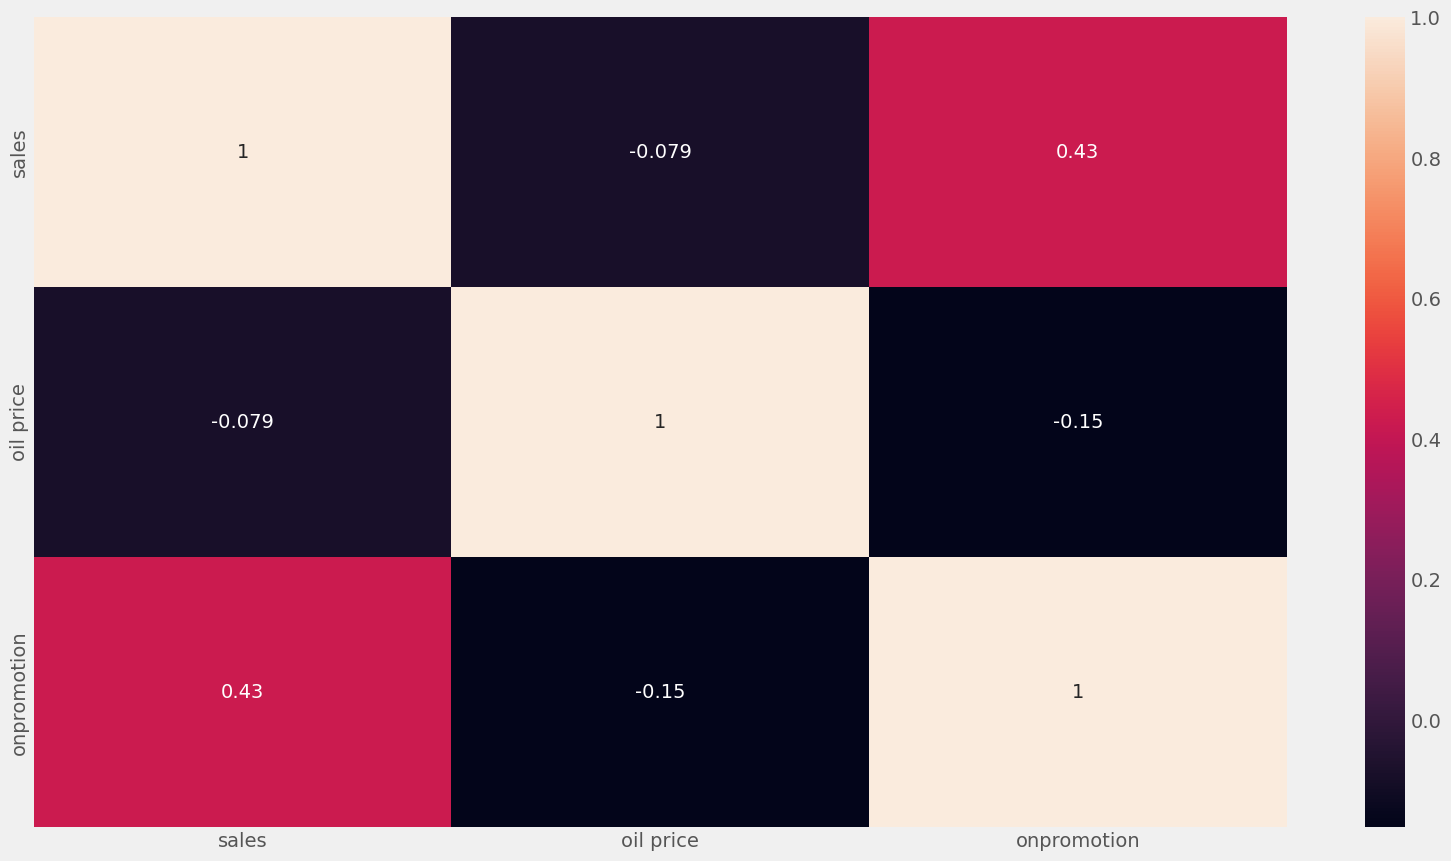

In [70]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(18,10))
numeric_corr=df_oil_train[["sales","oil price","onpromotion"]].corr()
sns.heatmap(numeric_corr,annot=True);

The heatmap shows the correlation between sales, oil price and items on promotion

### Visualize the Sales, Oil price, and On-promotion Data 

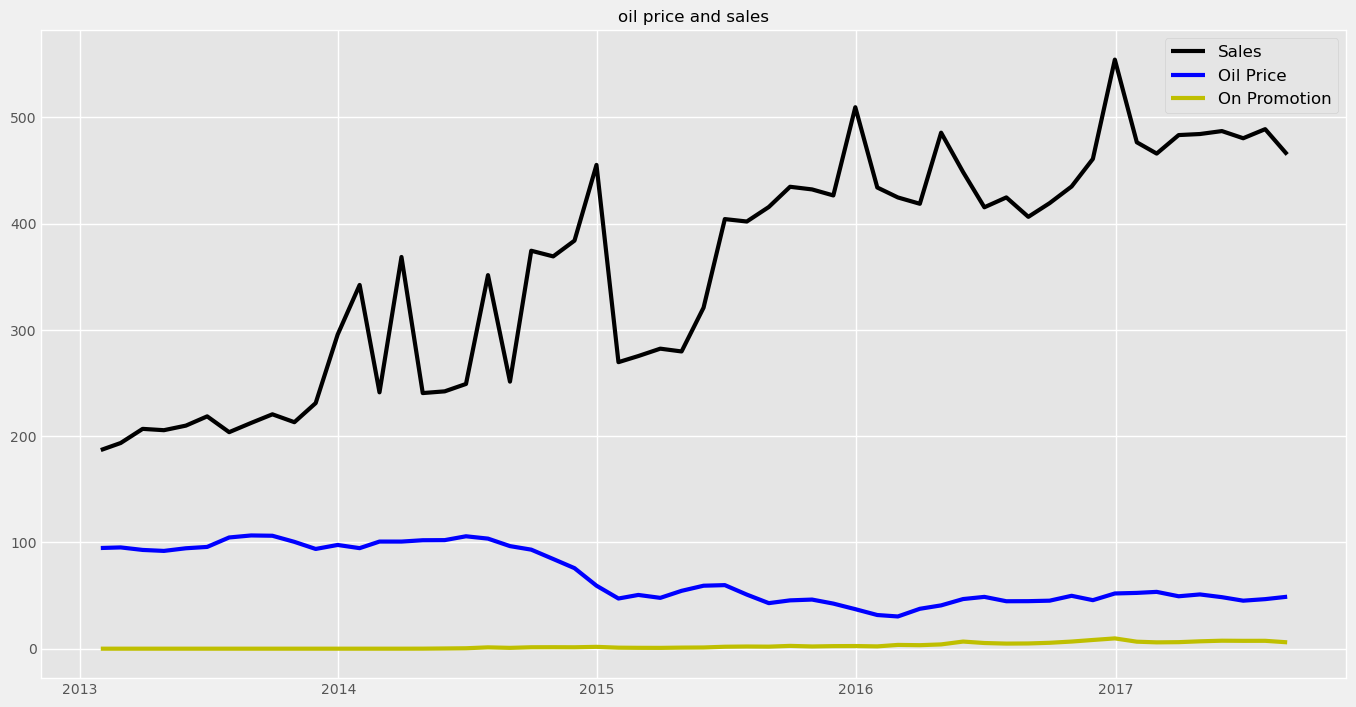

In [71]:
#plot sales and oil price and on promotion on one graph
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(df_oil_train_copy["sales"],c="k",linewidth=3,label="Sales")
plt.plot(df_oil_train_copy["oil price"],c="b",linewidth=3,label="Oil Price")
plt.plot(df_oil_train_copy["onpromotion"],c="y",linewidth=3,label="On Promotion")
plt.title("oil price and sales",fontsize=12)
plt.legend(loc="best",fontsize=12)

### Observation

1. Based on the monthly resampling, items on promotion is almost at a zero from 2013 to 2016.

2. However, sales tend to incrase every month within the years.


### Plotting Sales oil price and items on promotion based on the weekly resampling

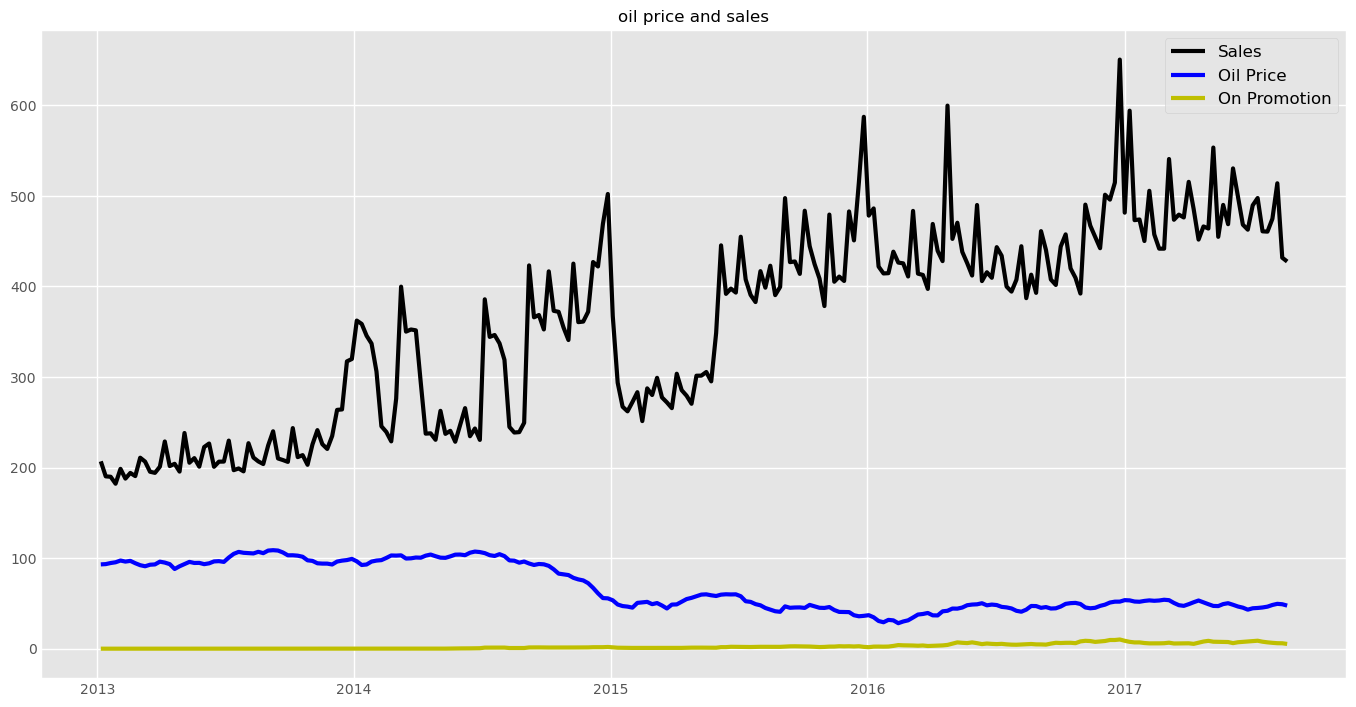

In [72]:
#make a copy
df_oil_train_copy=df_oil_train.copy()

#change date to datetime
df_oil_train_copy["date"]=pd.to_datetime(df_oil_train_copy["date"])

#set date as index
df_oil_train_copy.set_index("date",inplace=True)
#Resample to weekly
df_oil_train_copy=df_oil_train_copy.resample("W").mean()

#plot sales and oil price and on promotion on one graph
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(df_oil_train_copy["sales"],c="k",linewidth=3,label="Sales")
plt.plot(df_oil_train_copy["oil price"],c="b",linewidth=3,label="Oil Price")
plt.plot(df_oil_train_copy["onpromotion"],c="y",linewidth=3,label="On Promotion")
plt.title("oil price and sales",fontsize=12)
plt.legend(loc="best",fontsize=12)

<b>Although items on promotion has  slightly stronger correlation(0.43) with sales, it effects on sales is very little.</b>

<b>(C) df_train dataframe:</b>
- Comparison between the sales of different product families across different stores using Heatmap.

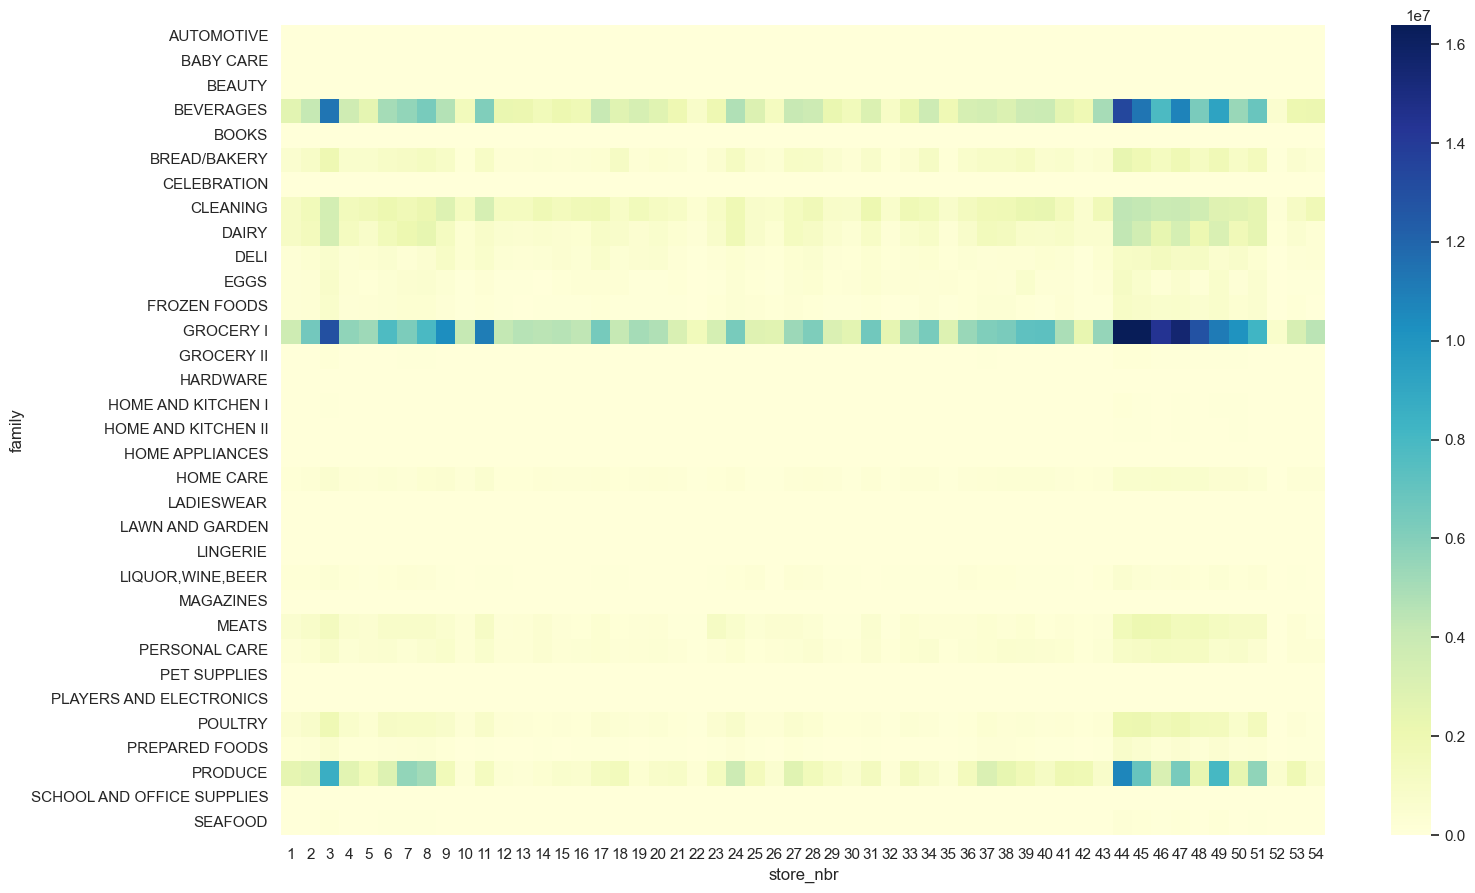

In [73]:
# Create a pivot table that summarizes the total sales for each family and store
sales_by_family_and_store = pd.pivot_table(df_train, values='sales', index=['family'], columns=['store_nbr'], aggfunc='sum')

# Create a heatmap of the sales by family and store
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(sales_by_family_and_store, cmap='YlGnBu')
plt.show()

In the above heatmap, the colors are assigned based on the values in the <b>sales_by_family_and_store</b> dataframe, where yellow represents <u>lower</u> values and blue represents <u>higher</u> values. 
- The range of values for the sales can be seen on the right-hand side of the heatmap, where the color bar shows the values from 0.0 to 1.6.

<b>We can conclude that the stores witnessed a lot of sales in BEVERAGES, GROCERY I and PRODUCE.</b>

### Multivariate Analysis:
<b>(A) Regression Analysis on df_train:</b>
- We shall perform a regression analysis with sales as the dependent variable and onpromotion and store_nbr as independent variables.

STEPS:
1. The sm.OLS function is used to create a linear regression model, where y is the dependent variable and X is the matrix of independent variables. 
2. The add_constant function is used to add a constant term to the independent variables, which is required for the regression analysis. 
3. Finally, the fit method is called to fit the model to the data and obtain the regression results, which are printed using the summary method.

In [74]:
import statsmodels.api as sm

# Define the dependent variable (y) and independent variables (X)
y = df_train['sales']
X = df_train[['onpromotion', 'store_nbr']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model and print the summary
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                 3.396e+05
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:56:42   Log-Likelihood:            -2.4973e+07
No. Observations:             3000888   AIC:                         4.995e+07
Df Residuals:                 3000885   BIC:                         4.995e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         183.3473      1.171    156.614      

<b>We Can Summarize the above results as follows:</b>
1. The regression analysis shows that the model has a low R-squared value of 0.185, which indicates that only 18.5% of the variation in sales can be explained by the independent variables included in the model. 
2. The F-statistic has a very low probability value, which indicates that the model is statistically significant. 
3. Both the onpromotion and store_nbr variables have a statistically significant relationship with sales, as indicated by their low p-values of 0.000. 
4. The coefficient of onpromotion is 38.5686, indicating that a unit increase in the number of on promotion products is associated with an increase in sales by 38.5686 units, holding store_nbr constant. 
5. Similarly, the coefficient of store_nbr is 2.6925, indicating that a unit increase in the store number is associated with an increase in sales by 2.6925 units, holding onpromotion constant.

<b> (B) df_train:</b>
- Variation diferences between the Relationship of 'onpromotion' and 'sales' across ' product families'

We explore how the relationship between onpromotion and sales varies across different product families by creating a scatter plot of sales against onpromotion for each product family.

<AxesSubplot:xlabel='onpromotion', ylabel='sales'>

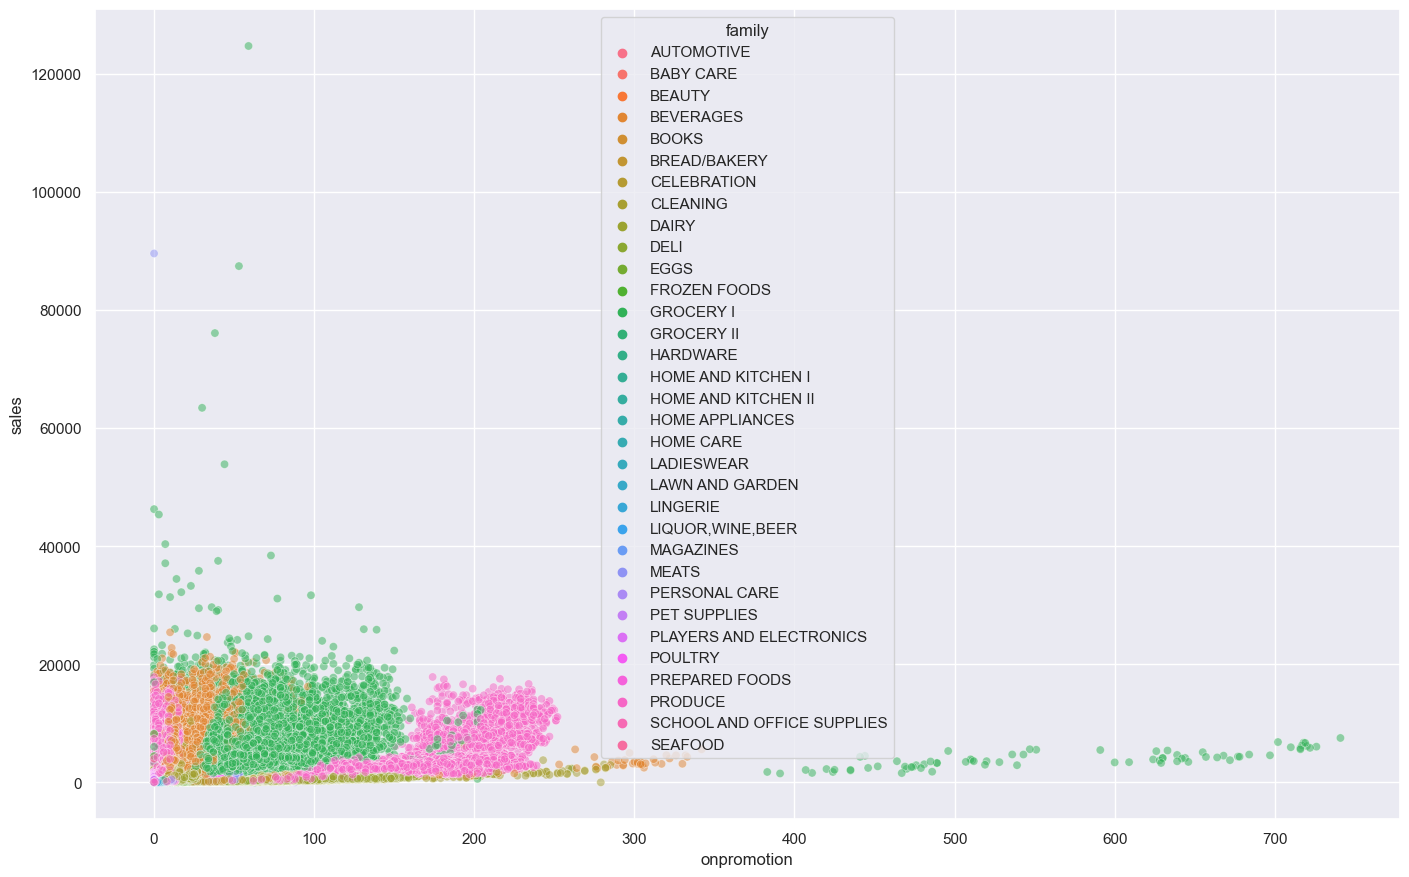

In [75]:
# create a scatter plot of sales against onpromotion for each product family
sns.scatterplot(data=df_train, x='onpromotion', y='sales', hue='family', alpha=0.5)

- The concentration of most of the colors between 0 and 200 on the onpromotion axis and between 0 and 20000 on the sales axis suggests that most of the product families have relatively low levels of on-promotion products and low sales. 
- However, there are a few product families that have higher levels of on-promotion products and higher sales, which are represented by the darker colors on the heatmap. 
- The distribution of on-promotion and sales values across product families could be explored further with additional analysis, such as calculating summary statistics or creating histograms.

<b>(C) df_train:</b>
A heatmap to visualize the correlation between all the numerical columns in the df_train DataFrame

1. The code below first selects only the numerical columns in the df_train DataFrame using the select_dtypes() method. 
2. We thwn creates correlation matrix using the corr() method, and
3. Finally create a heatmap using sns.heatmap() and displays it using plt.show(). 
4. The cmap parameter is set to 'coolwarm' to use a blue-to-red color scheme, and annot=True is used to display the correlation coefficients on the heatmap.

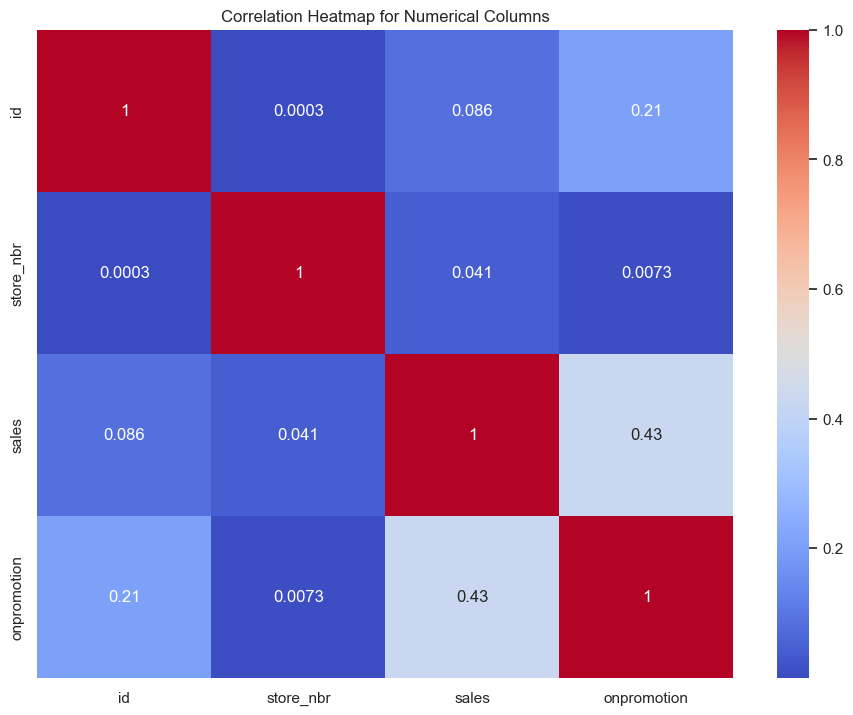

In [76]:
# Select only the numerical columns
num_cols = df_train.select_dtypes(include='number').columns.tolist()

# Create a correlation matrix
corr_matrix = df_train[num_cols].corr()

# Create the heatmap
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

The heatmap shows that there is generally low correlation between the numerical columns in the df_train DataFrame, except for the moderate correlation (0.43) between the sales and onpromotion columns. 

This suggests that the other numerical columns may not be strong predictors of sales and that other factors, such as seasonality or external events, may be driving sales patterns. It also indicates that onpromotion could be a potential factor that affects sales. 

<b>However, it is important to note that correlation does not necessarily imply causation, and further analysis would be needed to determine the true relationship between onpromotion and sales.</b>

### Bivariate analysis to perform on the df_holidays dataframe include:

1. Type of holiday vs count 
    – We can plot a bar chart showing the count of holidays by type to see which type of holiday occurs most frequently.

2. Locale vs count 
    – We can plot a bar chart showing the count of holidays by locale (i.e. Local, Regional, National) to see which locale has the most holidays.

3. Transferred vs count 
    – We can plot a bar chart showing the count of holidays by whether they were transferred or not to see how many holidays were moved.

In [77]:
df_holidays.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

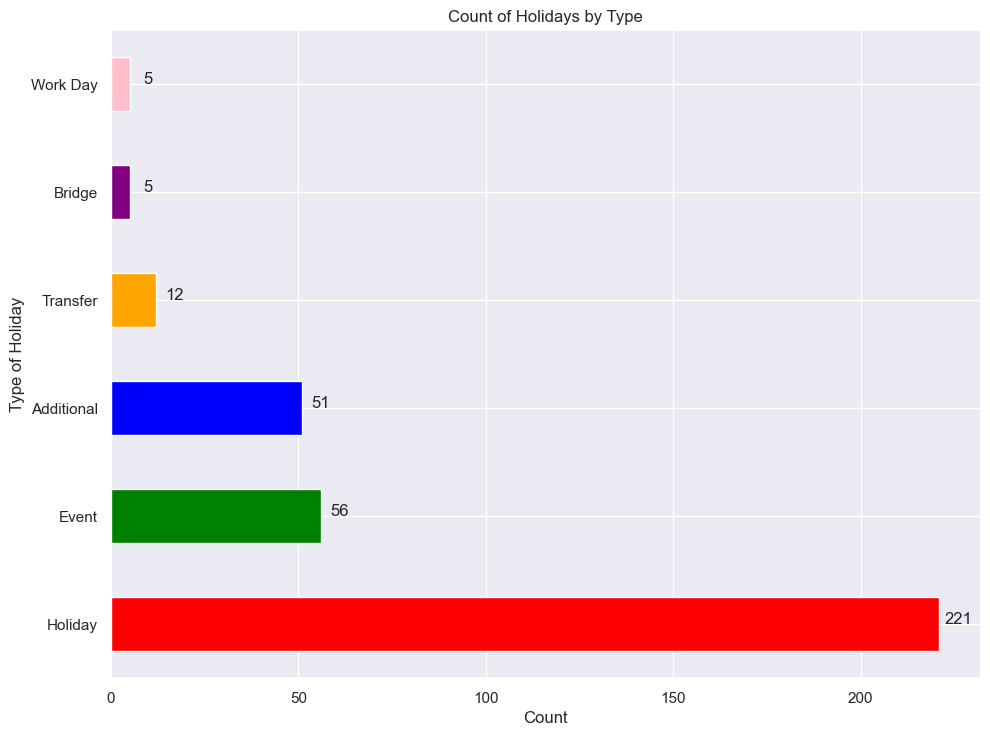

<Figure size 600x400 with 0 Axes>

In [78]:
# 1. Type of holiday vs count
holiday_count = df_holidays['type'].value_counts()
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
ax = holiday_count.plot(kind='barh', color=colors)
plt.title('Count of Holidays by Type')
plt.xlabel('Count')
plt.ylabel('Type of Holiday')
plt.figure(figsize=(6,4))

# Add text labels on top of each bar
for i, v in holiday_count.reset_index().iterrows():
    ax.text(v.type + 5, i, str(v.type), ha='center')

plt.show()

The Bar plot shows that Holiday 221 holidays followed by Event with 56 and Work Day and Bridge the least with only 5 holidays.

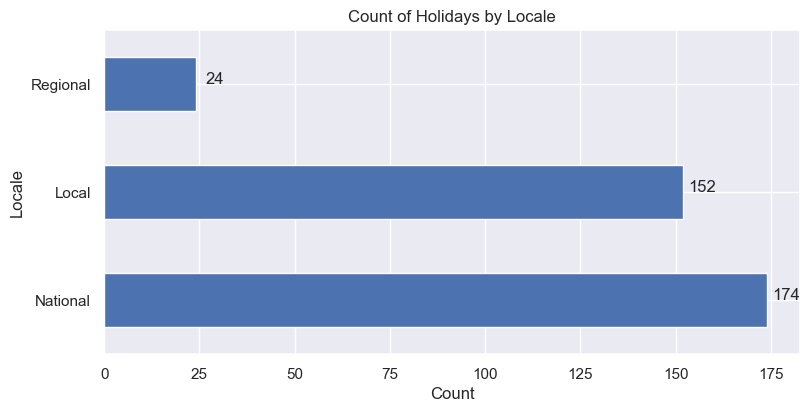

In [79]:
# 2. Locale vs count
locale_count = df_holidays['locale'].value_counts()
ax = locale_count.plot(kind='barh', figsize=(8, 4))
plt.title('Count of Holidays by Locale')
plt.xlabel('Count')
plt.ylabel('Locale')

# Add text labels on top of each bar
for i, v in locale_count.reset_index().iterrows():
    ax.text(v.locale + 5, i, str(v.locale), ha='center')

plt.show()

National holidays had the highest number of 174, followed by Local with 152 and Regional having 24.

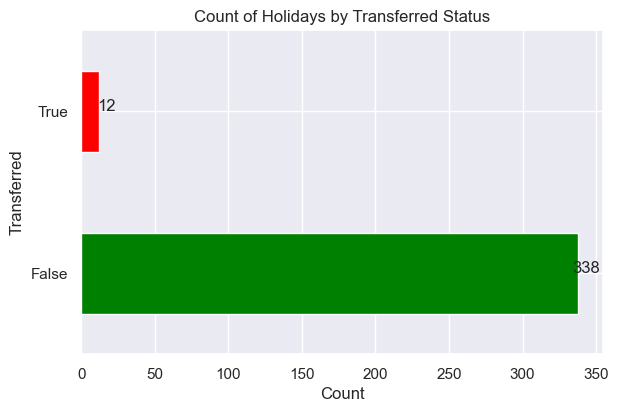

In [80]:
# 3. Count the number of holidays that were transferred or not
transferred_count = df_holidays['transferred'].value_counts()

ax = transferred_count.plot(kind='barh', color=['green', 'red'], figsize=(6, 4))
plt.title('Count of Holidays by Transferred Status')
plt.xlabel('Count')
plt.ylabel('Transferred')

# Add text labels on top of each bar
for i, v in transferred_count.reset_index().iterrows():
    ax.text(v.transferred + 5, i, str(v.transferred), ha='center')

plt.show()

Only 12 holidays were transfered to different dates.

### Multivariate analysis we shall perform on the df_holidays dataframe include:

1. Type of holiday and locale vs count 
    – We create a pivot table showing the count of holidays by both the type of holiday and the locale to see which type of holiday occurs most frequently in each locale.

2. Type of holiday and transferred vs count 
    – We create a pivot table showing the count of holidays by both the type of holiday and whether it was transferred or not to see which type of holiday was more likely to be moved.

3. Type of holiday and locale vs description 
    – We create a pivot table showing the description of each holiday by both the type of holiday and the locale to see what specific events occur most frequently in each locale and for each type of holiday.

In [81]:
# 1. Create a pivot table of holiday counts by type and locale
pivot_table = pd.pivot_table(df_holidays, values='date', index=['type'], columns=['locale'], aggfunc='count')

# Print the pivot table
print(pivot_table)

locale      Local  National  Regional
type                                 
Additional   11.0      40.0       NaN
Bridge        NaN       5.0       NaN
Event         NaN      56.0       NaN
Holiday     137.0      60.0      24.0
Transfer      4.0       8.0       NaN
Work Day      NaN       5.0       NaN


We can visualize the above output from the pivot table by using a stacked bar chart as shown below:

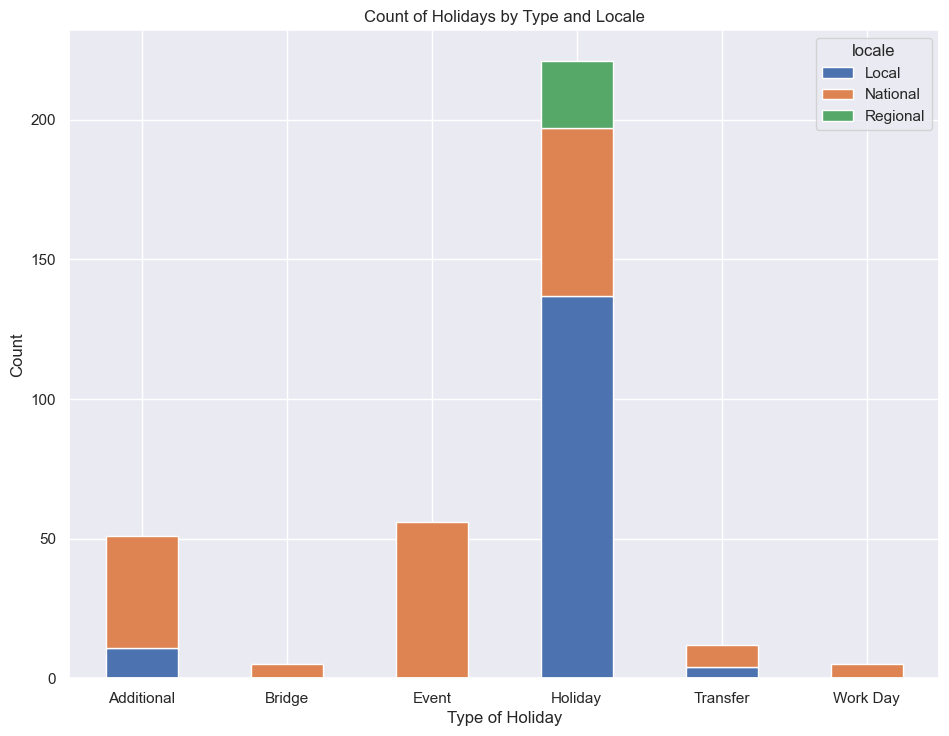

In [82]:
# Create a stacked bar chart of holiday counts by type and locale
pivot_table.plot(kind='bar', stacked=True)
plt.title('Count of Holidays by Type and Locale')
plt.xlabel('Type of Holiday')
plt.ylabel('Count')
# adjust x-axis labels rotation
plt.xticks(rotation=0)
plt.show()

The plot shows a stacked bar chart of the count of holidays by both the type of holiday and the locale.

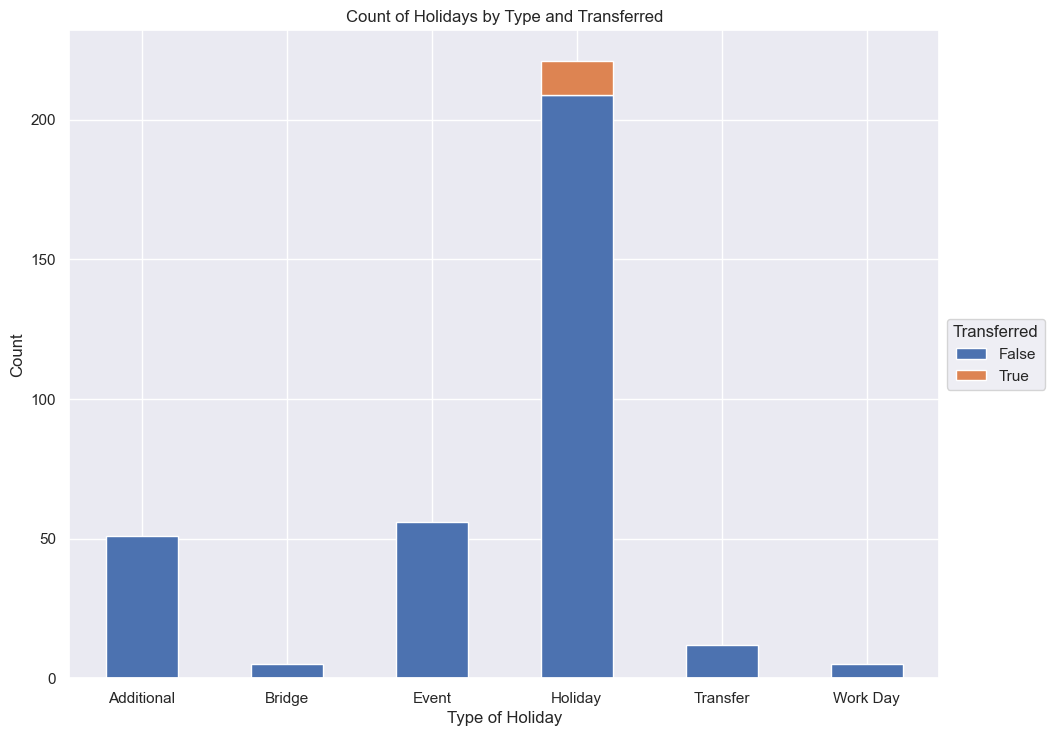

In [83]:
# create a pivot table of count of holidays by type and transferred columns
pivot_df = pd.pivot_table(df_holidays, values='date', index='type', columns='transferred', aggfunc='count', fill_value=0)

# create a bar chart to visualize the pivot table
ax = pivot_df.plot(kind='bar', stacked=True)
plt.title('Count of Holidays by Type and Transferred')
plt.xlabel('Type of Holiday')
plt.ylabel('Count')
plt.legend(title='Transferred', loc='center left', bbox_to_anchor=(1, 0.5))

# adjust x-axis labels rotation
plt.xticks(rotation=0)

plt.show()

From the bar graph it is clear that only the Holiday type had a total of 12 holidays transferred (as witnessed in earlier visualizations).

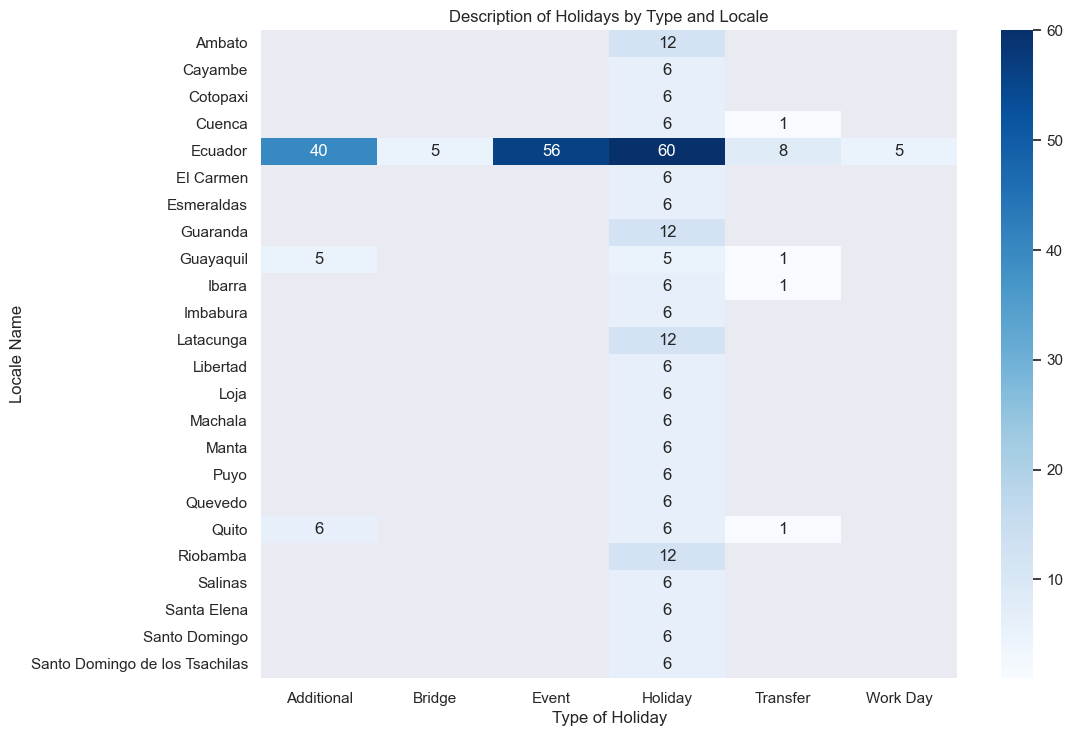

In [84]:
# Create a pivot table showing the description of each holiday by both the type of holiday and the locale
holiday_desc_pivot = df_holidays.pivot_table(values='description', index='locale_name', columns='type', aggfunc='count')

# Create a heatmap of the pivot table
sns.heatmap(holiday_desc_pivot, cmap='Blues', annot=True, fmt='g')
plt.title('Description of Holidays by Type and Locale')
plt.xlabel('Type of Holiday')
plt.ylabel('Locale Name')
plt.show()

- Based on the information from the Heatmap, Ecuador has the highest number of holidays compared to other locales. 
- This is evident from the high number of holidays in all categories. 
- The blue color concentration is due to the high number of holidays in Ecuador, which makes it stand out from the rest of the locales.

### Bivariate analysis to perform on the df_stores dataframe include:
<b>1. Cross-tabulation:</b> 
    - A cross-tabulation shall be performed between two categorical variables 'city' and 'type' of store. This will show how many stores of each type are located in each city.

<b>2. Scatter plot:</b> 
    - A scatter plot shall be created between two numerical variables such as the number of similar stores in that area 'cluster' and the store number 'store_nbr'. This will show if there is any relationship between the two variables.

In [85]:
df_stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

<b>Cross-tabulation:</b>
- We create a stacked bar chart showing the number of stores of each type in each city. 
- The x-axis will show the cities and the y-axis will show the number of stores. 
- Each bar will be split into segments, with each segment representing the number of stores of a particular type in that city.

In [86]:
# create the crosstab and sort by the highest number of stores
store_crosstab = pd.crosstab(df_stores['city'], df_stores['type']).sort_values(by='A', ascending=False)

# print the cross-tabulation
print(store_crosstab)

type           A  B  C  D  E
city                        
Quito          6  3  2  7  0
Ambato         1  0  0  1  0
Guayaquil      1  1  2  2  2
Manta          1  0  0  1  0
Loja           0  0  0  1  0
Salinas        0  0  0  1  0
Riobamba       0  0  1  0  0
Quevedo        0  0  1  0  0
Puyo           0  0  1  0  0
Playas         0  0  1  0  0
Machala        0  0  1  1  0
Libertad       0  0  0  0  1
Babahoyo       0  1  0  0  0
Latacunga      0  0  2  0  0
Ibarra         0  0  1  0  0
Guaranda       0  0  1  0  0
Esmeraldas     0  0  0  0  1
El Carmen      0  0  1  0  0
Daule          0  0  0  1  0
Cuenca         0  1  0  2  0
Cayambe        0  1  0  0  0
Santo Domingo  0  1  1  1  0


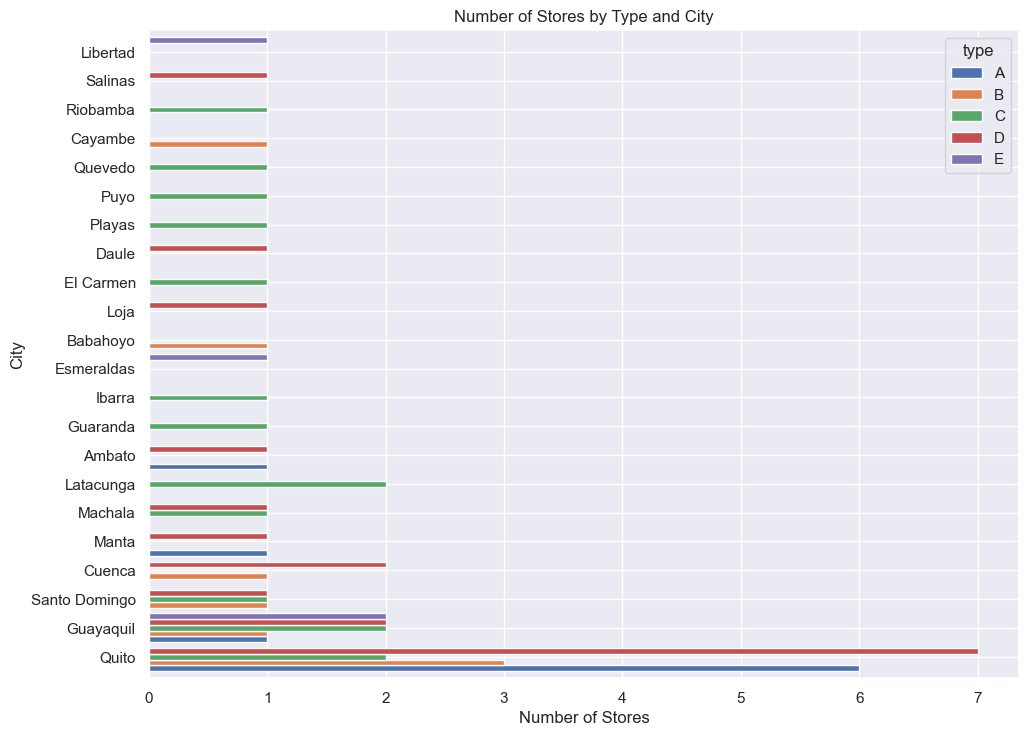

In [87]:
# create the crosstab
store_crosstab = pd.crosstab(df_stores['city'], df_stores['type'])

# sort the values in descending order by the sum of columns
store_crosstab = store_crosstab.loc[store_crosstab.sum(axis=1).sort_values(ascending=False).index]

# plot the horizontal bar chart
ax = store_crosstab.plot.barh(figsize=(10, 8), width=1)

# set the title and axis labels
plt.title('Number of Stores by Type and City')
plt.xlabel('Number of Stores')
plt.ylabel('City')

# display the plot
plt.show()

From the bar graph above the stores distribution by Cities is as follows: 
1. <b>Quito</b> has the most number of stores except type E as follows: Type A = 6, Type B = 3, Type C = 2, Type D = 7 and Type E = 0.
2. <b>Guayaquil</b> has all the store types as follows: Type A = 1, Type B = 1, Type C = 2, Type D= 2 and Type E = 2 and,
3. <b>Santo Domingo</b> has three stores as follows: Type B = 1, Type C = 1 and Type D = 1 
4. All other cities have 1 or 2 store types only.

<b>Scatter plot:</b>
- We shall create a scatter plot between two numerical variables 'cluster' and  'store_nbr'.

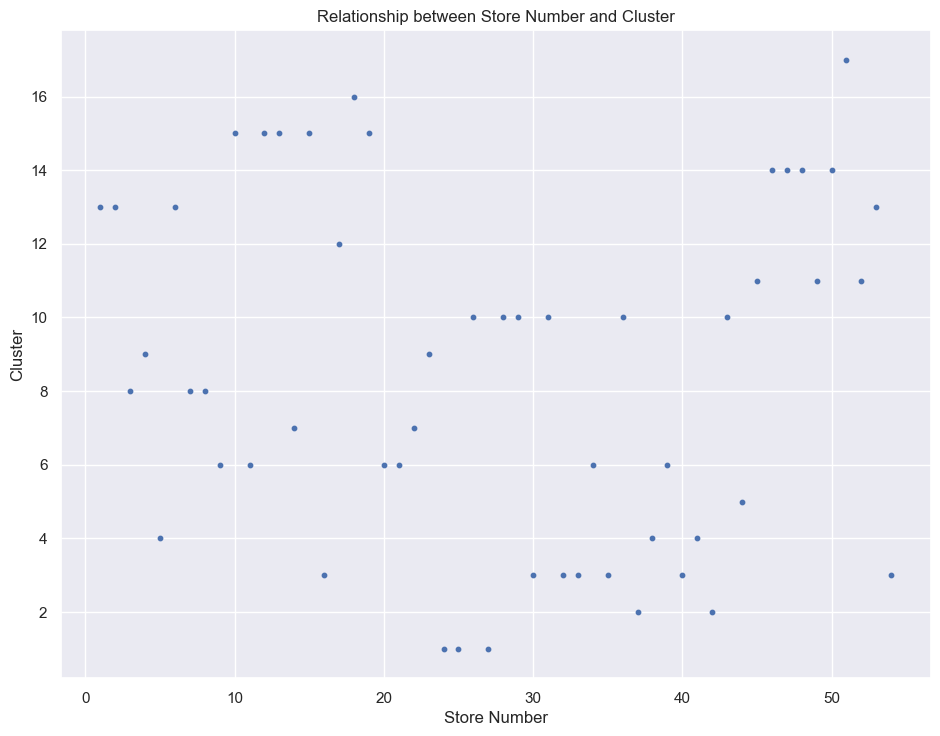

<Figure size 600x400 with 0 Axes>

In [88]:
plt.scatter(df_stores['store_nbr'], df_stores['cluster'], s=10)
plt.title('Relationship between Store Number and Cluster')
plt.xlabel('Store Number')
plt.ylabel('Cluster')
plt.figure(figsize=(6,4))
plt.show()

The points in the scatter plot are scattered all over the graph, an indication that there is no or weak correlation between the two variables. In this case, it is the number of similar stores in that area (cluster) and the store number (store_nbr)

### 5.	Hypothesis and Questions:
- The questions below are to be answered. <b>Note</b> that we are free to draw more hypotheses from the data.
    1. Is the train dataset complete (has all the required dates)?
    2. Which dates have the lowest and highest sales for each year?
    3. Did the earthquake impact sales?
    4. Are certain groups of stores selling more products? (Cluster, city, state, type)
    5. Are sales affected by promotions, oil prices and holidays?
    6. What analysis can we get from the date and its extractable features?
    7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


### Q1. Is the train dataset complete (has all the required dates)?
We check the train dataset's completeness by using the isnull() method to see if there are any missing values in the df train dataset:

In [89]:
df_train = df_train.reset_index()
# df_train DataFrame with a 'date' column
start_date = df_train['date'].min()
end_date = df_train['date'].max()

# create date range with frequency of 1 day
date_range = pd.date_range(start_date, end_date, freq='D')

# check for missing dates
missing_dates = date_range[~date_range.isin(df_train['date'])]
print('Missing Dates:',missing_dates)

Missing Dates: DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


- <b>There are missing dates for Christmas days,</b>

- <b>There are no sales information on christmas days</b>

### Q2. Which dates have the lowest and highest sales for each year?
We can categorize the train dataset by year and date, and then calculate the minimum and maximum sales for each year.

1. <b>Add new columns containing the date features to the train data<b>
2. <b>Plot sales over year, months and days<b>

In [90]:
df_train.head()

date  id  store_nbr      family  sales  onpromotion
0 2013-01-01   0          1  AUTOMOTIVE    0.0            0
1 2013-01-01   1          1   BABY CARE    0.0            0
2 2013-01-01   2          1      BEAUTY    0.0            0
3 2013-01-01   3          1   BEVERAGES    0.0            0
4 2013-01-01   4          1       BOOKS    0.0            0

In [91]:
#Create new columns
df_train_copy["year"]=df_train_copy.index.year
df_train_copy["month"]=df_train_copy.index.month
df_train_copy["weekday"]=df_train_copy.index.day_of_week

In [92]:
df_train_copy.head()

id  store_nbr      family  sales  onpromotion  year  month  \
date                                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013      1   
2013-01-01   1          1   BABY CARE    0.0            0  2013      1   
2013-01-01   2          1      BEAUTY    0.0            0  2013      1   
2013-01-01   3          1   BEVERAGES    0.0            0  2013      1   
2013-01-01   4          1       BOOKS    0.0            0  2013      1   

            weekday  
date                 
2013-01-01        1  
2013-01-01        1  
2013-01-01        1  
2013-01-01        1  
2013-01-01        1

In [93]:
df_train_copy = df_train_copy.reset_index()
# Group by year and find the dates with the lowest and highest sales
sales_by_year = df_train_copy.groupby(df_train_copy['date'].dt.year)['sales'].agg(['min', 'max'])
sales_by_year = sales_by_year.sort_values(by='max', ascending=False)
# Print the results
print(sales_by_year)

      min         max
date                 
2016  0.0  124717.000
2013  0.0   46271.000
2014  0.0   45361.000
2015  0.0   40351.460
2017  0.0   38422.625


<b>Visualizing the result:</b>

Index(['sales_min_2013', 'sales_min_2014', 'sales_min_2015', 'sales_min_2016',
       'sales_min_2017', 'sales_max_2013', 'sales_max_2014', 'sales_max_2015',
       'sales_max_2016', 'sales_max_2017'],
      dtype='object')


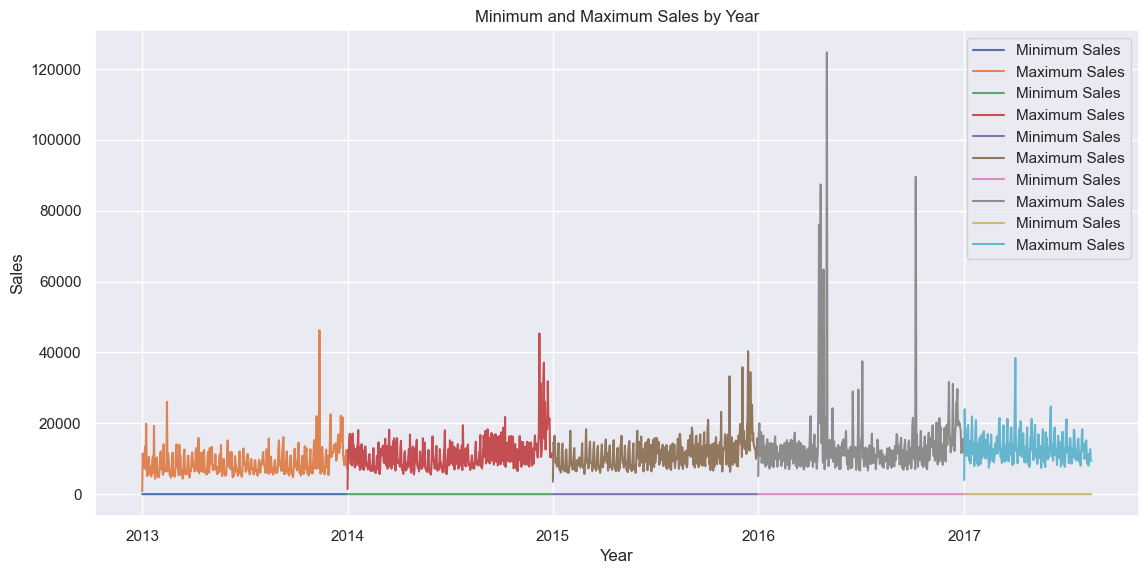

In [94]:
# Convert date column to datetime
df_train_copy['date'] = pd.to_datetime(df_train_copy['date'])

# Group by year and date, calculate min and max sales
sales_by_year = df_train_copy.groupby([df_train_copy['date'].dt.year, 'date']).agg({'sales': ['min', 'max']})

# Unstack the multi-level columns and rename them
sales_by_year = sales_by_year.unstack(level=0)
sales_by_year.columns = ['_'.join(map(str, col)).strip() for col in sales_by_year.columns.values]

# Print columns to check for any changes
print(sales_by_year.columns)

# Set the figure size to 12 inches by 6 inches
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(sales_by_year.index, sales_by_year['sales_min_2013'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2013'], label='Maximum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_min_2014'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2014'], label='Maximum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_min_2015'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2015'], label='Maximum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_min_2016'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2016'], label='Maximum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_min_2017'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2017'], label='Maximum Sales')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Minimum and Maximum Sales by Year')
plt.show()


<b>We had Highest Sales in the year 2016 particularly in the 2nd and 3rd Quarter of the year with a maximum of 124,717.<b>

### Visualize  the  months with the highest sales of each year as well.

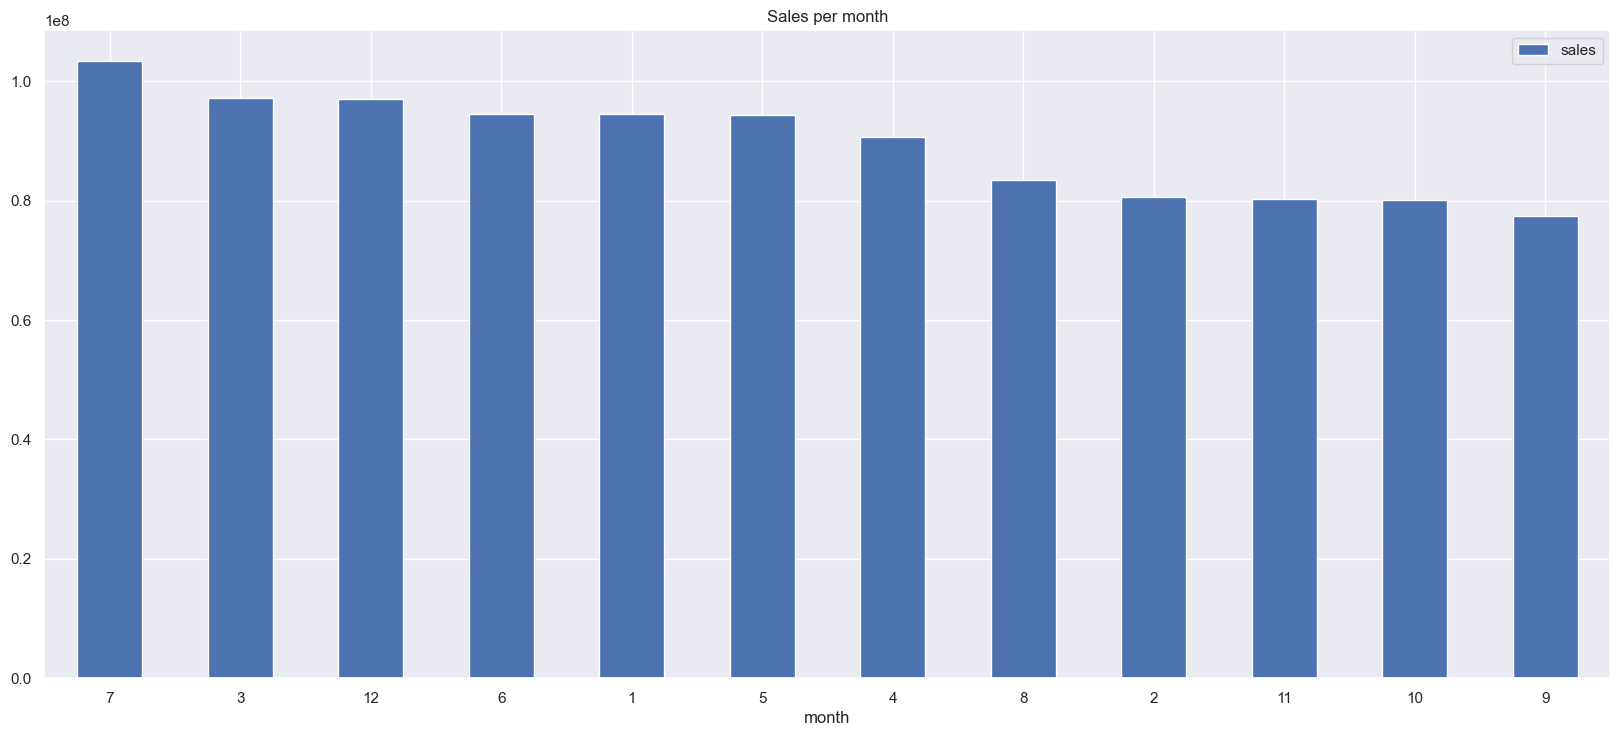

In [95]:
# Create a df and groupby month, agg sales using the sum 
month_grp = df_train_copy.groupby("month", as_index=False)["sales"].sum()

# Sort the values by sales in descending order
month_grp = month_grp.sort_values(by="sales", ascending=False)

# Plot sales for each month
month_grp.plot(kind="bar", x="month", y="sales", figsize=(18,8))
plt.title("Sales per month")

# Set x-axis label to upright position
plt.xticks(rotation=0)
plt.show()

<b> Sales tend to be higher in the beginning, middle and end of the year.</b>

### Visualize the Days with the Highest Sales

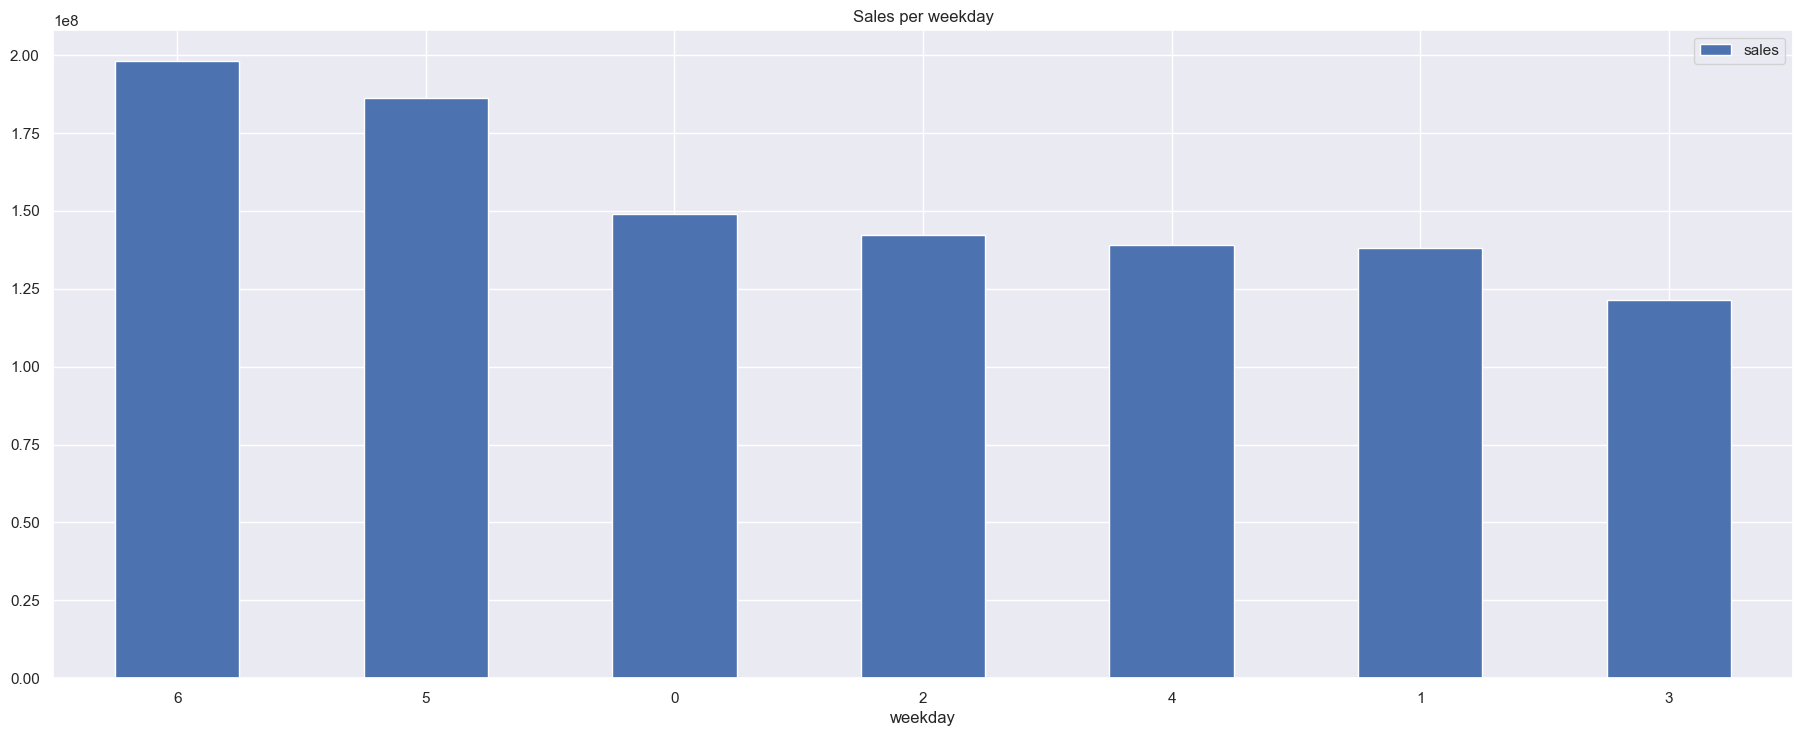

In [96]:
# Create a df and groupby weekday, agg sales using the sum 
day_grp=df_train_copy.groupby("weekday",as_index=False)["sales"].sum()

# Sort the values by sales in descending order
day_grp = day_grp.sort_values(by="sales", ascending=False)

# Plot sales for each day
day_grp.plot(kind="bar",x="weekday",y="sales",figsize=(20,8))
plt.title("Sales per weekday")

# Set x-axis label to upright position
plt.xticks(rotation=0)
plt.show()

<b>Sales tend to be higher on Weekends, Saturdays and Sundays and lower in the middle of the week.</b>

### Q3. Did the earthquake impact sales?
- We can compare sales before and after the earthquake to see if the earthquake had an effect on sales. We can do this by calculating the average sales before and after the earthquake and comparing the results.

In [97]:
earthquake_date = pd.to_datetime('2016-04-16')
sales_before_earthquake = df_train[df_train['date'] < earthquake_date]['sales'].mean()
sales_after_earthquake = df_train[df_train['date'] >= earthquake_date]['sales'].mean()

if sales_after_earthquake > sales_before_earthquake:
    print("Sales increased after the earthquake")
elif sales_after_earthquake < sales_before_earthquake:
    print("Sales decreased after the earthquake")
else:
    print("Sales did not change after the earthquake")

Sales increased after the earthquake


### Visualize the impact of Earthquake on Sales

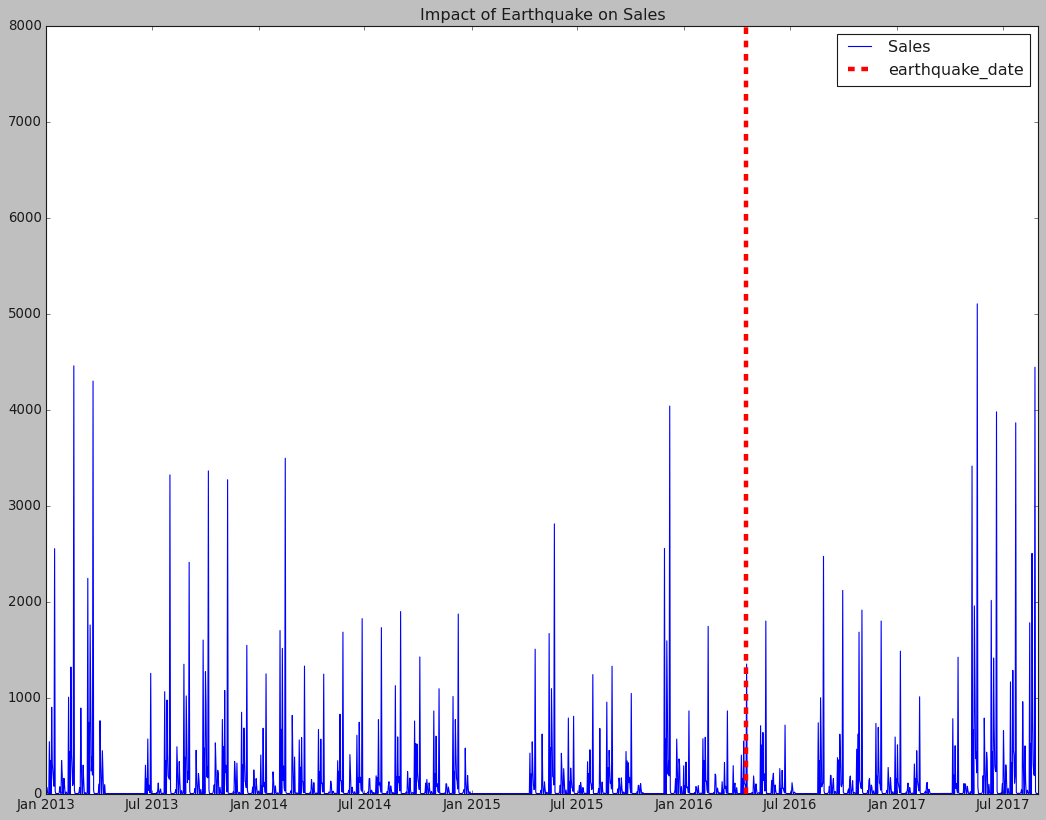

In [98]:
# Convert date column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

#Day of earthquake
earthquake_date=pd.to_datetime('2016-04-16')

#plot sales and earthquake
#set style
plt.style.use("classic")
#plot graph
fig_ax=df_train["sales"].plot(kind="line",figsize=(16,12),color="blue",label="Sales",);
#add vertical line
fig_ax.axvline(earthquake_date,ls="--",color="red",label="earthquake_date", linewidth=4);
#set title and legend
plt.title("Impact of Earthquake on Sales")
plt.legend(loc="best")

# set x-axis limits manually
plt.xlim(pd.to_datetime('2013-01-01'), pd.to_datetime('2017-08-31'))
plt.ylim(0, 8000)

plt.show()

It can be seen that there was an increase in sales after Earthquake going by year.

### Visualize Impact of Earthquake on Mean Monthly Sales 

Before we visualize, we shall add columns month, week, and day to the df_train dataframe.

In [99]:
# Print the updated dataframe
print(df_train_copy.head())

        date  id  store_nbr      family  sales  onpromotion  year  month  \
0 2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013      1   
1 2013-01-01   1          1   BABY CARE    0.0            0  2013      1   
2 2013-01-01   2          1      BEAUTY    0.0            0  2013      1   
3 2013-01-01   3          1   BEVERAGES    0.0            0  2013      1   
4 2013-01-01   4          1       BOOKS    0.0            0  2013      1   

   weekday  
0        1  
1        1  
2        1  
3        1  
4        1  


#### Visualizing the impact of Earthquake on sales
1. The code produces a line plot of total weekly sales over time, with a vertical line indicating the earthquake date. 
2. It then computes the mean sales before and after the earthquake and prints a message indicating whether sales increased, decreased, or remained unchanged.

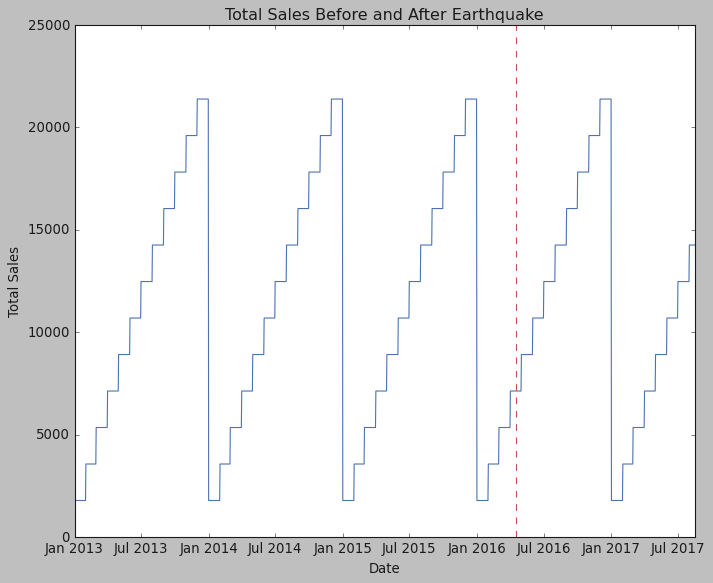

Sales increased after the earthquake


In [100]:
# Group by date and sum the weekly sales
sales_by_date = df_train_copy.groupby('date')['month'].sum()

# Plot the sales by date
plt.figure(figsize=(10,8))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.axvline(x=earthquake_date, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Before and After Earthquake')
plt.show()

# Calculate mean sales before and after earthquake
sales_before_earthquake = df_train_copy[df_train_copy['date'] < earthquake_date]['month'].mean()
sales_after_earthquake = df_train_copy[df_train_copy['date'] >= earthquake_date]['month'].mean()

# Print the results
if sales_after_earthquake > sales_before_earthquake:
    print("Sales increased after the earthquake")
elif sales_after_earthquake < sales_before_earthquake:
    print("Sales decreased after the earthquake")
else:
    print("Sales did not change after the earthquake")

### Q4. Are certain groups of stores selling more products? (Cluster, city, state, type)
- <b>We divide the dataset into groups based on the store nbr, family, or month columns and compute the mean sales for each group. We can then compare the mean sales across different groups to see if certain types of stores sell more products than others.</b>

In [101]:
df_train.head()

date  id  store_nbr      family  sales  onpromotion
0 2013-01-01   0          1  AUTOMOTIVE    0.0            0
1 2013-01-01   1          1   BABY CARE    0.0            0
2 2013-01-01   2          1      BEAUTY    0.0            0
3 2013-01-01   3          1   BEVERAGES    0.0            0
4 2013-01-01   4          1       BOOKS    0.0            0

<b>The below code generates three bar charts, one for each of the three variables under consideration.</b> 
1. The first chart depicts mean sales by store number, 
2. The second depicts mean sales by product family, and 
3. The third depicts mean sales by month. 

To make it easier to understand what we're looking at, each chart has a title, x-axis label, and y-axis label.

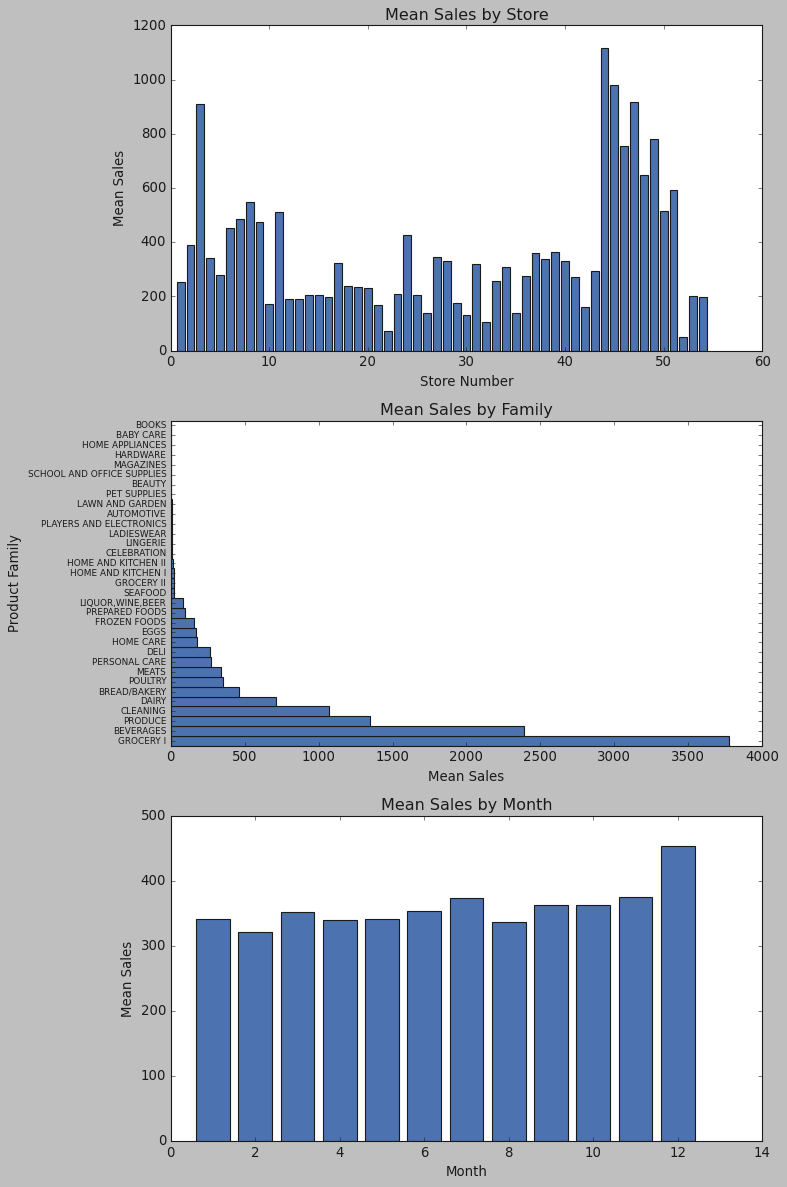

In [102]:
sales_by_store = df_train_copy.groupby('store_nbr').agg({'sales': 'mean'})
sales_by_family = df_train_copy.groupby('family').agg({'sales': 'mean'})
sales_by_month = df_train_copy.groupby('month').agg({'sales': 'mean'})

# Sort each dataframe by mean sales in descending order
sales_by_store = sales_by_store.sort_values('sales', ascending=False)
sales_by_family = sales_by_family.sort_values('sales', ascending=False)
sales_by_month = sales_by_month.sort_values('sales', ascending=False)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot sales by store
axs[0].bar(sales_by_store.index, sales_by_store['sales'])
axs[0].set_xlabel('Store Number')
axs[0].set_ylabel('Mean Sales')
axs[0].set_title('Mean Sales by Store')

# Plot sales by family
axs[1].barh(sales_by_family.index, sales_by_family['sales'], height=1.0)
axs[1].set_xlabel('Mean Sales')
axs[1].set_ylabel('Product Family')
axs[1].set_title('Mean Sales by Family')
axs[1].tick_params(axis='y', labelsize=8)

# Plot sales by month
axs[2].bar(sales_by_month.index, sales_by_month['sales'])
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Mean Sales')
axs[2].set_title('Mean Sales by Month')

# Show the plots
plt.tight_layout()
plt.show()

### Stores with the highest Sales

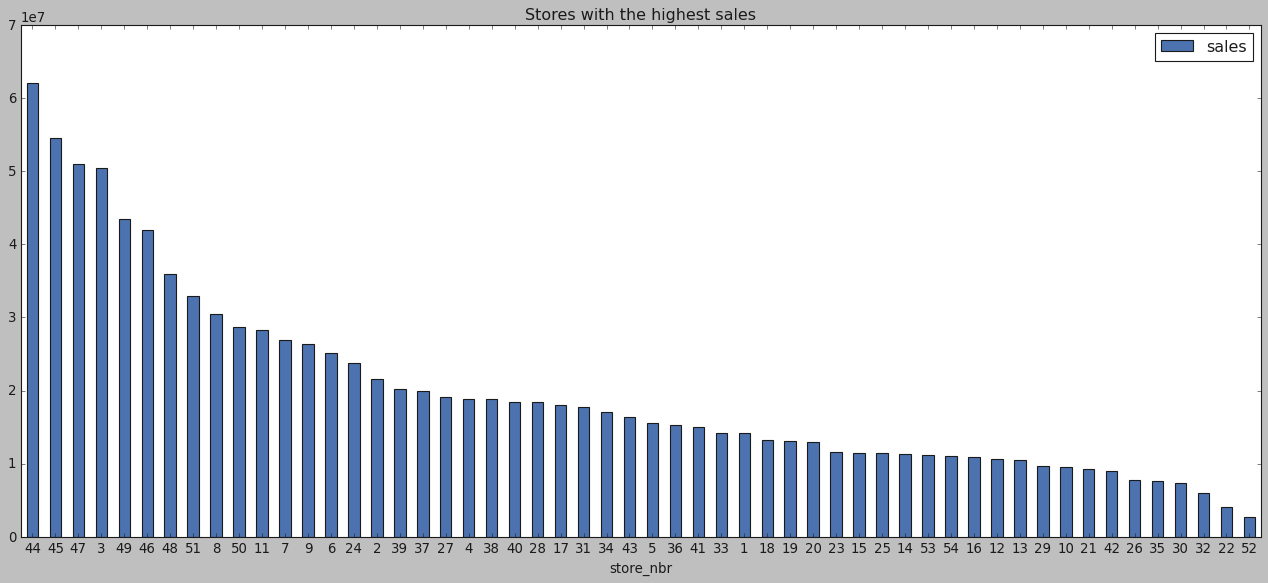

In [103]:
store_grp = df_train.groupby("store_nbr", as_index=False)["sales"].sum()
store_grp = store_grp.sort_values(by='sales', ascending=False)  # sort by sales in descending order

store_grp.plot(kind="bar", x="store_nbr", y="sales", figsize=(20, 8), title="Stores with the highest sales")
plt.xticks(rotation=0)
plt.show()

<b>Stores 44, 45, 47 and 3 have the highest sales</b>

### Highest sales by city

In [104]:
# Make a copy of train df and reset index
df=df_train.copy().reset_index()
# Merge store and train datasets on store_nbr
store_train_df=pd.merge(df_train,df_stores,on="store_nbr")
# Group by city
city_grp=store_train_df.groupby("city", as_index=False)["sales"].sum()
# Print top 5 cities
city_grp.sort_values(by="sales",ascending=False,inplace=True)

city_grp.head()

city         sales
18          Quito  5.567418e+08
8       Guayaquil  1.229673e+08
3          Cuenca  4.916860e+07
0          Ambato  4.030440e+07
21  Santo Domingo  3.583432e+07

<b>The top 5 cities with most sales</b>

### Visualize Top Cities

<AxesSubplot:title={'center':'Top 10 cities with most sales'}, ylabel='city'>

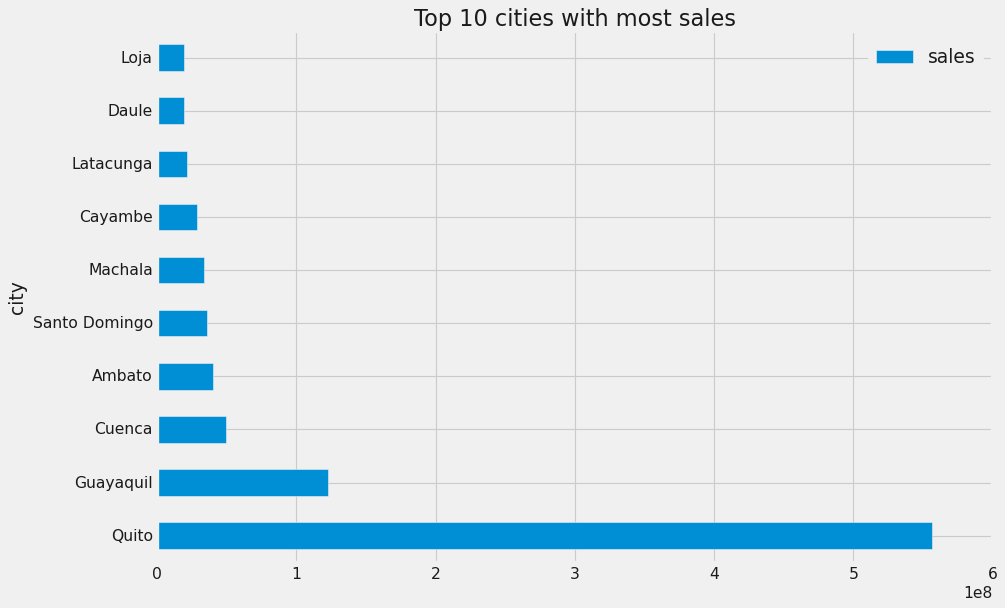

In [105]:
#set style
plt.style.use("fivethirtyeight")
#plot top 10 cities
data=city_grp.head(10)

data.plot("city","sales",kind="barh",title="Top 10 cities with most sales",figsize=(12,8))

<b>The highest sales occurs in Quito, lets check how the stores are distributed in the country</b>

In [106]:
#How are the stores distributed around the country

stores_dist=df_stores.groupby(['city']).count().sort_values(by="store_nbr",ascending=False)
stores_dist.head()

store_nbr  state  type  cluster
city                                          
Quito                 18     18    18       18
Guayaquil              8      8     8        8
Santo Domingo          3      3     3        3
Cuenca                 3      3     3        3
Manta                  2      2     2        2

<b>Quito has most store distribution followed by Guayaquil</b>

### Q5. Are sales affected by promotions, oil prices and holidays?

### Sales and Promotions

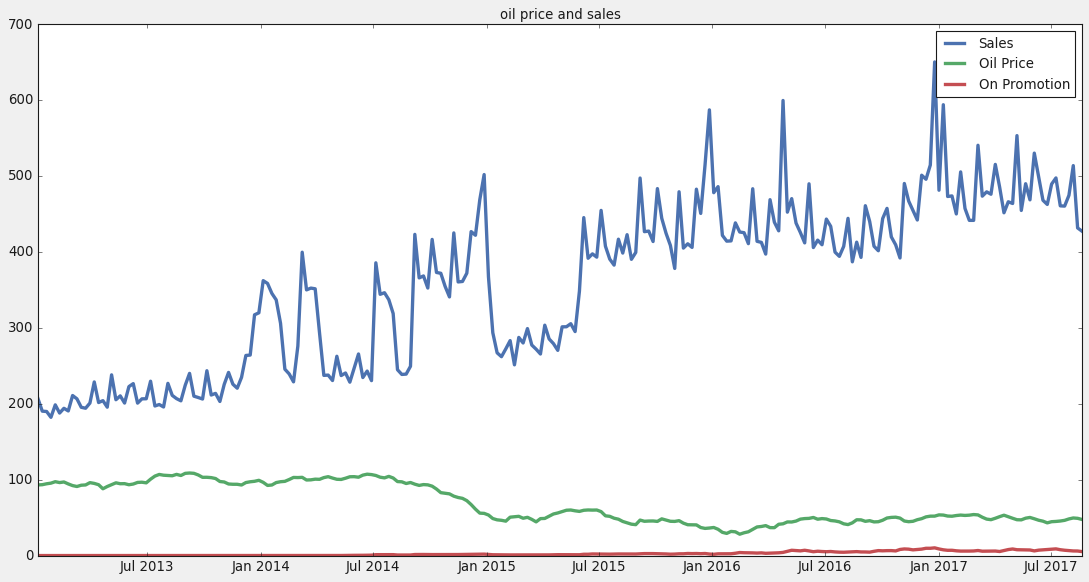

In [107]:
# Make a copy
df_oil_train_copy=df_oil_train.copy()

# Change date to datetime
df_oil_train_copy["date"]=pd.to_datetime(df_oil_train_copy["date"])

# Set date as index
df_oil_train_copy.set_index("date",inplace=True)
#Resample to weekly
df_oil_train_copy=df_oil_train_copy.resample("W").mean()

#plot sales and oil price and on promotion on one graph
plt.figure(figsize=(15,8))
plt.style.use("classic")
plt.plot(df_oil_train_copy["sales"],linewidth=3,label="Sales")
plt.plot(df_oil_train_copy["oil price"],linewidth=3,label="Oil Price")
plt.plot(df_oil_train_copy["onpromotion"],linewidth=3,label="On Promotion")
plt.title("oil price and sales",fontsize=12)
plt.legend(loc="best",fontsize=12)

1. Looking at the graph, we can see that the sales and oil price time series have generally increased from 2013 to mid-2014. 
2. However, there are also fluctuations in the sales time series, particularly in early 2014 and mid-2015. 
3. The on promotion time series is mostly constant, indicating that the number of promotions did not change significantly during this time period.

The graph depicts the relationship between sales and oil prices, revealing that the two time series are somewhat positively correlated. However, because correlation does not imply causation, we cannot conclude that changes in oil prices caused changes in sales without further investigation.

### The Time Series of Sales, Oil price, and Promotion 

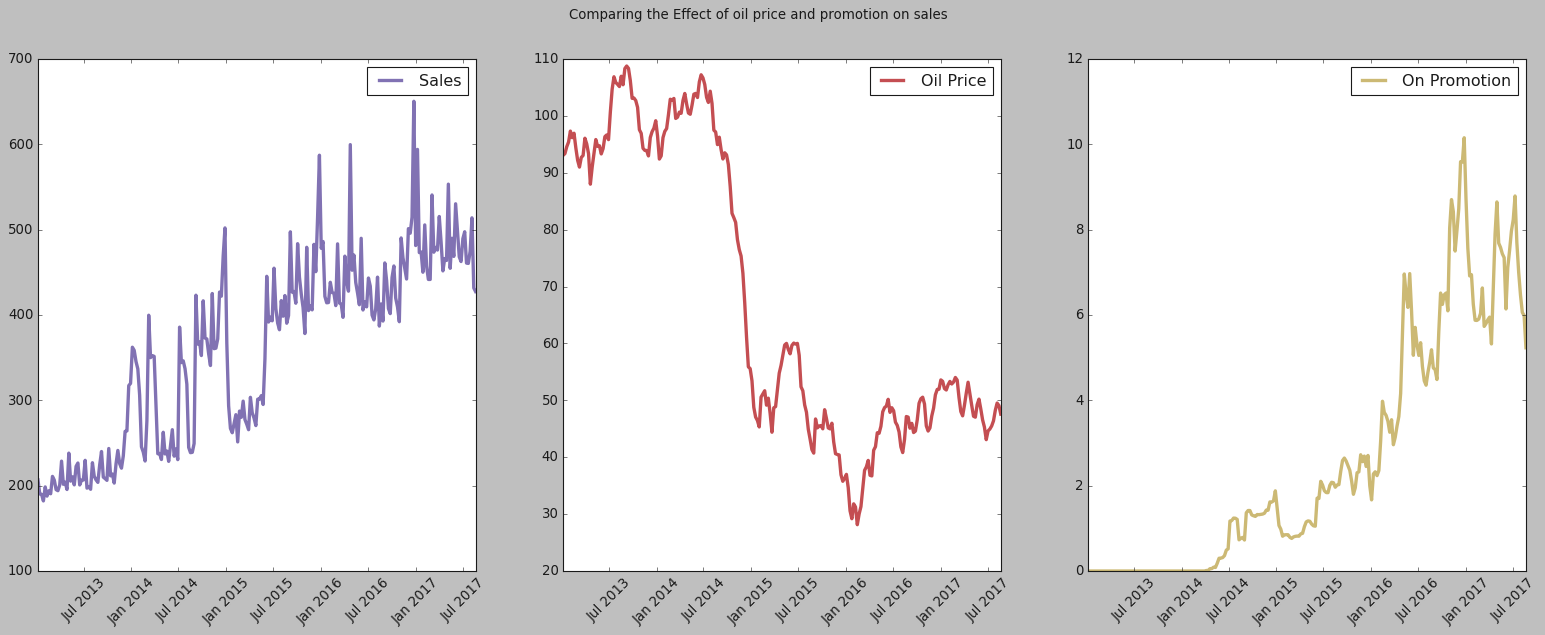

In [108]:
# Create subplots
fig, axs = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(24, 8))

fig.suptitle("Comparing the Effect of oil price and promotion on sales")

axs = axs.ravel()

# Plot individual graphs
axs[0].plot(df_oil_train_copy["sales"], linewidth=3, label="Sales", c="m")
axs[0].legend()

axs[1].plot(df_oil_train_copy["oil price"], linewidth=3, label="Oil Price", c="r")
axs[1].legend()

axs[2].plot(df_oil_train_copy["onpromotion"], linewidth=3, label="On Promotion", c="y")
axs[2].legend()

# Set x-tick label rotation
for ax in axs:
    ax.tick_params(axis='x', labelrotation=45)

plt.show()

#### We can see from the three graphs that:

1. Sales are highly variable, with peaks and valleys that occur over time. However, there appears to be a general upward trend in sales over the course of the period.

2. Oil price: The price of oil fluctuates over time, with high periods followed by low periods.

3. On sale: The number of products on sale varies over time, with some weeks having more sales than others.

4. On promotion: The number of products on promotion varies over time, with some weeks having more promotions than others.

##### When we compare the three graphs, we can see that there are times when sales appear to be correlated with oil prices and promotions, such as around the middle of 2017 and early 2018. This relationship, however, is not always consistent, implying that other factors may also be influencing sales.

### Q6. What analysis can we get from the date and its extractable features?
1. We can extract features such as day of the week, month, and year from the date column and use them as features in our model.

2. We can also create:
    - <b>lag features</b> to capture the sales history of each store and item, 
    - calculate <b>rolling statistics</b>, and 
    - calculate <b>sales and promotional features</b>, as mentioned earlier in the project.

<b>1. Create lag features:</b>
- To create lag features, we can use the pandas shift method. We can shift the transactions column by 1, 2, and 3 days to create 3 lag features.

In [109]:
df_transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [110]:
df_transactions_copy=df_transactions.copy()
df_transactions_copy['transactions_lag7'] = df_transactions_copy.groupby('store_nbr')['transactions'].shift(7)
df_transactions_copy['transactions_lag14'] = df_transactions_copy.groupby('store_nbr')['transactions'].shift(14)
df_transactions_copy['transactions_lag21'] = df_transactions_copy.groupby('store_nbr')['transactions'].shift(21)


### The above code does the following:
1. In df_transactions, this code adds three new columns: transactions lag7, transactions lag14, and transactions lag21. 
2. For each store, these columns contain the transaction values shifted by 7, 14, and 21 days. 
3. Before applying the shift, the groupby method is used to group the transactions by store number. 
4. This ensures that the lag characteristics are calculated independently for each store.

Visualization of the lag features:

In [111]:
for lag in range(7, 22,7):
    df_transactions_copy[f'transactions_lag{lag}'] = df_transactions_copy.groupby('store_nbr')['transactions'].shift(lag)

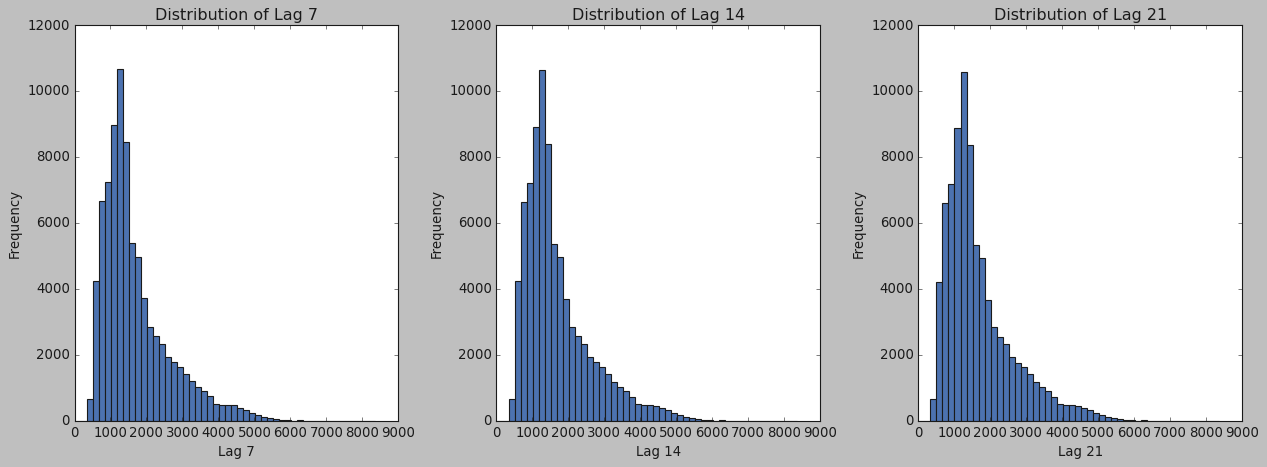

In [112]:

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axs[0].hist(df_transactions_copy['transactions_lag7'].dropna(), bins=50)
axs[0].set_xlabel('Lag 7')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Lag 7')

axs[1].hist(df_transactions_copy['transactions_lag14'].dropna(), bins=50)
axs[1].set_xlabel('Lag 14')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Lag 14')

axs[2].hist(df_transactions_copy['transactions_lag21'].dropna(), bins=50)
axs[2].set_xlabel('Lag 21')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Lag 21')

plt.tight_layout()
plt.show()

- From the above plots, there are no significant differences between the transaction values for the three different lags, so we can conclude that the transaction data does not exhibit any significant trend or seasonality over a period of 21 days. 
- This could suggest that the transactions are relatively stable over short periods of time, and that longer-term trends or seasonal patterns may be more important to consider when analyzing this data.

<b>It is important to note, however, that this conclusion is solely based on the analysis of three lags, and it may be necessary to examine the data over longer time periods or with different lag intervals to draw more definitive conclusions about the presence or absence of trends or seasonality.</b>

<b>2. Calculate Rolling Statistic (or Moving Average)</b>
- The rolling mean's significance stems from its ability to smooth out short-term fluctuations while highlighting long-term trends in data. 
- The rolling mean provides a more accurate representation of the underlying patterns in the data by calculating the average value of a subset of data points over time. 
- This is especially useful when there is a lot of noise or variability in the data, making it difficult to identify trends.

The code below calculates the rolling mean (Moving Average) and standard deviation for the transactions column of df_transactions, using a window of 7 days:

In [113]:
# convert date column to datetime type
df_transactions_copy['date'] = pd.to_datetime(df_transactions_copy['date'])

# set date column as index
df_transactions_copy.set_index('date', inplace=True)

# calculate rolling mean and standard deviation with a window of 7 days
rolling_mean = df_transactions_copy['transactions'].rolling(window=7).mean()
rolling_std = df_transactions_copy['transactions'].rolling(window=7).std()

# add the rolling statistics as new columns in the dataframe
df_transactions_copy['rolling_mean'] = rolling_mean
df_transactions_copy['rolling_std'] = rolling_std

<b>Visualizing the original data vs the Rolling mean</b>

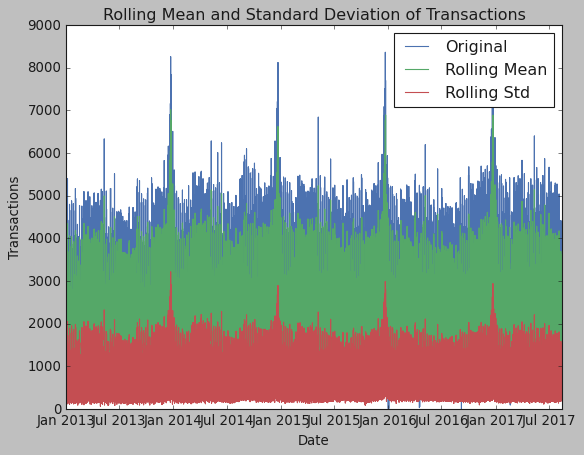

In [114]:
# reset the index to bring 'date' back as a column
df_transactions_copy.reset_index(inplace=True)


# plot the original data
plt.plot(df_transactions_copy['date'], df_transactions_copy['transactions'], label='Original')

# plot the rolling mean
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')

# plot the rolling standard deviation
plt.plot(rolling_std, label='Rolling Std')

# set plot labels and title
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Rolling Mean and Standard Deviation of Transactions')
plt.legend()

# display the plot
plt.show()

1. The above plot shows how the rolling mean has been used to smooth out fluctuations in a time series and highlight trends. 
2. By comparing the rolling mean to the original data, we see whether there are any significant deviations from the trend. 
3. The rolling standard deviation is used to identify periods of high or low volatility in the time series (which can be identified to be happening at the end of every year).

<b>3. calculate sales and promotional features</b>
- To calculate sales and onpromotion features, first we group the data by the relevant columns (e.g., date, store nbr) and 
- Then apply various aggregation functions (e.g., sum, mean, count) to the sales and onpromotion columns using the groupby method as shown below

In [115]:
df_train.head()

date  id  store_nbr      family  sales  onpromotion
0 2013-01-01   0          1  AUTOMOTIVE    0.0            0
1 2013-01-01   1          1   BABY CARE    0.0            0
2 2013-01-01   2          1      BEAUTY    0.0            0
3 2013-01-01   3          1   BEVERAGES    0.0            0
4 2013-01-01   4          1       BOOKS    0.0            0

In [116]:
# Group by date and store_nbr, and calculate the sum of sales and the count of onpromotion
sales_onpromotion = df_train.groupby(['date', 'store_nbr']).agg({'sales': 'sum', 'onpromotion': 'count'})

# Rename the columns to reflect the aggregated features
sales_onpromotion = sales_onpromotion.rename(columns={'sales': 'total_sales', 'onpromotion': 'promo_count'})

# Print the resulting dataframe
print(sales_onpromotion)


                       total_sales  promo_count
date       store_nbr                           
2013-01-01 1              0.000000           33
           2              0.000000           33
           3              0.000000           33
           4              0.000000           33
           5              0.000000           33
...                            ...          ...
2017-08-15 50         16879.121004           33
           51         20154.559000           33
           52         18600.046000           33
           53          8208.189000           33
           54         12666.858000           33

[90936 rows x 2 columns]


#### Visualization of sales and promotional features
<b>(a) We use the line plot to visualize sales and promotional featues</b> 

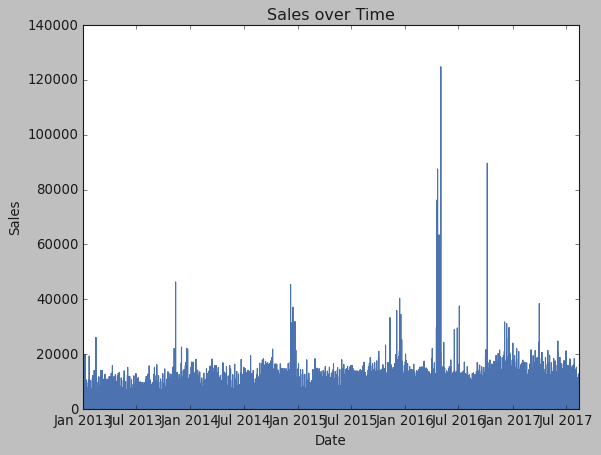

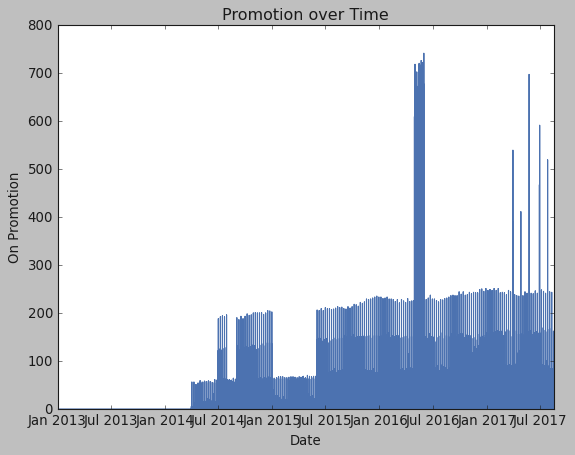

In [117]:
# create a line plot of sales
plt.plot(df_train['date'], df_train['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.show()

# create a line plot of promotion
plt.plot(df_train['date'], df_train['onpromotion'])
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('Promotion over Time')
plt.show()


From the above plot, it can be observed that there were high sales when the promotions were high, for example, from mid-2015 upto the end of that year and again in mid 2016

<b>(b) Use of Scatter Plot to visualize sales and promotional featues</b>

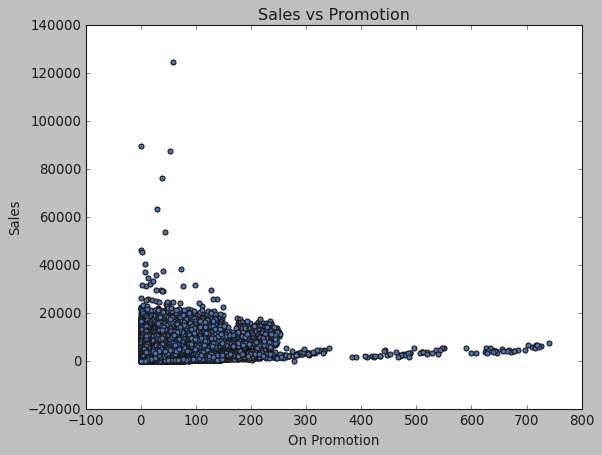

In [118]:
import matplotlib.pyplot as plt

# Extract sales and onpromotion columns
sales = df_train['sales']
promotion = df_train['onpromotion']

# Create scatter plot
plt.scatter(promotion, sales)

# Set plot labels and title
plt.xlabel('On Promotion')
plt.ylabel('Sales')
plt.title('Sales vs Promotion')

# Show plot
plt.show()


The Scatter Plot indicates that most sales were made when promotions were between 0 and 250. Most promotions did not increase sales significantly.

### Q7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

#### Answers:
The distinction between RMSLE, RMSE, and MSE is in how they penalize prediction errors.

1. MSE (Mean Squared Error) is a common regression metric that measures the average squared difference between predicted and actual values. Because it squares the differences between predicted and actual values, MSE is sensitive to outliers.

2. The square root of MSE is RMSE (Root Mean Squared Error), which is used to interpret the error in the same unit as the target variable. RMSE suffers from the same outlier problem as MSE.

3. The Root Mean Squared Logarithmic Error (RMSLE) metric penalizes under-prediction more than over-prediction. It calculates the root mean square error (RMSE) between the predicted and actual logarithms. RMSLE becomes less sensitive to the magnitude of the target variable and is less affected by outliers as a result.

4. The absolute difference between predicted and actual values is measured by MAE (Mean Absolute Error). Because it does not square the differences between predicted and actual values, MAE is less sensitive to outliers than MSE and RMSE.

5. MAE is greater than all of them because it penalizes prediction errors equally regardless of their direction (over or under prediction), whereas the other metrics (MSE, RMSE, and RMSLE) penalize larger errors more heavily. As a result, MAE is a more lenient metric than the others, and achieving a lower MAE is generally easier than achieving a lower RMSE or RMSLE.

### Hypothesis:

#### Ho:(Null Hypothesis):
- There is NO difference in sales between stores in different types of families.

#### H1: (Alternative Hypothesis:
- There is a difference in sales between stores in different types of families.


We shall compare the average sales of stores in different types of families using an  ANOVA. 
- If there is no significant difference in sales between the different types of families, then we shall fail to reject the null hypothesis. 
- If there is a significant difference in sales, then we may reject the null hypothesis.

#### Test of Hypothesis:
- In this case, we want to see if there is a significant difference in sales between families. The null hypothesis states that there is no difference in sales between stores in various types of families, whereas the alternative hypothesis states that there is a difference in sales between stores in various types of families.

- To run the ANOVA test, we must first sort the data by family and then compute the mean sales for each family. The ANOVA test can then be performed using the f oneway function from the scipy.stats module.

In [119]:
import scipy.stats as stats
# Group the data by family and calculate the mean sales for each family
grouped = df_train.groupby('family')['sales'].mean()

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[df_train[df_train['family'] == family]['sales'] for family in df_train['family'].unique()])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 92571.4834604422
p-value: 0.0


#### Results of ANOVA:
- The F-statistic is 92571.48, and the p-value is 0.0, based on the results produced after running ANOVA test. 

<b>We reject the null hypothesis because the p-value is less than the chosen significance level (usually 0.05) and conclude that there is a statistically significant difference in sales between stores in different types of families.</b>

#### Visualize the Hypothesis Test:
We shall use the ANOVA output for the hypothesis test using a boxplot. 

- A boxplot shall show the distribution of sales for each family type and also show any significant differences between them.

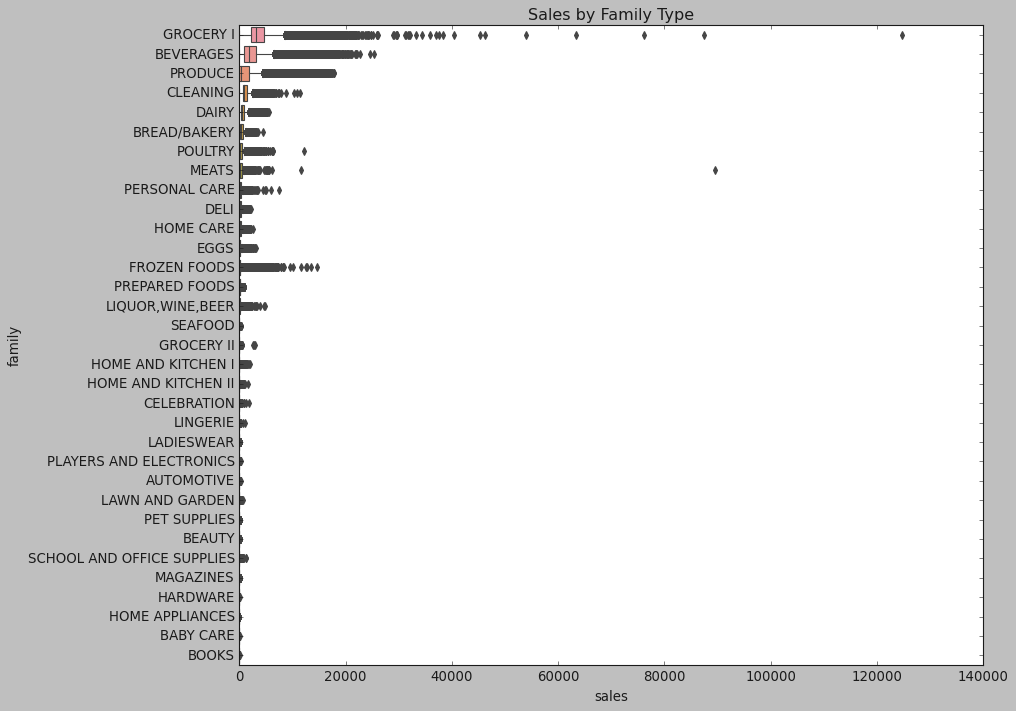

In [120]:
# Calculate mean sales by family type
mean_sales_by_family = df_train.groupby('family')['sales'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a horizontal boxplot of sales by family type
sns.boxplot(y="family", x="sales", data=df_train, orient="horizontal", order=mean_sales_by_family.index)

# Add a title
plt.title("Sales by Family Type")

# Show the plot
plt.show()

<b> It is also evident from the boxplot that there are significant differences in sales between family types.</b>

<b>The boxplot shows each product family, where the x-axis shows the product family and the y-axis shows the sales.</b> 

1. From the box plot we can see the median, quartiles, and the outliers for each product family. 
2. This visualization helps us understand how the sales are distributed across different product families and identify any potential outliers or trends.
3. As can be seen, GROCERY 1 had the highest number of outliers and MEATS had one outlier too far from the other distributions.

### 6.	Data Cleaning, Data Transformation and Feature Engineering: 
- Once initial analysis is completed, identify issues with the data that need to be addressed then clean the data, dealing with missing values, and correcting any inconsistencies in the data.
- Perform Data Transformation and Feature Engineering where necessary

#### Looking again at the Datasets

In [121]:
df_train.head()

date  id  store_nbr      family  sales  onpromotion
0 2013-01-01   0          1  AUTOMOTIVE    0.0            0
1 2013-01-01   1          1   BABY CARE    0.0            0
2 2013-01-01   2          1      BEAUTY    0.0            0
3 2013-01-01   3          1   BEVERAGES    0.0            0
4 2013-01-01   4          1       BOOKS    0.0            0

In [122]:
df_train.dtypes

date           datetime64[ns]
id                      int64
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [123]:
df_test.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

In [124]:
df_test.dtypes

id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object

In [125]:
df_holidays.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [126]:
df_holidays.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [127]:
# Change the column 'type' to 'hol_type'
df_holidays = df_holidays.rename(columns={'type': 'hol_type'})
df_holidays.head()

date hol_type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [128]:
df_stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [129]:
# Change the column 'type' to 'store_type'
df_stores = df_stores.rename(columns={'type': 'store_type'})
df_stores.head()

store_nbr           city                           state store_type  \
0          1          Quito                       Pichincha          D   
1          2          Quito                       Pichincha          D   
2          3          Quito                       Pichincha          D   
3          4          Quito                       Pichincha          D   
4          5  Santo Domingo  Santo Domingo de los Tsachilas          D   

   cluster  
0       13  
1       13  
2        8  
3        9  
4        4

In [130]:
df_oil.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

In [131]:
df_transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

#### Check for missing values in all the datasets:

In [132]:
# Check for missing values in df_train
df_train.isnull().sum()

date           0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [133]:
# Check for missing values in df_test
df_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [134]:
# Check for missing values in df_holidays
df_holidays.isnull().sum()

date           0
hol_type       0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [135]:
# Check for missing values in df_stores
df_stores.isnull().sum()

store_nbr     0
city          0
state         0
store_type    0
cluster       0
dtype: int64

In [136]:
# Check for missing values in df_oil
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [137]:
# Check for missing values in df_transactions
df_transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

### Convert 'date' columns from 'object'  to 'datetime' type in all dataframes with date column:

In [138]:
df_train['date']=pd.to_datetime(df_train['date'])
df_test['date']=pd.to_datetime(df_test['date'])
df_transactions['date']=pd.to_datetime(df_transactions['date'])
df_holidays['date']=pd.to_datetime(df_holidays['date'])
df_oil['date']=pd.to_datetime(df_oil['date'])

### Holidays Dataset:
- Remove rows that have 'transferred' values as True and keep the columns: 'date','hol_type','locale','locale_name'

In [139]:
holidays = df_holidays.loc[(df_holidays['transferred']==False)][['date','hol_type','locale','locale_name']]

#### Creates two new columns in the 'holidays' DataFrame named hol_city', the city that has holiday and 'hol_state', state that has holiday.
- The first line of code creates the hol_city column using NumPy's 'where' function. It determines whether the value in the locale column is the string "Local." If it is, the value in the locale name column for that row is assigned to the hol_city column. Otherwise, np.nan (which stands for "Not a Number") is assigned to that row's hol_city column.
- The next line does the same for hol_state.

In [140]:
holidays['hol_city']=np.where(holidays['locale']=='Local',holidays['locale_name'],np.nan)
holidays['hol_state']=np.where(holidays['locale']=='Regional',holidays['locale_name'],np.nan)

#### Group the dates so that each holiday has its own date.

In [141]:
holidays.loc[holidays['hol_city'].isnull()==False].groupby('date').agg(np.array)

hol_type          locale    locale_name       hol_city  \
date                                                                            
2012-03-02            [Holiday]         [Local]        [Manta]        [Manta]   
2012-04-12            [Holiday]         [Local]       [Cuenca]       [Cuenca]   
2012-04-14            [Holiday]         [Local]     [Libertad]     [Libertad]   
2012-04-21            [Holiday]         [Local]     [Riobamba]     [Riobamba]   
2012-05-12            [Holiday]         [Local]         [Puyo]         [Puyo]   
...                         ...             ...            ...            ...   
2017-11-11            [Holiday]         [Local]    [Latacunga]    [Latacunga]   
2017-11-12            [Holiday]         [Local]       [Ambato]       [Ambato]   
2017-12-05         [Additional]         [Local]        [Quito]        [Quito]   
2017-12-08  [Holiday, Transfer]  [Local, Local]  [Loja, Quito]  [Loja, Quito]   
2017-12-22            [Holiday]         [Local]      [Salinas]      [Salinas]   

             hol_state  
date                    
2012-03-02       [nan]  
2012-04-12       [nan]  
2012-04-14       [nan]  
2012-04-21       [nan]  
2012-05-12       [nan]  
...                ...  
2017-11-11       [nan]  
2017-11-12       [nan]  
2017-12-05       [nan]  
2017-12-08  [nan, nan]  
2017-12-22       [nan]  

[134 rows x 5 columns]

In [142]:
holidays.head()

date hol_type    locale locale_name  hol_city hol_state
0 2012-03-02  Holiday     Local       Manta     Manta       NaN
1 2012-04-01  Holiday  Regional    Cotopaxi       NaN  Cotopaxi
2 2012-04-12  Holiday     Local      Cuenca    Cuenca       NaN
3 2012-04-14  Holiday     Local    Libertad  Libertad       NaN
4 2012-04-21  Holiday     Local    Riobamba  Riobamba       NaN

### Oil Dataset:
- Create oil data for each day of the period

    1. Using the pd.date range() function, the code below generates a DataFrame called oil dates with dates ranging from January 1, 2013 to August 31, 2017. It then generates an oil price NumPy array of zeros with the same length as oil dates.
    2. The for loop iterates through each element of oil price. If the date in oil dates is earlier than the next date in the DataFrame df oil's date column, the value of the dcoilwtico column in the current row of df oil is assigned to the corresponding element of oil price. Otherwise, the loop is broken if oil index reaches the end of df oil. If neither of these conditions is met, the oil index is increased, and the dcoilwtico value of the next row in df oil is assigned to the corresponding element of oil price.
    3. Finally, the oil_price array is added as a new column to the oil_dates DataFrame, and missing values are backfilled using the fillna() method with method='backfill'.

In [143]:
oil_dates=pd.DataFrame(pd.date_range(start='2013-01-01', end='2017-08-31', name='date'))
oil_price=np.zeros(len(oil_dates))
oil_index=0
for i in range(len(oil_price)):
    if oil_dates.iloc[i][0]<df_oil.iloc[oil_index+1]['date'] :
        oil_price[i]=df_oil.iloc[oil_index]['dcoilwtico']
    elif oil_index==len(df_oil)-1: break
    else: 
        oil_index+=1
        oil_price[i]=df_oil.iloc[oil_index]['dcoilwtico']
oil_dates['oil_price']=oil_price

# Back Fill NA values 

oil_dates.fillna(method='backfill',inplace=True)
oil_dates

date  oil_price
0    2013-01-01      93.14
1    2013-01-02      93.14
2    2013-01-03      92.97
3    2013-01-04      93.12
4    2013-01-05      93.12
...         ...        ...
1699 2017-08-27      47.65
1700 2017-08-28      46.40
1701 2017-08-29      46.46
1702 2017-08-30      45.96
1703 2017-08-31      47.26

[1704 rows x 2 columns]

### Joining the datasets:


### df_train Dataset
1. First, we join the df_train and df_stores dataframes on the store_nbr column to form the train_stores dataframe.

2. Second we join the train_stores and oil_dates dataframes on the 'date' column to form a new dataframe called df_joined_train.

3. Third, we combine the df_joined_train dataframe with a new dataframe created from the holidays dataframe. 


- The holidays dataframe is first grouped by the date column, and the resulting groups are aggregated by concatenating the values in each column separated by a space using the join method. Each unique date value in the original holidays dataframe is represented by a single row in the resulting dataframe. 
- The merged dataframe is then referred to as <b>df_joined_train</b> once more.

In [144]:
train_stores=pd.merge(df_train,df_stores, left_on='store_nbr',right_on='store_nbr', how='left')
df_joined_train=pd.merge(train_stores,oil_dates, left_on=['date'],right_on=['date'], how='left')

df_joined_train=pd.merge(df_joined_train,holidays[['date','hol_type','locale','locale_name',
                                                'hol_city','hol_state']].groupby('date').agg( ' '.join), 
                         left_on=['date'],right_on=['date'], how='left')

In [145]:
df_joined_train

date       id  store_nbr                      family     sales  \
0       2013-01-01        0          1                  AUTOMOTIVE     0.000   
1       2013-01-01        1          1                   BABY CARE     0.000   
2       2013-01-01        2          1                      BEAUTY     0.000   
3       2013-01-01        3          1                   BEVERAGES     0.000   
4       2013-01-01        4          1                       BOOKS     0.000   
...            ...      ...        ...                         ...       ...   
3000883 2017-08-15  3000883          9                     POULTRY   438.133   
3000884 2017-08-15  3000884          9              PREPARED FOODS   154.553   
3000885 2017-08-15  3000885          9                     PRODUCE  2419.729   
3000886 2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887 2017-08-15  3000887          9                     SEAFOOD    16.000   

         onpromotion   city      state store_type  cluster  oil_price  \
0                  0  Quito  Pichincha          D       13      93.14   
1                  0  Quito  Pichincha          D       13      93.14   
2                  0  Quito  Pichincha          D       13      93.14   
3                  0  Quito  Pichincha          D       13      93.14   
4                  0  Quito  Pichincha          D       13      93.14   
...              ...    ...        ...        ...      ...        ...   
3000883            0  Quito  Pichincha          B        6      47.57   
3000884            1  Quito  Pichincha          B        6      47.57   
3000885          148  Quito  Pichincha          B        6      47.57   
3000886            8  Quito  Pichincha          B        6      47.57   
3000887            0  Quito  Pichincha          B        6      47.57   

        hol_type    locale locale_name  
0        Holiday  National     Ecuador  
1        Holiday  National     Ecuador  
2        Holiday  National     Ecuador  
3        Holiday  National     Ecuador  
4        Holiday  National     Ecuador  
...          ...       ...         ...  
3000883  Holiday     Local    Riobamba  
3000884  Holiday     Local    Riobamba  
3000885  Holiday     Local    Riobamba  
3000886  Holiday     Local    Riobamba  
3000887  Holiday     Local    Riobamba  

[3000888 rows x 14 columns]

### df_test Dataset
We follow the same procedure as we did above so that we finally have <b> df_joined_test</b> dataset

In [146]:
test_stores=pd.merge(df_test,df_stores, left_on='store_nbr',right_on='store_nbr', how='left')
df_joined_test=pd.merge(test_stores,oil_dates, left_on=['date'],right_on=['date'], how='left')

df_joined_test=pd.merge(df_joined_test,holidays[['date','hol_type','locale','locale_name',
                                                 'hol_city','hol_state']].groupby('date').agg( ' '.join), 
                        left_on=['date'],right_on=['date'], how='left')

In [147]:
df_joined_test

id       date  store_nbr                      family  onpromotion  \
0      3000888 2017-08-16          1                  AUTOMOTIVE            0   
1      3000889 2017-08-16          1                   BABY CARE            0   
2      3000890 2017-08-16          1                      BEAUTY            2   
3      3000891 2017-08-16          1                   BEVERAGES           20   
4      3000892 2017-08-16          1                       BOOKS            0   
...        ...        ...        ...                         ...          ...   
28507  3029395 2017-08-31          9                     POULTRY            1   
28508  3029396 2017-08-31          9              PREPARED FOODS            0   
28509  3029397 2017-08-31          9                     PRODUCE            1   
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9   
28511  3029399 2017-08-31          9                     SEAFOOD            0   

        city      state store_type  cluster  oil_price hol_type locale  \
0      Quito  Pichincha          D       13      46.80      NaN    NaN   
1      Quito  Pichincha          D       13      46.80      NaN    NaN   
2      Quito  Pichincha          D       13      46.80      NaN    NaN   
3      Quito  Pichincha          D       13      46.80      NaN    NaN   
4      Quito  Pichincha          D       13      46.80      NaN    NaN   
...      ...        ...        ...      ...        ...      ...    ...   
28507  Quito  Pichincha          B        6      47.26      NaN    NaN   
28508  Quito  Pichincha          B        6      47.26      NaN    NaN   
28509  Quito  Pichincha          B        6      47.26      NaN    NaN   
28510  Quito  Pichincha          B        6      47.26      NaN    NaN   
28511  Quito  Pichincha          B        6      47.26      NaN    NaN   

      locale_name  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
28507         NaN  
28508         NaN  
28509         NaN  
28510         NaN  
28511         NaN  

[28512 rows x 13 columns]

### Create a new column to test for presence of holiday:

The probe function takes a DataFrame row as input and returns 1 if the row contains a holiday and 0 otherwise.

<b>The function determines whether any of the following conditions are met:</b>

1. The string "National" appears in the row's locale column.
2. The string in the city column is contained in the row's locale name column.
3. The string in the state column is contained in the row's locale name column.

The function then returns 1 if any of the conditions are satisfied, and 0 otherwise.

  - Using the apply method, the function is applied to two DataFrames, df_joined_train and df_joined_test. 
  - This adds a new column called "check_if_hol" to each DataFrame, which contains 1 if the corresponding row is a holiday.

In [148]:
def probe(row):
    if "National" in str(row['locale']) or str(row['city']) in str(row['locale_name']) or str(row['state']) in str(row['locale_name']):
        return 1
    else: 
        return 0
df_joined_train['check_if_hol'] = df_joined_train.apply(probe,axis=1)
df_joined_test['check_if_hol'] = df_joined_test.apply(probe,axis=1)

In [149]:
df_joined_train.head()

date  id  store_nbr      family  sales  onpromotion   city      state  \
0 2013-01-01   0          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1 2013-01-01   1          1   BABY CARE    0.0            0  Quito  Pichincha   
2 2013-01-01   2          1      BEAUTY    0.0            0  Quito  Pichincha   
3 2013-01-01   3          1   BEVERAGES    0.0            0  Quito  Pichincha   
4 2013-01-01   4          1       BOOKS    0.0            0  Quito  Pichincha   

  store_type  cluster  oil_price hol_type    locale locale_name  check_if_hol  
0          D       13      93.14  Holiday  National     Ecuador             1  
1          D       13      93.14  Holiday  National     Ecuador             1  
2          D       13      93.14  Holiday  National     Ecuador             1  
3          D       13      93.14  Holiday  National     Ecuador             1  
4          D       13      93.14  Holiday  National     Ecuador             1

In [150]:
df_joined_test.head()

id       date  store_nbr      family  onpromotion   city      state  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0  Quito  Pichincha   
1  3000889 2017-08-16          1   BABY CARE            0  Quito  Pichincha   
2  3000890 2017-08-16          1      BEAUTY            2  Quito  Pichincha   
3  3000891 2017-08-16          1   BEVERAGES           20  Quito  Pichincha   
4  3000892 2017-08-16          1       BOOKS            0  Quito  Pichincha   

  store_type  cluster  oil_price hol_type locale locale_name  check_if_hol  
0          D       13       46.8      NaN    NaN         NaN             0  
1          D       13       46.8      NaN    NaN         NaN             0  
2          D       13       46.8      NaN    NaN         NaN             0  
3          D       13       46.8      NaN    NaN         NaN             0  
4          D       13       46.8      NaN    NaN         NaN             0

### Add Pay dates or Salary dates as new column and 3 more columns in both df_joined_train and df_joined_test datasets:
For the train dataset:

1. df_joined_train['month'] extracts the month from the date and adds it to a new column named 'month'
2. df_joined_train['day'] extracts the day from the date and adds it to a new column named 'day'
3. df_joined_train['year'] extracts the year from the date and adds it to a new column named 'year'
4. df_joined_train['if_pay_day'] checks if the date is a pay day, which is defined as either the 15th of the month or the last day of the month. If the date is a pay day, the value in the 'if_pay_day' column is set to 1. Otherwise, it is set to 0.

The same is repeated for the df_test dataset.

In [151]:
# For train dataset 
df_joined_train['month']=df_joined_train['date'].dt.month
df_joined_train['day']=df_joined_train['date'].dt.day
df_joined_train['year']=df_joined_train['date'].dt.year

df_joined_train['if_pay_day']=df_joined_train['date'].apply(lambda x: 1 if (x.is_month_end==True or x.date().day==15) else 0)

# For test dataset 
df_joined_test['month']=df_joined_test['date'].dt.month
df_joined_test['day']=df_joined_test['date'].dt.day
df_joined_test['year']=df_joined_test['date'].dt.year

df_joined_test['if_pay_day']=df_joined_test['date'].apply(lambda x: 1 if (x.is_month_end==True or x.date().day==15) else 0)

In [152]:
df_joined_train

date       id  store_nbr                      family     sales  \
0       2013-01-01        0          1                  AUTOMOTIVE     0.000   
1       2013-01-01        1          1                   BABY CARE     0.000   
2       2013-01-01        2          1                      BEAUTY     0.000   
3       2013-01-01        3          1                   BEVERAGES     0.000   
4       2013-01-01        4          1                       BOOKS     0.000   
...            ...      ...        ...                         ...       ...   
3000883 2017-08-15  3000883          9                     POULTRY   438.133   
3000884 2017-08-15  3000884          9              PREPARED FOODS   154.553   
3000885 2017-08-15  3000885          9                     PRODUCE  2419.729   
3000886 2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887 2017-08-15  3000887          9                     SEAFOOD    16.000   

         onpromotion   city      state store_type  cluster  oil_price  \
0                  0  Quito  Pichincha          D       13      93.14   
1                  0  Quito  Pichincha          D       13      93.14   
2                  0  Quito  Pichincha          D       13      93.14   
3                  0  Quito  Pichincha          D       13      93.14   
4                  0  Quito  Pichincha          D       13      93.14   
...              ...    ...        ...        ...      ...        ...   
3000883            0  Quito  Pichincha          B        6      47.57   
3000884            1  Quito  Pichincha          B        6      47.57   
3000885          148  Quito  Pichincha          B        6      47.57   
3000886            8  Quito  Pichincha          B        6      47.57   
3000887            0  Quito  Pichincha          B        6      47.57   

        hol_type    locale locale_name  check_if_hol  month  day  year  \
0        Holiday  National     Ecuador             1      1    1  2013   
1        Holiday  National     Ecuador             1      1    1  2013   
2        Holiday  National     Ecuador             1      1    1  2013   
3        Holiday  National     Ecuador             1      1    1  2013   
4        Holiday  National     Ecuador             1      1    1  2013   
...          ...       ...         ...           ...    ...  ...   ...   
3000883  Holiday     Local    Riobamba             0      8   15  2017   
3000884  Holiday     Local    Riobamba             0      8   15  2017   
3000885  Holiday     Local    Riobamba             0      8   15  2017   
3000886  Holiday     Local    Riobamba             0      8   15  2017   
3000887  Holiday     Local    Riobamba             0      8   15  2017   

         if_pay_day  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
3000883           1  
3000884           1  
3000885           1  
3000886           1  
3000887           1  

[3000888 rows x 19 columns]

In [153]:
# Check for missing values in df_joined_train
df_joined_train.isnull().sum()

date                  0
id                    0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
store_type            0
cluster               0
oil_price             0
hol_type        2567862
locale          2567862
locale_name     2567862
check_if_hol          0
month                 0
day                   0
year                  0
if_pay_day            0
dtype: int64

In [154]:
df_joined_train.dtypes

date            datetime64[ns]
id                       int64
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
city                    object
state                   object
store_type              object
cluster                  int64
oil_price              float64
hol_type                object
locale                  object
locale_name             object
check_if_hol             int64
month                    int64
day                      int64
year                     int64
if_pay_day               int64
dtype: object

In [155]:
df_joined_test

id       date  store_nbr                      family  onpromotion  \
0      3000888 2017-08-16          1                  AUTOMOTIVE            0   
1      3000889 2017-08-16          1                   BABY CARE            0   
2      3000890 2017-08-16          1                      BEAUTY            2   
3      3000891 2017-08-16          1                   BEVERAGES           20   
4      3000892 2017-08-16          1                       BOOKS            0   
...        ...        ...        ...                         ...          ...   
28507  3029395 2017-08-31          9                     POULTRY            1   
28508  3029396 2017-08-31          9              PREPARED FOODS            0   
28509  3029397 2017-08-31          9                     PRODUCE            1   
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9   
28511  3029399 2017-08-31          9                     SEAFOOD            0   

        city      state store_type  cluster  oil_price hol_type locale  \
0      Quito  Pichincha          D       13      46.80      NaN    NaN   
1      Quito  Pichincha          D       13      46.80      NaN    NaN   
2      Quito  Pichincha          D       13      46.80      NaN    NaN   
3      Quito  Pichincha          D       13      46.80      NaN    NaN   
4      Quito  Pichincha          D       13      46.80      NaN    NaN   
...      ...        ...        ...      ...        ...      ...    ...   
28507  Quito  Pichincha          B        6      47.26      NaN    NaN   
28508  Quito  Pichincha          B        6      47.26      NaN    NaN   
28509  Quito  Pichincha          B        6      47.26      NaN    NaN   
28510  Quito  Pichincha          B        6      47.26      NaN    NaN   
28511  Quito  Pichincha          B        6      47.26      NaN    NaN   

      locale_name  check_if_hol  month  day  year  if_pay_day  
0             NaN             0      8   16  2017           0  
1             NaN             0      8   16  2017           0  
2             NaN             0      8   16  2017           0  
3             NaN             0      8   16  2017           0  
4             NaN             0      8   16  2017           0  
...           ...           ...    ...  ...   ...         ...  
28507         NaN             0      8   31  2017           1  
28508         NaN             0      8   31  2017           1  
28509         NaN             0      8   31  2017           1  
28510         NaN             0      8   31  2017           1  
28511         NaN             0      8   31  2017           1  

[28512 rows x 18 columns]

In [156]:
# Check for missing values in df_joined_test
df_joined_test.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
store_type          0
cluster             0
oil_price           0
hol_type        26730
locale          26730
locale_name     26730
check_if_hol        0
month               0
day                 0
year                0
if_pay_day          0
dtype: int64

In [157]:
df_joined_test.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
onpromotion              int64
city                    object
state                   object
store_type              object
cluster                  int64
oil_price              float64
hol_type                object
locale                  object
locale_name             object
check_if_hol             int64
month                    int64
day                      int64
year                     int64
if_pay_day               int64
dtype: object

In [158]:
df_transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [159]:
# Join df_joined_train with df_transactions
df_joined_train = pd.merge(df_joined_train, df_transactions, how='left', on=['store_nbr', 'date'])

# Join df_joined_test with df_transactions
df_joined_test = pd.merge(df_joined_test, df_transactions, how='left', on=['store_nbr', 'date'])

In [160]:
df_joined_train

date       id  store_nbr                      family     sales  \
0       2013-01-01        0          1                  AUTOMOTIVE     0.000   
1       2013-01-01        1          1                   BABY CARE     0.000   
2       2013-01-01        2          1                      BEAUTY     0.000   
3       2013-01-01        3          1                   BEVERAGES     0.000   
4       2013-01-01        4          1                       BOOKS     0.000   
...            ...      ...        ...                         ...       ...   
3000883 2017-08-15  3000883          9                     POULTRY   438.133   
3000884 2017-08-15  3000884          9              PREPARED FOODS   154.553   
3000885 2017-08-15  3000885          9                     PRODUCE  2419.729   
3000886 2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887 2017-08-15  3000887          9                     SEAFOOD    16.000   

         onpromotion   city      state store_type  cluster  oil_price  \
0                  0  Quito  Pichincha          D       13      93.14   
1                  0  Quito  Pichincha          D       13      93.14   
2                  0  Quito  Pichincha          D       13      93.14   
3                  0  Quito  Pichincha          D       13      93.14   
4                  0  Quito  Pichincha          D       13      93.14   
...              ...    ...        ...        ...      ...        ...   
3000883            0  Quito  Pichincha          B        6      47.57   
3000884            1  Quito  Pichincha          B        6      47.57   
3000885          148  Quito  Pichincha          B        6      47.57   
3000886            8  Quito  Pichincha          B        6      47.57   
3000887            0  Quito  Pichincha          B        6      47.57   

        hol_type    locale locale_name  check_if_hol  month  day  year  \
0        Holiday  National     Ecuador             1      1    1  2013   
1        Holiday  National     Ecuador             1      1    1  2013   
2        Holiday  National     Ecuador             1      1    1  2013   
3        Holiday  National     Ecuador             1      1    1  2013   
4        Holiday  National     Ecuador             1      1    1  2013   
...          ...       ...         ...           ...    ...  ...   ...   
3000883  Holiday     Local    Riobamba             0      8   15  2017   
3000884  Holiday     Local    Riobamba             0      8   15  2017   
3000885  Holiday     Local    Riobamba             0      8   15  2017   
3000886  Holiday     Local    Riobamba             0      8   15  2017   
3000887  Holiday     Local    Riobamba             0      8   15  2017   

         if_pay_day  transactions  
0                 0           NaN  
1                 0           NaN  
2                 0           NaN  
3                 0           NaN  
4                 0           NaN  
...             ...           ...  
3000883           1        2155.0  
3000884           1        2155.0  
3000885           1        2155.0  
3000886           1        2155.0  
3000887           1        2155.0  

[3000888 rows x 20 columns]

In [161]:
df_joined_test

id       date  store_nbr                      family  onpromotion  \
0      3000888 2017-08-16          1                  AUTOMOTIVE            0   
1      3000889 2017-08-16          1                   BABY CARE            0   
2      3000890 2017-08-16          1                      BEAUTY            2   
3      3000891 2017-08-16          1                   BEVERAGES           20   
4      3000892 2017-08-16          1                       BOOKS            0   
...        ...        ...        ...                         ...          ...   
28507  3029395 2017-08-31          9                     POULTRY            1   
28508  3029396 2017-08-31          9              PREPARED FOODS            0   
28509  3029397 2017-08-31          9                     PRODUCE            1   
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9   
28511  3029399 2017-08-31          9                     SEAFOOD            0   

        city      state store_type  cluster  oil_price hol_type locale  \
0      Quito  Pichincha          D       13      46.80      NaN    NaN   
1      Quito  Pichincha          D       13      46.80      NaN    NaN   
2      Quito  Pichincha          D       13      46.80      NaN    NaN   
3      Quito  Pichincha          D       13      46.80      NaN    NaN   
4      Quito  Pichincha          D       13      46.80      NaN    NaN   
...      ...        ...        ...      ...        ...      ...    ...   
28507  Quito  Pichincha          B        6      47.26      NaN    NaN   
28508  Quito  Pichincha          B        6      47.26      NaN    NaN   
28509  Quito  Pichincha          B        6      47.26      NaN    NaN   
28510  Quito  Pichincha          B        6      47.26      NaN    NaN   
28511  Quito  Pichincha          B        6      47.26      NaN    NaN   

      locale_name  check_if_hol  month  day  year  if_pay_day  transactions  
0             NaN             0      8   16  2017           0           NaN  
1             NaN             0      8   16  2017           0           NaN  
2             NaN             0      8   16  2017           0           NaN  
3             NaN             0      8   16  2017           0           NaN  
4             NaN             0      8   16  2017           0           NaN  
...           ...           ...    ...  ...   ...         ...           ...  
28507         NaN             0      8   31  2017           1           NaN  
28508         NaN             0      8   31  2017           1           NaN  
28509         NaN             0      8   31  2017           1           NaN  
28510         NaN             0      8   31  2017           1           NaN  
28511         NaN             0      8   31  2017           1           NaN  

[28512 rows x 19 columns]

In [162]:
# Check for missing values in df_joined_train
df_joined_train.isnull().sum()

date                  0
id                    0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
store_type            0
cluster               0
oil_price             0
hol_type        2567862
locale          2567862
locale_name     2567862
check_if_hol          0
month                 0
day                   0
year                  0
if_pay_day            0
transactions     245784
dtype: int64

In [163]:
# Check for missing values in df_joined_test
df_joined_test.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
store_type          0
cluster             0
oil_price           0
hol_type        26730
locale          26730
locale_name     26730
check_if_hol        0
month               0
day                 0
year                0
if_pay_day          0
transactions    28512
dtype: int64

### Create 2 new columns in df_transactions and a new dataset called transactions_median

In [164]:
df_transactions['year'] = df_transactions['date'].dt.year
df_transactions['month'] = df_transactions['date'].dt.month
transactions_median = df_transactions.groupby(['store_nbr', 'year', 'month'], as_index=False).median()
transactions_median = transactions_median.rename(columns = {'transactions':'trans_median'})
transactions_median

store_nbr  year  month  trans_median
0             1  2013      1        1766.0
1             1  2013      2        1758.0
2             1  2013      3        1728.0
3             1  2013      4        1730.0
4             1  2013      5        1753.0
...         ...   ...    ...           ...
2796         54  2017      4         794.0
2797         54  2017      5         834.0
2798         54  2017      6         768.5
2799         54  2017      7         782.0
2800         54  2017      8         802.0

[2801 rows x 4 columns]

### Replace missing values in transactions column in df_joined_train with median values

In [165]:
df_joined_train = pd.merge(df_joined_train, transactions_median, how='left', on=['store_nbr', 'year', 'month'])
df_joined_train['transactions'].fillna(df_joined_train['trans_median'], inplace=True)
df_joined_train.drop('trans_median', axis=1, inplace=True)

In [166]:
df_joined_train

date       id  store_nbr                      family     sales  \
0       2013-01-01        0          1                  AUTOMOTIVE     0.000   
1       2013-01-01        1          1                   BABY CARE     0.000   
2       2013-01-01        2          1                      BEAUTY     0.000   
3       2013-01-01        3          1                   BEVERAGES     0.000   
4       2013-01-01        4          1                       BOOKS     0.000   
...            ...      ...        ...                         ...       ...   
3000883 2017-08-15  3000883          9                     POULTRY   438.133   
3000884 2017-08-15  3000884          9              PREPARED FOODS   154.553   
3000885 2017-08-15  3000885          9                     PRODUCE  2419.729   
3000886 2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887 2017-08-15  3000887          9                     SEAFOOD    16.000   

         onpromotion   city      state store_type  cluster  oil_price  \
0                  0  Quito  Pichincha          D       13      93.14   
1                  0  Quito  Pichincha          D       13      93.14   
2                  0  Quito  Pichincha          D       13      93.14   
3                  0  Quito  Pichincha          D       13      93.14   
4                  0  Quito  Pichincha          D       13      93.14   
...              ...    ...        ...        ...      ...        ...   
3000883            0  Quito  Pichincha          B        6      47.57   
3000884            1  Quito  Pichincha          B        6      47.57   
3000885          148  Quito  Pichincha          B        6      47.57   
3000886            8  Quito  Pichincha          B        6      47.57   
3000887            0  Quito  Pichincha          B        6      47.57   

        hol_type    locale locale_name  check_if_hol  month  day  year  \
0        Holiday  National     Ecuador             1      1    1  2013   
1        Holiday  National     Ecuador             1      1    1  2013   
2        Holiday  National     Ecuador             1      1    1  2013   
3        Holiday  National     Ecuador             1      1    1  2013   
4        Holiday  National     Ecuador             1      1    1  2013   
...          ...       ...         ...           ...    ...  ...   ...   
3000883  Holiday     Local    Riobamba             0      8   15  2017   
3000884  Holiday     Local    Riobamba             0      8   15  2017   
3000885  Holiday     Local    Riobamba             0      8   15  2017   
3000886  Holiday     Local    Riobamba             0      8   15  2017   
3000887  Holiday     Local    Riobamba             0      8   15  2017   

         if_pay_day  transactions  
0                 0        1766.0  
1                 0        1766.0  
2                 0        1766.0  
3                 0        1766.0  
4                 0        1766.0  
...             ...           ...  
3000883           1        2155.0  
3000884           1        2155.0  
3000885           1        2155.0  
3000886           1        2155.0  
3000887           1        2155.0  

[3000888 rows x 20 columns]

In [167]:
# Check for missing values in df_joined_test
df_joined_train.isnull().sum()

date                  0
id                    0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
store_type            0
cluster               0
oil_price             0
hol_type        2567862
locale          2567862
locale_name     2567862
check_if_hol          0
month                 0
day                   0
year                  0
if_pay_day            0
transactions     223047
dtype: int64

### Replace missing values in transactions column in df_joined_test with median values

In [168]:
df_joined_test = pd.merge(df_joined_test, transactions_median, how='left', on=['store_nbr', 'year', 'month'])
df_joined_test['transactions'].fillna(df_joined_test['trans_median'], inplace=True)
df_joined_test.drop('trans_median', axis=1, inplace=True)

In [169]:
df_joined_test

id       date  store_nbr                      family  onpromotion  \
0      3000888 2017-08-16          1                  AUTOMOTIVE            0   
1      3000889 2017-08-16          1                   BABY CARE            0   
2      3000890 2017-08-16          1                      BEAUTY            2   
3      3000891 2017-08-16          1                   BEVERAGES           20   
4      3000892 2017-08-16          1                       BOOKS            0   
...        ...        ...        ...                         ...          ...   
28507  3029395 2017-08-31          9                     POULTRY            1   
28508  3029396 2017-08-31          9              PREPARED FOODS            0   
28509  3029397 2017-08-31          9                     PRODUCE            1   
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9   
28511  3029399 2017-08-31          9                     SEAFOOD            0   

        city      state store_type  cluster  oil_price hol_type locale  \
0      Quito  Pichincha          D       13      46.80      NaN    NaN   
1      Quito  Pichincha          D       13      46.80      NaN    NaN   
2      Quito  Pichincha          D       13      46.80      NaN    NaN   
3      Quito  Pichincha          D       13      46.80      NaN    NaN   
4      Quito  Pichincha          D       13      46.80      NaN    NaN   
...      ...        ...        ...      ...        ...      ...    ...   
28507  Quito  Pichincha          B        6      47.26      NaN    NaN   
28508  Quito  Pichincha          B        6      47.26      NaN    NaN   
28509  Quito  Pichincha          B        6      47.26      NaN    NaN   
28510  Quito  Pichincha          B        6      47.26      NaN    NaN   
28511  Quito  Pichincha          B        6      47.26      NaN    NaN   

      locale_name  check_if_hol  month  day  year  if_pay_day  transactions  
0             NaN             0      8   16  2017           0        1726.0  
1             NaN             0      8   16  2017           0        1726.0  
2             NaN             0      8   16  2017           0        1726.0  
3             NaN             0      8   16  2017           0        1726.0  
4             NaN             0      8   16  2017           0        1726.0  
...           ...           ...    ...  ...   ...         ...           ...  
28507         NaN             0      8   31  2017           1        2027.0  
28508         NaN             0      8   31  2017           1        2027.0  
28509         NaN             0      8   31  2017           1        2027.0  
28510         NaN             0      8   31  2017           1        2027.0  
28511         NaN             0      8   31  2017           1        2027.0  

[28512 rows x 19 columns]

In [170]:
df_joined_test.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
store_type          0
cluster             0
oil_price           0
hol_type        26730
locale          26730
locale_name     26730
check_if_hol        0
month               0
day                 0
year                0
if_pay_day          0
transactions        0
dtype: int64

#### We shall backfill the missing values in the 'transactions' column by using the fillna method of Pandas dataframe with the method parameter set to 'bfill' (for backward fill).

In [171]:
df_joined_train['transactions'] = df_joined_train['transactions'].fillna(method='bfill')

In [172]:
# Check for missing values in df_joined_train
df_joined_train.isnull().sum()

date                  0
id                    0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
store_type            0
cluster               0
oil_price             0
hol_type        2567862
locale          2567862
locale_name     2567862
check_if_hol          0
month                 0
day                   0
year                  0
if_pay_day            0
transactions          0
dtype: int64

#### Drop columns 'hol_type',	'locale',	and 'locale_name' from both df_joined_train and df_joined_test datasets:	

In [173]:
df_joined_train.drop(['hol_type', 'locale', 'locale_name','id'], axis=1, inplace=True)

In [174]:
df_joined_train.dtypes

date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
city                    object
state                   object
store_type              object
cluster                  int64
oil_price              float64
check_if_hol             int64
month                    int64
day                      int64
year                     int64
if_pay_day               int64
transactions           float64
dtype: object

In [175]:
df_joined_test.drop(['hol_type', 'locale', 'locale_name','id'], axis=1, inplace=True)

In [176]:
df_joined_test.dtypes

date            datetime64[ns]
store_nbr                int64
family                  object
onpromotion              int64
city                    object
state                   object
store_type              object
cluster                  int64
oil_price              float64
check_if_hol             int64
month                    int64
day                      int64
year                     int64
if_pay_day               int64
transactions           float64
dtype: object

In [177]:
#Create a copy of df_joined_trained for use on static models

df_joined_train_stat=df_joined_train.copy()

#Create a copy of df_joined_test for use on static models

df_joined_test_stat=df_joined_test.copy()

#Set the date as an index
df_joined_train_stat.set_index("date",inplace=True)
df_joined_test_stat.set_index("date",inplace=True)

To be used on static models

### Testing for Stationarity in df_joined_train:
To test for stationarity in df_joined_train, we use the Augmented Dickey-Fuller (ADF) test, which is available in the statsmodels library.

In [178]:
data=df_joined_train_stat['sales']
data.head()

date
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
Name: sales, dtype: float64

In [179]:
# result = adfuller(data) 

# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))


In [180]:
# Compute rolling statistics for sales
window = 365  # Set the rolling window size to 365 days
rolling_mean = df_joined_train['sales'].rolling(window=window).mean()
rolling_std = df_joined_train['sales'].rolling(window=window).std()

In [181]:
print('Rolling mean',rolling_mean)
print('Rolling std',rolling_std)

Rolling mean 0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
              ...    
3000883    499.468759
3000884    499.851096
3000885    504.643014
3000886    504.753737
3000887    500.855622
Name: sales, Length: 3000888, dtype: float64
Rolling std 0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
3000883    1163.536231
3000884    1163.399518
3000885    1167.699202
3000886    1167.660797
3000887    1166.908687
Name: sales, Length: 3000888, dtype: float64


### Visualize the Rolling mean and standard deviation

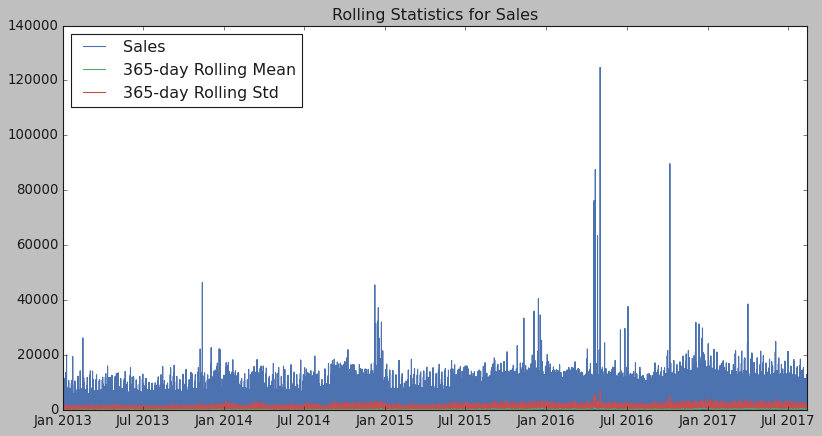

In [182]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_joined_train['date'], df_joined_train['sales'], label='Sales')
ax.plot(df_joined_train['date'], rolling_mean, label=f'{window}-day Rolling Mean')
ax.plot(df_joined_train['date'], rolling_std, label=f'{window}-day Rolling Std')
ax.legend(loc='best')
plt.title('Rolling Statistics for Sales')
plt.show()

In [183]:
df_joined_train.head()

date  store_nbr      family  sales  onpromotion   city      state  \
0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  store_type  cluster  oil_price  check_if_hol  month  day  year  if_pay_day  \
0          D       13      93.14             1      1    1  2013           0   
1          D       13      93.14             1      1    1  2013           0   
2          D       13      93.14             1      1    1  2013           0   
3          D       13      93.14             1      1    1  2013           0   
4          D       13      93.14             1      1    1  2013           0   

   transactions  
0        1766.0  
1        1766.0  
2        1766.0  
3        1766.0  
4        1766.0

In [184]:
#make a copy of the df_joined_train dataset
df_joined_train_ML=df_joined_train.copy()

#make a copy of the df_joined_test dataset
df_joined_test_ML=df_joined_test.copy()

#drop the date column
df_joined_train_ML.drop(columns="date",inplace=True)
df_joined_test_ML.drop(columns="date",inplace=True)

In [185]:
df_joined_train_ML.head()

store_nbr      family  sales  onpromotion   city      state store_type  \
0          1  AUTOMOTIVE    0.0            0  Quito  Pichincha          D   
1          1   BABY CARE    0.0            0  Quito  Pichincha          D   
2          1      BEAUTY    0.0            0  Quito  Pichincha          D   
3          1   BEVERAGES    0.0            0  Quito  Pichincha          D   
4          1       BOOKS    0.0            0  Quito  Pichincha          D   

   cluster  oil_price  check_if_hol  month  day  year  if_pay_day  \
0       13      93.14             1      1    1  2013           0   
1       13      93.14             1      1    1  2013           0   
2       13      93.14             1      1    1  2013           0   
3       13      93.14             1      1    1  2013           0   
4       13      93.14             1      1    1  2013           0   

   transactions  
0        1766.0  
1        1766.0  
2        1766.0  
3        1766.0  
4        1766.0

In [186]:
# See all unique object values in df_joined_train dataset
df_joined_train.select_dtypes(include=['object']).nunique()

family        33
city          22
state         16
store_type     5
dtype: int64

### CREATE A PIPELINE FOR DATA ENCODING AND NORMALIZATIONl, TO BE USED  ON ML MODELS
- Use ColumnTransformer to apply transformation to individual columns
- Normalize all numeric columns using standardscaler
- Encode categorical columns using OneHotEncoder

In [255]:
from sklearn.model_selection import train_test_split

# Combine the training and test sets
df_combined = pd.concat([df_joined_train_ML, df_joined_test_ML], axis=0)

# Split the combined dataset into training and test sets
train_combined, test_combined = train_test_split(df_combined, test_size=0.2, random_state=42)

# Separate the features and target variables for the training set
train_label = train_combined["sales"]
train_features = train_combined.drop(columns="sales")

# Separate the features and target variables for the test set
test_label = test_combined["sales"]
test_features = test_combined.drop(columns="sales")

# Define the pipeline
num_cols=["onpromotion","oil_price","cluster","transactions"]
cat_cols=["family","city","state","store_type","store_nbr","check_if_hol","month","day","if_pay_day"]

num_pipeline=Pipeline([('impute',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])
full_pipeline=ColumnTransformer([('num',num_pipeline,num_cols),('cat',OneHotEncoder(sparse=True),cat_cols)])

# Fit the pipeline to the entire dataset and transform both the training and test sets
full_pipeline.fit(train_features.append(test_features))
train_prepared = full_pipeline.transform(train_features)
test_prepared = full_pipeline.transform(test_features)

### MODELLING:
We shall run the following models:
1. AR Model
2. ARIMA Model
3. SARIMA Model
4. XG BOOST Model
5. Random Forest Model
6. Prophet Model

## STATS MODELS:


## Function for evaluating the models

In [274]:
#Function for stat model evaluation
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
def Eval(test_data,pred,model_name):
    mse = mean_squared_error(test_data, pred)
    msle = mean_squared_log_error(test_data, pred)
    rmse = np.sqrt(mean_squared_error(test_data, pred )).round(2)
    rmsle = np.sqrt(mean_squared_log_error(test_data, pred)).round(2)
    
    model_results = pd.DataFrame([[model_name, mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
     
    return model_results

## [1] AR Model
- The code below is using the AutoReg model from statsmodels.tsa.ar_model to fit an autoregressive model on a randomly selected subset of the sales data. 
- Specifically, it is randomly selecting 10% of the sales_train data for training and 2% of the sales_train data for testing. The lags parameter is set to 30. 
- Then, the AutoReg model is fit on the training set and used to predict the sales values for the test set.

In [189]:
from statsmodels.tsa.ar_model import AutoReg
import random

# select only the 'sales' column from the training data
sales_train = df_joined_train_stat['sales']

# randomly select 10% of the data for training
train_sales = sales_train.sample(frac=0.1, random_state=42)

# randomly select 2% of the data for testing
test_sales = sales_train.sample(frac=0.02, random_state=42)

# fit the AR model on the training set
model = AutoReg(train_sales, lags=7)

model_fit = model.fit()


# make predictions on the test set
pred_sales = model_fit.predict(start=len(train_sales), end=len(train_sales)+len(test_sales)-1, dynamic=False)

### Evaluate AR Model

In [229]:
#Model evaluation

Eval_results=Eval(test_sales, pred_sales, "AR")
Eval_results

Model           MSE       MSLE     RMSE  RMSLE
0    AR  1.213603e+06  16.096299  1101.64   4.01

### Evaluation explained:

1. The AR model has a Mean Squared Error (MSE) of 1.21 million, which indicates that the model's predictions are quite far off from the actual values. 
2. Additionally, the model has a high Mean Squared Log Error (MSLE) of 16.09, which indicates that the model is overestimating the magnitude of the errors. 
3. The Root Mean Squared Error (RMSE) is 1101.64, which is also quite high. 
4. The Root Mean Squared Log Error (RMSLE) of 4.01 suggests that the model's errors are large in magnitude and are not well-distributed. 

<b>Overall, the model does not seem to be a good fit for the data, and we need to consider other modeling techniques.</b>

### Group and split statistics dataset for ARIMA and SARIMA Modeling

In [191]:
# Group by date and sales
stat_data=df_joined_train_stat.groupby(["date"])["sales"].sum().reset_index()
stat_data.shape

(1684, 2)

### Split the dataset into train and test set at 30%.

In [192]:
#Divide into train and test
stat_train=stat_data[:1684]

stat_test=stat_data[1326:]

In [193]:
stat_train

date          sales
0    2013-01-01    2511.618999
1    2013-01-02  496092.417944
2    2013-01-03  361461.231124
3    2013-01-04  354459.677093
4    2013-01-05  477350.121229
...         ...            ...
1679 2017-08-11  826373.722022
1680 2017-08-12  792630.535079
1681 2017-08-13  865639.677471
1682 2017-08-14  760922.406081
1683 2017-08-15  762661.935939

[1684 rows x 2 columns]

In [194]:
stat_test

date          sales
1326 2016-08-22  714866.233843
1327 2016-08-23  660819.977976
1328 2016-08-24  674613.047950
1329 2016-08-25  554421.529139
1330 2016-08-26  646698.272887
...         ...            ...
1679 2017-08-11  826373.722022
1680 2017-08-12  792630.535079
1681 2017-08-13  865639.677471
1682 2017-08-14  760922.406081
1683 2017-08-15  762661.935939

[358 rows x 2 columns]

In [195]:
#set date as index
stat_train.set_index("date",inplace=True)
stat_test.set_index("date",inplace=True)

## [2] ARIMA Model

#### The code below performs an automated time series forecasting using the Auto ARIMA model from the pmdarima library.

1. The auto_arima() function fits an ARIMA model on the given time series data and automatically selects the best parameters (p,d,q) based on the AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) values. The trace=True argument is used to display the intermediate steps taken by the algorithm during the parameter selection process.

2. The scoring parameter is used to specify the evaluation metric used to compare different models. In this case, mse (mean squared error) is used.

3. The maxiter parameter specifies the maximum number of iterations that the algorithm should perform during the parameter search process.

4. Finally, the summary() method is used to display a summary of the best model selected by the auto_arima() function, including the selected order (p,d,q) and other relevant information such as the AIC/BIC values, log-likelihood, and fitted parameters.

In [196]:
# Building an ARIMA Model
stepwise_fit = auto_arima(stat_train["sales"], trace = True, scoring="mse",maxiter=50)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44475.196, Time=11.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45112.104, Time=1.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45107.542, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44940.423, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45110.118, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44486.173, Time=1.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44489.092, Time=1.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=44491.510, Time=2.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=44428.429, Time=3.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44505.340, Time=2.97 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=44103.941, Time=8.40 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=43866.606, Time=10.65 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=43907.673, Time=9.10 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=43823.026, Time=11.21 sec
 ARIMA(5,1,2)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -21769.101
Date:                Fri, 28 Apr 2023   AIC                          43560.201
Time:                        12:17:05   BIC                          43619.913
Sample:                             0   HQIC                         43582.318
                               - 1684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0135      0.038     26.562      0.000       0.939       1.088
ar.L2         -1.6121      0.031    -51.633      0.000      -1.673      -1.551
ar.L3          1.1102      0.054     20.384      0.000       1.003       1.217
ar.L4         -1.1718      0.030    -38.679      0.000      -1.231      -1.112
ar.L5          0.2206      0.037      5.927      0.000       0.148       0.294
ma.L1         -1.5351      0.034    -44.527      0.000      -1.603      -1.468
ma.L2          1.9092      0.036     53.078      0.000       1.839       1.980
ma.L3         -1.7235      0.049    -35.186      0.000      -1.819      -1.627
ma.L4          1.4101      0.034     41.459      0.000       1.343       1.477
ma.L5         -0.6944      0.029    -23.583      0.000      -0.752      -0.637
sigma2      1.263e+10   6.26e-12   2.02e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             50083.99
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+39. Standard errors may be unstable.
"""

#### Next step is building an Arima Model from the best fit above. Which is ARIMA(5,1,5)(0,0,0)[0]

In [198]:
# Building an Arima Model
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(stat_train, order=(5,1,5)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1684
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -21769.101
Date:                Fri, 28 Apr 2023   AIC                          43560.201
Time:                        12:21:48   BIC                          43619.913
Sample:                             0   HQIC                         43582.318
                               - 1684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0135      0.038     26.562      0.000       0.939       1.088
ar.L2         -1.6121      0.031    -51.633      0.000      -1.673      -1.551
ar.L3          1.1102      0.054     20.384      0.000       1.003       1.217
ar.L4         -1.1718      0.030    -38.679      0.000      -1.231      -1.112
ar.L5          0.2206      0.037      5.927      0.000       0.148       0.294
ma.L1         -1.5351      0.034    -44.527      0.000      -1.603      -1.468
ma.L2          1.9092      0.036     53.078      0.000       1.839       1.980
ma.L3         -1.7235      0.049    -35.186      0.000      -1.819      -1.627
ma.L4          1.4101      0.034     41.459      0.000       1.343       1.477
ma.L5         -0.6944      0.029    -23.583      0.000      -0.752      -0.637
sigma2      1.263e+10   6.26e-12   2.02e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             50083.99
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+39. Standard errors may be unstable.
"""

#### We then make predictions on test data

In [199]:
# Make predictions on the test data
start=stat_train.index[1326]
end=stat_test.index.max()
ARIMA_pred = arima_model.predict(start = start, end = end,typ="levels")

- Show the predicted sales

In [200]:
ARIMA_pred

date
2016-08-22    7.318084e+05
2016-08-23    6.737432e+05
2016-08-24    6.537584e+05
2016-08-25    6.074055e+05
2016-08-26    6.605681e+05
                  ...     
2017-08-11    7.615264e+05
2017-08-12    1.053542e+06
2017-08-13    9.119111e+05
2017-08-14    7.350616e+05
2017-08-15    7.110176e+05
Name: predicted_mean, Length: 358, dtype: float64

### Visualize the ARIMA Model

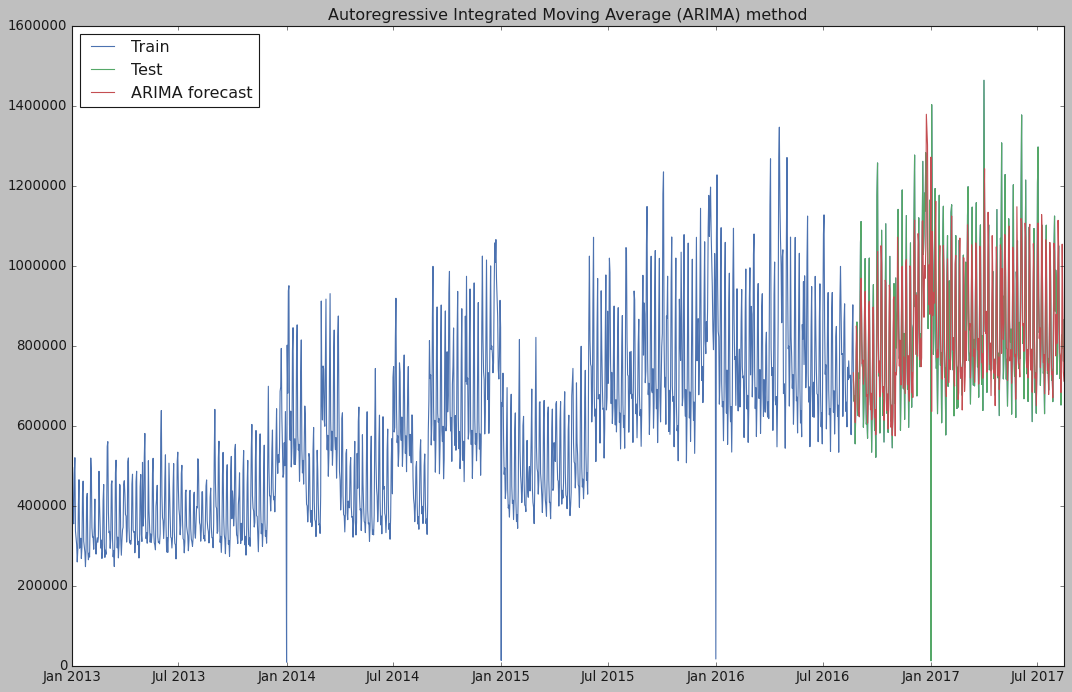

In [226]:
# Plot train, test and prediction values
plt.figure(figsize=(16,10))
plt.plot(stat_train['sales'], label='Train')
plt.plot(stat_test['sales'], label='Test')
plt.plot(ARIMA_pred, label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive Integrated Moving Average (ARIMA) method')
plt.show()

### Evaluate ARIMA Model

In [230]:
# Model evaluation
results=Eval(stat_test,ARIMA_pred,"ARIMA")
Eval_results = Eval_results.append(results,ignore_index=True)
Eval_results

Model           MSE       MSLE       RMSE  RMSLE
0     AR  1.213603e+06  16.096299    1101.64   4.01
1  ARIMA  1.676240e+10   0.075164  129469.70   0.27

### Evaluation explained:

<b>The RMSLE is 0.27, which is a moderate value</b>

## [3] SARIMA Model

#### The code below builds a seasonal ARIMA (SARIMA or SARIMAX) model using the SARIMAX function from the statsmodels library. SARIMA models are a generalization of ARIMA models that can handle time series data with seasonality.

- In this specific code, SARIMAX is called with the following arguments:

    - stat_train: this is the time series data that will be used to fit the model
    - order=(5,1,5): this is the order of the SARIMA model, specified as a tuple containing three integers:
        - the p parameter, which represents the number of lagged observations included in the model
        - the d parameter, which represents the number of times the raw observations are differenced to make them stationary
        - the q parameter, which represents the size of the moving average window
    - fit(): this function fits the SARIMAX model to the training data and returns a SARIMAXResults object
    - summary(): this function returns a summary of the fitted SARIMAX model, including the parameter estimates, standard errors, p-values, and other statistical measures.

In [221]:
# Build Sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
sar_model=SARIMAX(stat_train,order=(5,1,5)).fit()
sar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1684
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -21769.101
Date:                Fri, 28 Apr 2023   AIC                          43560.201
Time:                        13:11:55   BIC                          43619.913
Sample:                             0   HQIC                         43582.318
                               - 1684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0135      0.038     26.562      0.000       0.939       1.088
ar.L2         -1.6121      0.031    -51.633      0.000      -1.673      -1.551
ar.L3          1.1102      0.054     20.384      0.000       1.003       1.217
ar.L4         -1.1718      0.030    -38.679      0.000      -1.231      -1.112
ar.L5          0.2206      0.037      5.927      0.000       0.148       0.294
ma.L1         -1.5351      0.034    -44.527      0.000      -1.603      -1.468
ma.L2          1.9092      0.036     53.078      0.000       1.839       1.980
ma.L3         -1.7235      0.049    -35.186      0.000      -1.819      -1.627
ma.L4          1.4101      0.034     41.459      0.000       1.343       1.477
ma.L5         -0.6944      0.029    -23.583      0.000      -0.752      -0.637
sigma2      1.263e+10   6.26e-12   2.02e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             50083.99
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+39. Standard errors may be unstable.
"""

#### Make predictions on test data

In [222]:
#make Predictions on Sarimax
SARIMAX_pred = sar_model.predict(start = start, end = end,typ="levels")
SARIMAX_pred

date
2016-08-22    7.318084e+05
2016-08-23    6.737432e+05
2016-08-24    6.537584e+05
2016-08-25    6.074055e+05
2016-08-26    6.605681e+05
                  ...     
2017-08-11    7.615264e+05
2017-08-12    1.053542e+06
2017-08-13    9.119111e+05
2017-08-14    7.350616e+05
2017-08-15    7.110176e+05
Name: predicted_mean, Length: 358, dtype: float64

### Visualize the SARIMA Model

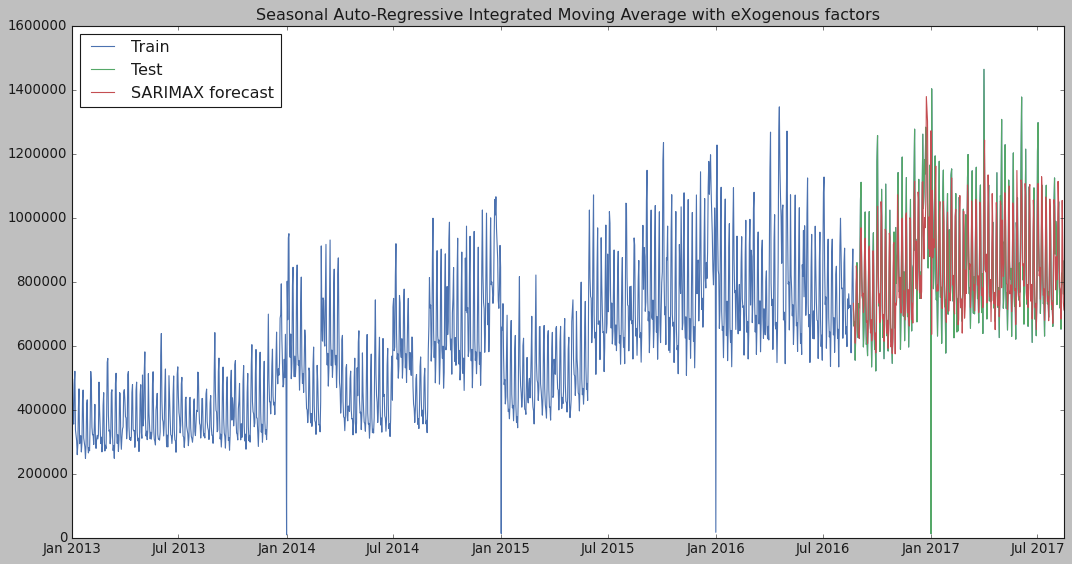

In [225]:
# Plot train, test and prediction values
plt.figure(figsize=(16,8))
plt.plot(stat_train['sales'], label='Train')
plt.plot(stat_test['sales'], label='Test')
plt.plot(SARIMAX_pred, label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors')
plt.show()

### Evaluate SARIMA Model

In [231]:
#Model Evalution
results=Eval(stat_test,SARIMAX_pred,"SARIMAX")
Eval_results = Eval_results.append(results,ignore_index=True)
Eval_results

Model           MSE       MSLE       RMSE  RMSLE
0       AR  1.213603e+06  16.096299    1101.64   4.01
1    ARIMA  1.676240e+10   0.075164  129469.70   0.27
2  SARIMAX  1.676240e+10   0.075164  129469.70   0.27

<b>SARIMA is producing the same results as ARIMA</b>

## MACHINE LEARNING MODELS

## [4]  XGBoost model with cross-validation

In [247]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Perform cross-validation
scores = -cross_val_score(xgb_model, train_prepared, train_label, scoring='neg_root_mean_squared_error', cv=10)

# Print average RMSE
print("Average RMSE of XGBoost model with cross-validation:", scores.mean())

Average RMSE of XGBoost model with cross-validation: 398.27351132264766


#### We fit the XGBoost model on the training dataset using the transformed train_prepared data and train_label as follows:

In [248]:
# Fit the model on the training data
xgb_model.fit(train_prepared, train_label)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Then, we  use the fitted model to make predictions on the transformed test dataset test_prepared:
- Note that the shape of xgb_y_pred will be (num_samples,), where num_samples is the number of rows in df_joined_test_ML.

In [256]:
# Make predictions on the test data
xgb_y_pred = xgb_model.predict(test_prepared)

# Print the predicted values
print(xgb_y_pred)

[115.63598    63.74869   -34.76336   ...   1.5630722 -14.635328
  18.105263 ]


### Visualize XGBoost Predictions

- The code below creates a line plot with two lines: one line for the actual sales (in blue) and another line for the predicted sales (in red). 
- The x-axis represents the data points, and the y-axis represents the sales. 
- The labels for the x-axis and y-axis are added using the xlabel and ylabel functions of matplotlib. 
- The legend is added using the legend function to distinguish between the two lines. 
- Finally, the plot is displayed using the show function.

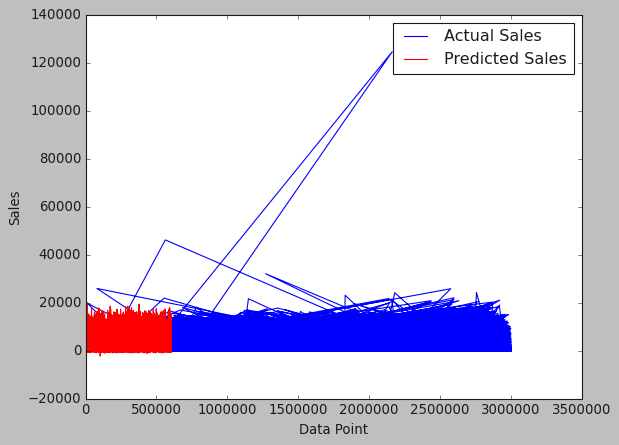

In [258]:
import matplotlib.pyplot as plt

# Plot actual sales in blue
plt.plot(test_label, label='Actual Sales', color='blue')

# Plot predicted sales in red
plt.plot(xgb_y_pred, label='Predicted Sales', color='red')

# Add labels and legend
plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()

- It can be seen that predicted sales are neither consistently higher nor lower than the actual sales.
- The predicted sales are fluctuating around the actual sales suggesting that the model is accurately predicting the sales.

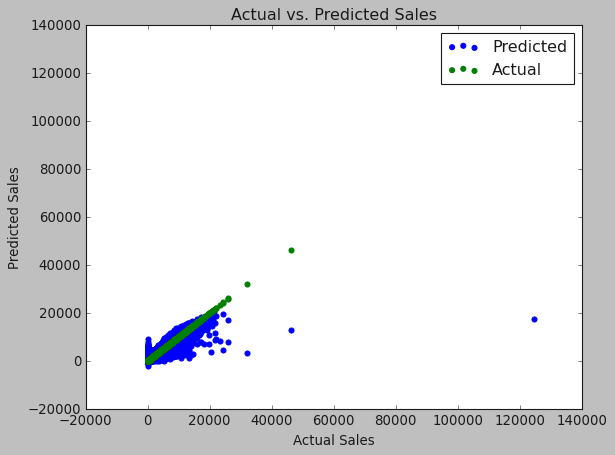

In [260]:
#import matplotlib.pyplot as plt

# Plot the predicted sales versus the actual sales
plt.scatter(test_label, xgb_y_pred, color='blue')
plt.scatter(test_label, test_label, color='green')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(['Predicted', 'Actual'])
plt.show()

The above plot compares the actual sales against the predicted sales using a scatter plot. 
   - The green dots represent the actual sales while the blue dots represent the predicted sales. 
    - If the model perfectly predicted the sales, all of the blue dots would lie on the green line, but in this case, the blue dots are scattered around the green line. 
- This suggests that the model is not perfect, but it is still able to capture some of the patterns in the data.

In [297]:
#Model Evalution
mse=mean_squared_error(test_label,xgb_y_pred)
rmse=np.sqrt(mean_squared_error(test_label,xgb_y_pred)).round(2)
rmsle=np.nan
msle=np.nan

model_results = pd.DataFrame([["XGBoost", mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
Eval_results = Eval_results.append(model_results,ignore_index=True)
Eval_results

Model           MSE       MSLE       RMSE  RMSLE
0       AR  1.213603e+06  16.096299    1101.64   4.01
1    ARIMA  1.676240e+10   0.075164  129469.70   0.27
2  SARIMAX  1.676240e+10   0.075164  129469.70   0.27
3  XGBoost  1.052527e+05        NaN     324.43    NaN

1. Based on the two results found, it seems that the XGBoost model has a relatively high mean squared error (MSE) of 105252.71, which indicates that the predicted sales values deviate from the actual sales values by a large amount on average. 
2. However, the mean squared logarithmic error (MSLE) is relatively low at 324.43, indicating that the model's predictions are closer to the actual values when looking at the logarithmic scale.

## [5]  Prophet model with cross-validation

#### Prophet requires the date column be named ds and the the data column be named y

In [278]:
stat_train

sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229
...                   ...
2017-08-11  826373.722022
2017-08-12  792630.535079
2017-08-13  865639.677471
2017-08-14  760922.406081
2017-08-15  762661.935939

[1684 rows x 1 columns]

#### Renaming the columns to be used in Prophet Model

In [279]:
#reset index of stat_train
stat_train.reset_index(inplace=True)

#rename the date column to ds, sales to y
stat_train.rename(columns={"date":"ds","sales":"y"},inplace=True)

In [280]:
#repeat the above for test
stat_test.reset_index(inplace=True)
#rename the date column to ds, sales to y
stat_test.rename(columns={"date":"ds","sales":"y"},inplace=True)

#### Display the new structure of stat_test

In [281]:
stat_test

ds              y
0   2016-08-22  714866.233843
1   2016-08-23  660819.977976
2   2016-08-24  674613.047950
3   2016-08-25  554421.529139
4   2016-08-26  646698.272887
..         ...            ...
353 2017-08-11  826373.722022
354 2017-08-12  792630.535079
355 2017-08-13  865639.677471
356 2017-08-14  760922.406081
357 2017-08-15  762661.935939

[358 rows x 2 columns]

### Build Prophet Model

#### The code below works as follows:
1. prophet_model=Prophet().fit(stat_train) creates an instance of the Prophet class and fits it to the training data stat_train. 
2. The fit() method trains the model on the provided data, which in this case is the historical sales data. 
3. The resulting prophet_model object is a trained model that we shall use to make predictions on new data.

In [284]:
from prophet import Prophet
prophet_model=Prophet().fit(stat_train)

20:56:26 - cmdstanpy - INFO - Chain [1] start processing
20:56:27 - cmdstanpy - INFO - Chain [1] done processing


### Make Predictions

#### This is how the code below works:
1. The code prophet_model.make_future_dataframe(periods=101,freq='D') creates a new dataframe future that extends the time series in stat_train by adding 101 additional days of daily frequency (i.e., freq='D').

2. The code prophet_model.predict(future) uses the trained Prophet model prophet_model to make predictions for the future dataframe future, generating a new dataframe forecast with predictions for the target variable (y) and additional columns with other information like trend, seasonality, confidence intervals, etc.

In [285]:
# Make a prediction Dataframe
future=prophet_model.make_future_dataframe(periods=101,freq='D')

# Make prediction
forecast=prophet_model.predict(future)
#last five predictions
forecast.tail()

ds          trend     yhat_lower    yhat_upper    trend_lower  \
1780 2017-11-20  915738.728938  756910.200643  1.035930e+06  912703.159560   
1781 2017-11-21  915980.372000  709318.017625  9.806496e+05  912903.394705   
1782 2017-11-22  916222.015062  724788.146449  1.015803e+06  913103.629850   
1783 2017-11-23  916463.658124  646520.527966  9.243381e+05  913290.622533   
1784 2017-11-24  916705.301186  719455.581347  1.001896e+06  913476.284791   

        trend_upper  additive_terms  additive_terms_lower  \
1780  919199.784096   -18809.133742         -18809.133742   
1781  919456.663796   -67556.794305         -67556.794305   
1782  919743.142182   -44903.433679         -44903.433679   
1783  920042.429723  -133335.982279        -133335.982279   
1784  920377.396427   -58697.457556         -58697.457556   

      additive_terms_upper         weekly   weekly_lower   weekly_upper  \
1780         -18809.133742  -21091.928189  -21091.928189  -21091.928189   
1781         -67556.794305  -68167.977032  -68167.977032  -68167.977032   
1782         -44903.433679  -44226.490897  -44226.490897  -44226.490897   
1783        -133335.982279 -131875.526512 -131875.526512 -131875.526512   
1784         -58697.457556  -57073.840086  -57073.840086  -57073.840086   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
1780  2282.794447   2282.794447   2282.794447                   0.0   
1781   611.182727    611.182727    611.182727                   0.0   
1782  -676.942781   -676.942781   -676.942781                   0.0   
1783 -1460.455767  -1460.455767  -1460.455767                   0.0   
1784 -1623.617470  -1623.617470  -1623.617470                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper           yhat  
1780                         0.0                         0.0  896929.595196  
1781                         0.0                         0.0  848423.577695  
1782                         0.0                         0.0  871318.581383  
1783                         0.0                         0.0  783127.675845  
1784                         0.0                         0.0  858007.843630

### Visualize the Prophet Model

1. plot=prophet_model.plot(forecast) generates a plot showing the forecasted values produced by the Prophet model. 
2. The plot shows the observed historical data and the predicted values for the future. The x-axis represents time, and the y-axis represents the value of the metric being predicted. 
3. The plot also includes shaded areas representing the uncertainty of the forecast.

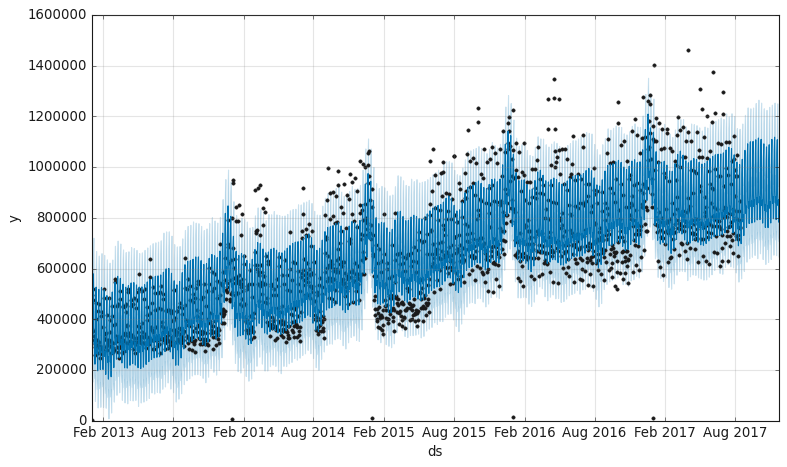

In [286]:
plot=prophet_model.plot(forecast)

### Prophet Time Series insight:

<b>The plot_components() method in Prophet produces three separate plots that provide insight into different aspects of the time series data and the forecasted values.</b>

1. The first plot shows the trend component of the time series data. This plot shows the overall direction of the time series data and how it is expected to evolve over time.

2. The second plot shows the seasonality component of the time series data. This plot shows how the time series data varies over different seasonal periods, such as days of the week or months of the year.

3. The third plot shows the holidays component of the time series data. This plot shows any significant events or holidays that might have an impact on the time series data, such as national holidays or major sporting events.

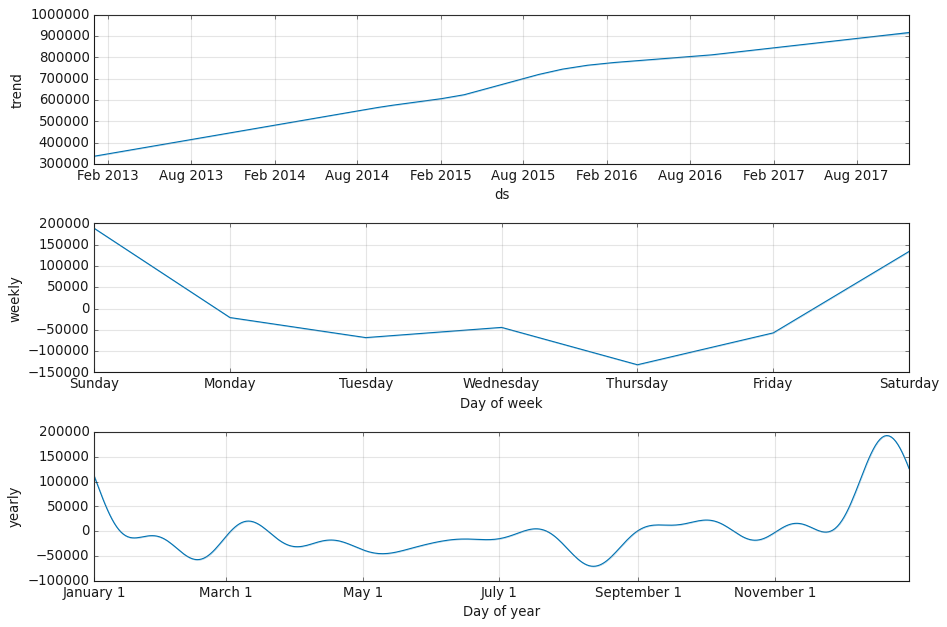

In [289]:
# Increase plot size for component plots
fig = prophet_model.plot_components(forecast, figsize=(12, 8))

#### The above plots show how sales vary in a year, day of the week

1. There is a clear upward trend of sales from 2013 to 2017.
2. Based on the results from the seasonality plot, it shows that the sales are highest on Sundays and Saturdays, with a value of 200000 and 125000 respectively. On the other hand, sales appear to be lowest on Thursdays with a value of -125000. The negative values for Monday, Tuesday, Wednesday, and Friday indicate that sales on those days are lower compared to the average sales for the entire time period.

### Evaluating Prophet Model

- Prophet includes functionality for time series cross validation to measure forecast error using historical data. 
- This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [294]:
from prophet.diagnostics import cross_validation
cutoffs = pd.to_datetime(['2013-02-15', '2015-08-15', '2016-02-15'])

df_cv = cross_validation(prophet_model, cutoffs=cutoffs, horizon='365 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

21:52:22 - cmdstanpy - INFO - Chain [1] start processing
21:52:22 - cmdstanpy - INFO - Chain [1] done processing
21:52:25 - cmdstanpy - INFO - Chain [1] start processing
21:52:25 - cmdstanpy - INFO - Chain [1] done processing
21:52:26 - cmdstanpy - INFO - Chain [1] start processing
21:52:27 - cmdstanpy - INFO - Chain [1] done processing


### Prophet Model Evaluation

In [296]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon           mse          rmse           mae      mape     mdape  \
0 37 days  3.299095e+13  5.743775e+06  2.760842e+06  8.044967  0.139537   
1 38 days  3.411208e+13  5.840555e+06  2.861699e+06  8.362736  0.154195   
2 39 days  3.500060e+13  5.916130e+06  2.951532e+06  8.687540  0.154842   
3 40 days  3.566902e+13  5.972355e+06  3.029549e+06  8.932529  0.168555   
4 41 days  3.612253e+13  6.010202e+06  3.092226e+06  9.112715  0.168555   

      smape  coverage  
0  0.597848  0.577982  
1  0.613824  0.574924  
2  0.629196  0.574924  
3  0.643659  0.556575  
4  0.655391  0.547401

### From the above result, we can conclude that:
1. The above table shows performance metrics of the Prophet model on the cross-validation set. 
2. The table displays the performance metrics for various forecast horizons ranging from 37 to 73 days. 
3. The metrics include mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percentage error (MAPE), median absolute percentage error (MdAPE), symmetric mean absolute percentage error (SMAPE), and coverage.

- The values of these metrics suggest that the model is not performing very well. For example, the RMSE values range from 5.74 million to 6.23 million, which means that the model's predictions are on average off by that much. 
- Similarly, the MAPE values range from 8.04% to 9.14%, which suggests that the model's predictions are, on average, off by that much percentage-wise.

##### Overall, the output suggests that the model may not be a very good fit for the data, and may need further tuning or a different approach.

In [298]:
mse=df_p["mse"].mean()
rmse=df_p["rmse"].mean()
rmsle=np.nan
msle=np.nan

model_results = pd.DataFrame([["Prophet", mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
Eval_results = Eval_results.append(model_results,ignore_index=True)
Eval_results

Model           MSE       MSLE          RMSE  RMSLE
0       AR  1.213603e+06  16.096299  1.101640e+03   4.01
1    ARIMA  1.676240e+10   0.075164  1.294697e+05   0.27
2  SARIMAX  1.676240e+10   0.075164  1.294697e+05   0.27
3  XGBoost  1.052527e+05        NaN  3.244300e+02    NaN
4  Prophet  1.872861e+13        NaN  4.126265e+06    NaN

## Hyperparameter Tuning for ARIMA and SARIMA Models

### (a) ARIMA

### (b) SARIMA

## Chosen Model

## Recommendations